In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy.linalg as lin
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

0 - low cost
1 - medium cost
2 - high cost
3 - very high cost

Mobile Price Classification, 타겟 변수는 price_range

In [2]:
data = pd.read_csv("train.csv")

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Missing data를 찾아보자

In [5]:
all_data = pd.concat((X_train, X_test))

all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio


없는걸 확인할 수 있다.

In [4]:
all_data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
dtype: object

전부다 숫자형임을 확인할 수 있습니다.

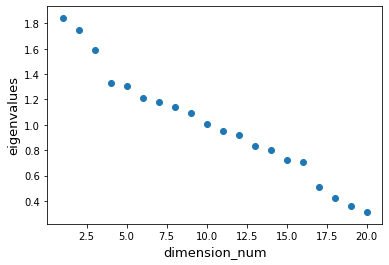

In [6]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

features = X_test_s.T
cov_matrix = np.cov(features)
eigenvalues = lin.eig(cov_matrix)[0]
eigenvalues = np.sort(eigenvalues)[::-1]
dimension_num = [i for i in range(1, len(eigenvalues)+1)]

graph_dimension = pd.DataFrame()
graph_dimension['eigenvalues'] = eigenvalues
graph_dimension['dimension_num'] = dimension_num

fig, ax = plt.subplots()
ax.scatter(x = graph_dimension['dimension_num'], y = graph_dimension['eigenvalues'])
plt.ylabel('eigenvalues', fontsize=13)
plt.xlabel('dimension_num', fontsize=13)
plt.show()

차원축소를 해보려했는데 축소를 하지 않는게 나을 거라는 판단이 들어서 그냥 진행하겠습니다. 4주차 과제였던 앙상블 과제를 참고하여 진행했습니다.

In [7]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

- **Gradient Boosting Regression** :


In [8]:
tuned_parameters_for_GB = {
    'max_depth': [2, 3],
    'n_estimators': (np.arange(1, 200, 10)),
}

GB_model = GradientBoostingRegressor()
model_GB = GridSearchCV(GB_model, tuned_parameters_for_GB, cv=5, verbose=3)
model_GB.fit(X_train_s, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] max_depth=2, n_estimators=1 .....................................
[CV] ......... max_depth=2, n_estimators=1, score=0.152, total=   0.0s
[CV] max_depth=2, n_estimators=1 .....................................
[CV] ......... max_depth=2, n_estimators=1, score=0.153, total=   0.0s
[CV] max_depth=2, n_estimators=1 .....................................
[CV] ......... max_depth=2, n_estimators=1, score=0.151, total=   0.0s
[CV] max_depth=2, n_estimators=1 .....................................
[CV] ......... max_depth=2, n_estimators=1, score=0.151, total=   0.0s
[CV] max_depth=2, n_estimators=1 .....................................
[CV] ......... max_depth=2, n_estimators=1, score=0.153, total=   0.0s
[CV] max_depth=2, n_estimators=11 ....................................
[CV] ........ max_depth=2, n_estimators=11, score=0.751, total=   0.1s
[CV] max_depth=2, n_estimators=11 ....................................
[CV] ........ m

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........ max_depth=2, n_estimators=11, score=0.741, total=   0.1s
[CV] max_depth=2, n_estimators=11 ....................................
[CV] ........ max_depth=2, n_estimators=11, score=0.761, total=   0.1s
[CV] max_depth=2, n_estimators=11 ....................................
[CV] ........ max_depth=2, n_estimators=11, score=0.757, total=   0.1s
[CV] max_depth=2, n_estimators=21 ....................................
[CV] ........ max_depth=2, n_estimators=21, score=0.860, total=   0.1s
[CV] max_depth=2, n_estimators=21 ....................................
[CV] ........ max_depth=2, n_estimators=21, score=0.854, total=   0.1s
[CV] max_depth=2, n_estimators=21 ....................................
[CV] ........ max_depth=2, n_estimators=21, score=0.849, total=   0.1s
[CV] max_depth=2, n_estimators=21 ....................................
[CV] ........ max_depth=2, n_estimators=21, score=0.862, total=   0.1s
[CV] max_depth=2, n_estimators=21 ....................................
[CV] .

[CV] ....... max_depth=2, n_estimators=131, score=0.934, total=   0.7s
[CV] max_depth=2, n_estimators=131 ...................................
[CV] ....... max_depth=2, n_estimators=131, score=0.935, total=   0.7s
[CV] max_depth=2, n_estimators=131 ...................................
[CV] ....... max_depth=2, n_estimators=131, score=0.927, total=   0.7s
[CV] max_depth=2, n_estimators=131 ...................................
[CV] ....... max_depth=2, n_estimators=131, score=0.927, total=   0.8s
[CV] max_depth=2, n_estimators=131 ...................................
[CV] ....... max_depth=2, n_estimators=131, score=0.938, total=   0.6s
[CV] max_depth=2, n_estimators=141 ...................................
[CV] ....... max_depth=2, n_estimators=141, score=0.934, total=   0.8s
[CV] max_depth=2, n_estimators=141 ...................................
[CV] ....... max_depth=2, n_estimators=141, score=0.935, total=   0.9s
[CV] max_depth=2, n_estimators=141 ...................................
[CV] .

[CV] ........ max_depth=3, n_estimators=41, score=0.929, total=   0.3s
[CV] max_depth=3, n_estimators=41 ....................................
[CV] ........ max_depth=3, n_estimators=41, score=0.939, total=   0.3s
[CV] max_depth=3, n_estimators=51 ....................................
[CV] ........ max_depth=3, n_estimators=51, score=0.938, total=   0.4s
[CV] max_depth=3, n_estimators=51 ....................................
[CV] ........ max_depth=3, n_estimators=51, score=0.935, total=   0.4s
[CV] max_depth=3, n_estimators=51 ....................................
[CV] ........ max_depth=3, n_estimators=51, score=0.926, total=   0.4s
[CV] max_depth=3, n_estimators=51 ....................................
[CV] ........ max_depth=3, n_estimators=51, score=0.931, total=   0.4s
[CV] max_depth=3, n_estimators=51 ....................................
[CV] ........ max_depth=3, n_estimators=51, score=0.941, total=   0.4s
[CV] max_depth=3, n_estimators=61 ....................................
[CV] .

[CV] ....... max_depth=3, n_estimators=161, score=0.934, total=   1.2s
[CV] max_depth=3, n_estimators=161 ...................................
[CV] ....... max_depth=3, n_estimators=161, score=0.926, total=   1.0s
[CV] max_depth=3, n_estimators=161 ...................................
[CV] ....... max_depth=3, n_estimators=161, score=0.929, total=   1.2s
[CV] max_depth=3, n_estimators=161 ...................................
[CV] ....... max_depth=3, n_estimators=161, score=0.940, total=   1.3s
[CV] max_depth=3, n_estimators=171 ...................................
[CV] ....... max_depth=3, n_estimators=171, score=0.936, total=   1.2s
[CV] max_depth=3, n_estimators=171 ...................................
[CV] ....... max_depth=3, n_estimators=171, score=0.934, total=   1.2s
[CV] max_depth=3, n_estimators=171 ...................................
[CV] ....... max_depth=3, n_estimators=171, score=0.926, total=   1.3s
[CV] max_depth=3, n_estimators=171 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  2.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_n...
                            

In [9]:
model_GB.best_params_

{'max_depth': 3, 'n_estimators': 71}

In [ ]:
GBoost = GradientBoostingRegressor(max_depth=3, n_estimators=71, random_state=0)

- **XGBoost** :

In [10]:
tuned_parameters_xgb = {
    'max_depth': [2, 3],
    'n_estimators': (np.arange(1,200,10)),
    'gamma': (np.arange(0.1, 1, 0.1))
}

XGB_model = xgb.XGBRegressor()
XGB_model = GridSearchCV(XGB_model, tuned_parameters_xgb, cv=5, verbose = 3)
XGB_model.fit(X_train_s, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
[CV] gamma=0.1, max_depth=2, n_estimators=1 ..........................
[18:00:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.1, max_depth=2, n_estimators=1, score=-0.442, total=   0.0s
[CV] gamma=0.1, max_depth=2, n_estimators=1 ..........................
[18:00:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.1, max_depth=2, n_estimators=1, score=-0.389, total=   0.0s
[CV] gamma=0.1, max_depth=2, n_estimators=1 ..........................
[18:00:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.1, max_depth=2, n_estimators=1, score=-0.485, total=   0.0s
[CV] gamm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base',


[CV] gamma=0.1, max_depth=2, n_estimators=11 .........................
[18:00:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.1, max_depth=2, n_estimators=11, score=0.640, total=   0.1s
[CV] gamma=0.1, max_depth=2, n_estimators=11 .........................
[18:00:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.1, max_depth=2, n_estimators=11, score=0.664, total=   0.1s
[CV] gamma=0.1, max_depth=2, n_estimators=11 .........................
[18:00:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.1, max_depth=2, n_estimators=11, score=0.686, total=   0.0s
[CV] gamma=0.1, max_depth=2, n_estimators=21 .........................
[

C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=21, score=0.853, total=   0.1s
[CV] gamma=0.1, max_depth=2, n_estimators=21 .........................
[18:00:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.1, max_depth=2, n_estimators=21, score=0.853, total=   0.1s
[CV] gamma=0.1, max_depth=2, n_estimators=21 .........................
[18:00:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.1, max_depth=2, n_estimators=21, score=0.830, total=   0.1s
[CV] gamma=0.1, max_depth=2, n_estimators=21 .........................


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:00:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.1, max_depth=2, n_estimators=21, score=0.847, total=   0.1s
[CV] gamma=0.1, max_depth=2, n_estimators=21 .........................
[18:00:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.1, max_depth=2, n_estimators=21, score=0.859, total=   0.1s
[CV] gamma=0.1, max_depth=2, n_estimators=31 .........................
[18:00:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=31, score=0.900, total=   0.1s
[CV] gamma=0.1, max_depth=2, n_estimators=31 .........................
[18:00:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.1, max_depth=2, n_estimators=31, score=0.900, total=   0.1s
[CV] gamma=0.1, max_depth=2, n_estimators=31 .........................
[18:00:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=31, score=0.887, total=   0.1s
[CV] gamma=0.1, max_depth=2, n_estimators=31 .........................
[18:00:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.1, max_depth=2, n_estimators=31, score=0.898, total=   0.1s
[CV] gamma=0.1, max_depth=2, n_estimators=31 .........................
[18:00:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.1, max_depth=2, n_estimators=31, score=0.907, total=   0.1s
[CV] gamma=0.1, max_depth=2, n_estimators=41 .........................
[18:00:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=41, score=0.921, total=   0.2s
[CV] gamma=0.1, max_depth=2, n_estimators=41 .........................
[18:00:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.1, max_depth=2, n_estimators=41, score=0.918, total=   0.2s


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] gamma=0.1, max_depth=2, n_estimators=41 .........................
[18:00:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.1, max_depth=2, n_estimators=41, score=0.908, total=   0.2s
[CV] gamma=0.1, max_depth=2, n_estimators=41 .........................
[18:00:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=41, score=0.914, total=   0.2s
[CV] gamma=0.1, max_depth=2, n_estimators=41 .........................
[18:00:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.1, max_depth=2, n_estimators=41, score=0.923, total=   0.1s
[CV] gamma=0.1, max_depth=2, n_estimators=51 .........................
[18:00:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=51, score=0.929, total=   0.2s
[CV] gamma=0.1, max_depth=2, n_estimators=51 .........................
[18:00:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.1, max_depth=2, n_estimators=51, score=0.926, total=   0.2s


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] gamma=0.1, max_depth=2, n_estimators=51 .........................
[18:00:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.1, max_depth=2, n_estimators=51, score=0.916, total=   0.2s
[CV] gamma=0.1, max_depth=2, n_estimators=51 .........................
[18:00:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.1, max_depth=2, n_estimators=51, score=0.920, total=   0.2s
[CV] gamma=0.1, max_depth=2, n_estimators=51 .........................
[18:00:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=51, score=0.931, total=   0.2s
[CV] gamma=0.1, max_depth=2, n_estimators=61 .........................
[18:00:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.1, max_depth=2, n_estimators=61, score=0.932, total=   0.2s

C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



[CV] gamma=0.1, max_depth=2, n_estimators=61 .........................
[18:00:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=61, score=0.930, total=   0.2s
[CV] gamma=0.1, max_depth=2, n_estimators=61 .........................
[18:00:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.1, max_depth=2, n_estimators=61, score=0.920, total=   0.2s


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] gamma=0.1, max_depth=2, n_estimators=61 .........................
[18:00:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=61, score=0.923, total=   0.2s
[CV] gamma=0.1, max_depth=2, n_estimators=61 .........................
[18:00:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=61, score=0.934, total=   0.2s
[CV] gamma=0.1, max_depth=2, n_estimators=71 .........................
[18:00:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=71, score=0.934, total=   0.3s
[CV] gamma=0.1, max_depth=2, n_estimators=71 .........................
[18:00:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=71, score=0.932, total=   0.2s
[CV] gamma=0.1, max_depth=2, n_estimators=71 .........................
[18:00:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=71, score=0.923, total=   0.2s
[CV] gamma=0.1, max_depth=2, n_estimators=71 .........................
[18:00:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=71, score=0.926, total=   0.3s
[CV] gamma=0.1, max_depth=2, n_estimators=71 .........................
[18:00:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=71, score=0.936, total=   0.2s
[CV] gamma=0.1, max_depth=2, n_estimators=81 .........................
[18:00:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=81, score=0.935, total=   0.3s
[CV] gamma=0.1, max_depth=2, n_estimators=81 .........................
[18:00:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=81, score=0.933, total=   0.3s
[CV] gamma=0.1, max_depth=2, n_estimators=81 .........................
[18:00:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=81, score=0.924, total=   0.3s
[CV] gamma=0.1, max_depth=2, n_estimators=81 .........................
[18:00:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=81, score=0.927, total=   0.3s
[CV] gamma=0.1, max_depth=2, n_estimators=81 .........................
[18:00:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=81, score=0.937, total=   0.3s
[CV] gamma=0.1, max_depth=2, n_estimators=91 .........................
[18:00:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=91, score=0.936, total=   0.3s
[CV] gamma=0.1, max_depth=2, n_estimators=91 .........................
[18:00:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=91, score=0.934, total=   0.3s
[CV] gamma=0.1, max_depth=2, n_estimators=91 .........................
[18:00:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=91, score=0.925, total=   0.3s
[CV] gamma=0.1, max_depth=2, n_estimators=91 .........................
[18:00:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=91, score=0.927, total=   0.4s
[CV] gamma=0.1, max_depth=2, n_estimators=91 .........................
[18:00:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=91, score=0.937, total=   0.3s
[CV] gamma=0.1, max_depth=2, n_estimators=101 ........................
[18:00:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=101, score=0.936, total=   0.4s
[CV] gamma=0.1, max_depth=2, n_estimators=101 ........................
[18:00:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=101, score=0.934, total=   0.4s
[CV] gamma=0.1, max_depth=2, n_estimators=101 ........................
[18:00:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=101, score=0.925, total=   0.4s
[CV] gamma=0.1, max_depth=2, n_estimators=101 ........................
[18:00:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=101, score=0.927, total=   0.4s
[CV] gamma=0.1, max_depth=2, n_estimators=101 ........................
[18:00:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=101, score=0.937, total=   0.4s
[CV] gamma=0.1, max_depth=2, n_estimators=111 ........................
[18:00:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=111, score=0.935, total=   0.4s
[CV] gamma=0.1, max_depth=2, n_estimators=111 ........................
[18:00:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=111, score=0.934, total=   0.4s
[CV] gamma=0.1, max_depth=2, n_estimators=111 ........................
[18:00:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=111, score=0.926, total=   0.4s
[CV] gamma=0.1, max_depth=2, n_estimators=111 ........................
[18:00:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=111, score=0.928, total=   0.4s
[CV] gamma=0.1, max_depth=2, n_estimators=111 ........................
[18:00:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=111, score=0.938, total=   0.4s
[CV] gamma=0.1, max_depth=2, n_estimators=121 ........................
[18:00:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=121, score=0.936, total=   0.5s
[CV] gamma=0.1, max_depth=2, n_estimators=121 ........................
[18:00:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=121, score=0.934, total=   0.4s
[CV] gamma=0.1, max_depth=2, n_estimators=121 ........................
[18:00:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=121, score=0.926, total=   0.5s
[CV] gamma=0.1, max_depth=2, n_estimators=121 ........................
[18:00:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=121, score=0.928, total=   0.4s
[CV] gamma=0.1, max_depth=2, n_estimators=121 ........................
[18:00:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=121, score=0.937, total=   0.4s
[CV] gamma=0.1, max_depth=2, n_estimators=131 ........................
[18:00:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=131, score=0.936, total=   0.5s
[CV] gamma=0.1, max_depth=2, n_estimators=131 ........................
[18:00:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=131, score=0.934, total=   0.4s
[CV] gamma=0.1, max_depth=2, n_estimators=131 ........................
[18:00:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=131, score=0.926, total=   0.5s
[CV] gamma=0.1, max_depth=2, n_estimators=131 ........................
[18:00:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=131, score=0.928, total=   0.5s
[CV] gamma=0.1, max_depth=2, n_estimators=131 ........................
[18:00:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=131, score=0.937, total=   0.5s
[CV] gamma=0.1, max_depth=2, n_estimators=141 ........................
[18:00:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=141, score=0.936, total=   0.6s
[CV] gamma=0.1, max_depth=2, n_estimators=141 ........................
[18:00:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=141, score=0.934, total=   0.6s
[CV] gamma=0.1, max_depth=2, n_estimators=141 ........................
[18:00:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=141, score=0.925, total=   0.5s
[CV] gamma=0.1, max_depth=2, n_estimators=141 ........................
[18:00:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=141, score=0.927, total=   0.5s
[CV] gamma=0.1, max_depth=2, n_estimators=141 ........................
[18:00:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=141, score=0.937, total=   0.5s
[CV] gamma=0.1, max_depth=2, n_estimators=151 ........................
[18:00:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=151, score=0.936, total=   0.6s
[CV] gamma=0.1, max_depth=2, n_estimators=151 ........................
[18:00:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=151, score=0.934, total=   0.6s
[CV] gamma=0.1, max_depth=2, n_estimators=151 ........................
[18:00:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=151, score=0.925, total=   0.6s
[CV] gamma=0.1, max_depth=2, n_estimators=151 ........................
[18:00:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=151, score=0.927, total=   0.6s
[CV] gamma=0.1, max_depth=2, n_estimators=151 ........................
[18:00:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=151, score=0.937, total=   0.6s
[CV] gamma=0.1, max_depth=2, n_estimators=161 ........................
[18:00:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=161, score=0.936, total=   0.6s
[CV] gamma=0.1, max_depth=2, n_estimators=161 ........................
[18:00:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=161, score=0.934, total=   0.6s
[CV] gamma=0.1, max_depth=2, n_estimators=161 ........................
[18:00:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=161, score=0.925, total=   0.6s
[CV] gamma=0.1, max_depth=2, n_estimators=161 ........................
[18:00:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=161, score=0.927, total=   0.6s
[CV] gamma=0.1, max_depth=2, n_estimators=161 ........................
[18:00:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=161, score=0.937, total=   0.6s
[CV] gamma=0.1, max_depth=2, n_estimators=171 ........................
[18:00:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=171, score=0.936, total=   0.6s
[CV] gamma=0.1, max_depth=2, n_estimators=171 ........................
[18:00:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=171, score=0.934, total=   0.6s
[CV] gamma=0.1, max_depth=2, n_estimators=171 ........................
[18:00:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=171, score=0.925, total=   0.6s
[CV] gamma=0.1, max_depth=2, n_estimators=171 ........................
[18:00:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=171, score=0.927, total=   0.6s
[CV] gamma=0.1, max_depth=2, n_estimators=171 ........................
[18:00:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=171, score=0.937, total=   0.6s
[CV] gamma=0.1, max_depth=2, n_estimators=181 ........................
[18:00:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=181, score=0.936, total=   0.6s
[CV] gamma=0.1, max_depth=2, n_estimators=181 ........................
[18:00:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=181, score=0.934, total=   0.6s
[CV] gamma=0.1, max_depth=2, n_estimators=181 ........................
[18:00:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=181, score=0.925, total=   0.7s
[CV] gamma=0.1, max_depth=2, n_estimators=181 ........................
[18:00:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=181, score=0.927, total=   0.7s
[CV] gamma=0.1, max_depth=2, n_estimators=181 ........................
[18:00:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=181, score=0.937, total=   0.5s
[CV] gamma=0.1, max_depth=2, n_estimators=191 ........................
[18:00:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=191, score=0.936, total=   0.7s
[CV] gamma=0.1, max_depth=2, n_estimators=191 ........................
[18:00:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=191, score=0.934, total=   0.7s
[CV] gamma=0.1, max_depth=2, n_estimators=191 ........................
[18:00:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=191, score=0.925, total=   0.7s
[CV] gamma=0.1, max_depth=2, n_estimators=191 ........................
[18:00:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=191, score=0.927, total=   0.8s
[CV] gamma=0.1, max_depth=2, n_estimators=191 ........................
[18:00:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=2, n_estimators=191, score=0.937, total=   0.7s
[CV] gamma=0.1, max_depth=3, n_estimators=1 ..........................
[18:00:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.1, max_depth=3, n_estimators=1, score=-0.435, total=   0.0s
[CV] gamma=0.1, max_depth=3, n_estimators=1 ..........................
[18:00:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.1, max_depth=3, n_estimators=1, score=-0.385, total=   0.0s
[CV] gamma=0.1, max_depth=3, n_estimators=1 ..........................
[18:00:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.1, max_depth=3, n_estimators=1, score=-0.476, total=   0.0

C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaco

[CV]  gamma=0.1, max_depth=3, n_estimators=11, score=0.741, total=   0.1s
[CV] gamma=0.1, max_depth=3, n_estimators=11 .........................
[18:00:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.1, max_depth=3, n_estimators=11, score=0.694, total=   0.1s
[CV] gamma=0.1, max_depth=3, n_estimators=11 .........................
[18:00:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.1, max_depth=3, n_estimators=11, score=0.702, total=   0.0s
[CV] gamma=0.1, max_depth=3, n_estimators=11 .........................
[18:00:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.1, max_depth=3, n_estimators=11, score=0.726, total=   0.1s

C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



[CV] gamma=0.1, max_depth=3, n_estimators=21 .........................
[18:00:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.1, max_depth=3, n_estimators=21, score=0.893, total=   0.1s
[CV] gamma=0.1, max_depth=3, n_estimators=21 .........................
[18:00:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=21, score=0.894, total=   0.1s
[CV] gamma=0.1, max_depth=3, n_estimators=21 .........................
[18:00:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.1, max_depth=3, n_estimators=21, score=0.875, total=   0.1s
[CV] gamma=0.1, max_depth=3, n_estimators=21 .........................
[18:00:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=21, score=0.884, total=   0.1s
[CV] gamma=0.1, max_depth=3, n_estimators=21 .........................
[18:00:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.1, max_depth=3, n_estimators=21, score=0.898, total=   0.1s
[CV] gamma=0.1, max_depth=3, n_estimators=31 .........................
[18:00:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=31, score=0.924, total=   0.1s
[CV] gamma=0.1, max_depth=3, n_estimators=31 .........................
[18:00:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.1, max_depth=3, n_estimators=31, score=0.923, total=   0.1s
[CV] gamma=0.1, max_depth=3, n_estimators=31 .........................
[18:00:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=31, score=0.912, total=   0.2s
[CV] gamma=0.1, max_depth=3, n_estimators=31 .........................
[18:00:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.1, max_depth=3, n_estimators=31, score=0.919, total=   0.2s
[CV] gamma=0.1, max_depth=3, n_estimators=31 .........................
[18:00:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=31, score=0.929, total=   0.2s
[CV] gamma=0.1, max_depth=3, n_estimators=41 .........................
[18:00:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.1, max_depth=3, n_estimators=41, score=0.934, total=   0.2s
[CV] gamma=0.1, max_depth=3, n_estimators=41 .........................
[18:00:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=41, score=0.931, total=   0.2s
[CV] gamma=0.1, max_depth=3, n_estimators=41 .........................
[18:00:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=41, score=0.923, total=   0.2s
[CV] gamma=0.1, max_depth=3, n_estimators=41 .........................
[18:00:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=41, score=0.926, total=   0.2s
[CV] gamma=0.1, max_depth=3, n_estimators=41 .........................
[18:00:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.1, max_depth=3, n_estimators=41, score=0.937, total=   0.2s

C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



[CV] gamma=0.1, max_depth=3, n_estimators=51 .........................
[18:00:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=51, score=0.938, total=   0.2s
[CV] gamma=0.1, max_depth=3, n_estimators=51 .........................
[18:00:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=51, score=0.933, total=   0.2s
[CV] gamma=0.1, max_depth=3, n_estimators=51 .........................
[18:00:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=51, score=0.927, total=   0.3s
[CV] gamma=0.1, max_depth=3, n_estimators=51 .........................
[18:00:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=51, score=0.929, total=   0.2s
[CV] gamma=0.1, max_depth=3, n_estimators=51 .........................
[18:00:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=51, score=0.940, total=   0.2s
[CV] gamma=0.1, max_depth=3, n_estimators=61 .........................
[18:00:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=61, score=0.939, total=   0.3s
[CV] gamma=0.1, max_depth=3, n_estimators=61 .........................
[18:00:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=61, score=0.934, total=   0.3s
[CV] gamma=0.1, max_depth=3, n_estimators=61 .........................
[18:00:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=61, score=0.929, total=   0.3s
[CV] gamma=0.1, max_depth=3, n_estimators=61 .........................
[18:00:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=61, score=0.929, total=   0.3s
[CV] gamma=0.1, max_depth=3, n_estimators=61 .........................
[18:00:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=61, score=0.941, total=   0.3s
[CV] gamma=0.1, max_depth=3, n_estimators=71 .........................
[18:00:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=71, score=0.939, total=   0.4s
[CV] gamma=0.1, max_depth=3, n_estimators=71 .........................
[18:00:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=71, score=0.934, total=   0.3s
[CV] gamma=0.1, max_depth=3, n_estimators=71 .........................
[18:00:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=71, score=0.929, total=   0.4s
[CV] gamma=0.1, max_depth=3, n_estimators=71 .........................
[18:00:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=71, score=0.929, total=   0.4s
[CV] gamma=0.1, max_depth=3, n_estimators=71 .........................
[18:00:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=71, score=0.941, total=   0.4s
[CV] gamma=0.1, max_depth=3, n_estimators=81 .........................
[18:00:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=81, score=0.938, total=   0.4s
[CV] gamma=0.1, max_depth=3, n_estimators=81 .........................
[18:00:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=81, score=0.934, total=   0.4s
[CV] gamma=0.1, max_depth=3, n_estimators=81 .........................
[18:00:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=81, score=0.928, total=   0.4s
[CV] gamma=0.1, max_depth=3, n_estimators=81 .........................
[18:00:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=81, score=0.929, total=   0.4s
[CV] gamma=0.1, max_depth=3, n_estimators=81 .........................
[18:00:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=81, score=0.941, total=   0.4s
[CV] gamma=0.1, max_depth=3, n_estimators=91 .........................
[18:00:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=91, score=0.938, total=   0.5s
[CV] gamma=0.1, max_depth=3, n_estimators=91 .........................
[18:00:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=91, score=0.934, total=   0.4s
[CV] gamma=0.1, max_depth=3, n_estimators=91 .........................
[18:00:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=91, score=0.928, total=   0.3s
[CV] gamma=0.1, max_depth=3, n_estimators=91 .........................
[18:00:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=91, score=0.930, total=   0.4s
[CV] gamma=0.1, max_depth=3, n_estimators=91 .........................
[18:00:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=91, score=0.941, total=   0.5s
[CV] gamma=0.1, max_depth=3, n_estimators=101 ........................
[18:00:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=101, score=0.938, total=   0.5s
[CV] gamma=0.1, max_depth=3, n_estimators=101 ........................
[18:01:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=101, score=0.934, total=   0.5s
[CV] gamma=0.1, max_depth=3, n_estimators=101 ........................
[18:01:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=101, score=0.928, total=   0.4s
[CV] gamma=0.1, max_depth=3, n_estimators=101 ........................
[18:01:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=101, score=0.929, total=   0.5s
[CV] gamma=0.1, max_depth=3, n_estimators=101 ........................
[18:01:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=101, score=0.941, total=   0.5s
[CV] gamma=0.1, max_depth=3, n_estimators=111 ........................
[18:01:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=111, score=0.938, total=   0.5s
[CV] gamma=0.1, max_depth=3, n_estimators=111 ........................
[18:01:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=111, score=0.934, total=   0.5s
[CV] gamma=0.1, max_depth=3, n_estimators=111 ........................
[18:01:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=111, score=0.927, total=   0.5s
[CV] gamma=0.1, max_depth=3, n_estimators=111 ........................
[18:01:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=111, score=0.930, total=   0.6s
[CV] gamma=0.1, max_depth=3, n_estimators=111 ........................
[18:01:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=111, score=0.941, total=   0.5s
[CV] gamma=0.1, max_depth=3, n_estimators=121 ........................
[18:01:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=121, score=0.938, total=   0.6s
[CV] gamma=0.1, max_depth=3, n_estimators=121 ........................
[18:01:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=121, score=0.934, total=   0.5s
[CV] gamma=0.1, max_depth=3, n_estimators=121 ........................
[18:01:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=121, score=0.927, total=   0.5s
[CV] gamma=0.1, max_depth=3, n_estimators=121 ........................
[18:01:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=121, score=0.930, total=   0.5s
[CV] gamma=0.1, max_depth=3, n_estimators=121 ........................
[18:01:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=121, score=0.941, total=   0.6s
[CV] gamma=0.1, max_depth=3, n_estimators=131 ........................
[18:01:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=131, score=0.937, total=   0.7s
[CV] gamma=0.1, max_depth=3, n_estimators=131 ........................
[18:01:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=131, score=0.934, total=   0.7s
[CV] gamma=0.1, max_depth=3, n_estimators=131 ........................
[18:01:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=131, score=0.927, total=   0.7s
[CV] gamma=0.1, max_depth=3, n_estimators=131 ........................
[18:01:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=131, score=0.930, total=   0.7s
[CV] gamma=0.1, max_depth=3, n_estimators=131 ........................
[18:01:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=131, score=0.941, total=   0.7s
[CV] gamma=0.1, max_depth=3, n_estimators=141 ........................
[18:01:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=141, score=0.937, total=   0.7s
[CV] gamma=0.1, max_depth=3, n_estimators=141 ........................
[18:01:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=141, score=0.934, total=   0.7s
[CV] gamma=0.1, max_depth=3, n_estimators=141 ........................
[18:01:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=141, score=0.927, total=   0.6s
[CV] gamma=0.1, max_depth=3, n_estimators=141 ........................
[18:01:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=141, score=0.930, total=   0.7s
[CV] gamma=0.1, max_depth=3, n_estimators=141 ........................
[18:01:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=141, score=0.941, total=   0.5s
[CV] gamma=0.1, max_depth=3, n_estimators=151 ........................
[18:01:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=151, score=0.937, total=   0.7s
[CV] gamma=0.1, max_depth=3, n_estimators=151 ........................
[18:01:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=151, score=0.934, total=   0.7s
[CV] gamma=0.1, max_depth=3, n_estimators=151 ........................
[18:01:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=151, score=0.927, total=   0.6s
[CV] gamma=0.1, max_depth=3, n_estimators=151 ........................
[18:01:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=151, score=0.930, total=   0.6s
[CV] gamma=0.1, max_depth=3, n_estimators=151 ........................
[18:01:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=151, score=0.941, total=   0.7s
[CV] gamma=0.1, max_depth=3, n_estimators=161 ........................
[18:01:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=161, score=0.937, total=   0.8s
[CV] gamma=0.1, max_depth=3, n_estimators=161 ........................
[18:01:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=161, score=0.934, total=   0.8s
[CV] gamma=0.1, max_depth=3, n_estimators=161 ........................
[18:01:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=161, score=0.927, total=   0.7s
[CV] gamma=0.1, max_depth=3, n_estimators=161 ........................
[18:01:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=161, score=0.930, total=   0.8s
[CV] gamma=0.1, max_depth=3, n_estimators=161 ........................
[18:01:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=161, score=0.941, total=   0.8s
[CV] gamma=0.1, max_depth=3, n_estimators=171 ........................
[18:01:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=171, score=0.937, total=   0.8s
[CV] gamma=0.1, max_depth=3, n_estimators=171 ........................
[18:01:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=171, score=0.934, total=   0.8s
[CV] gamma=0.1, max_depth=3, n_estimators=171 ........................
[18:01:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=171, score=0.927, total=   0.7s
[CV] gamma=0.1, max_depth=3, n_estimators=171 ........................
[18:01:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=171, score=0.930, total=   0.8s
[CV] gamma=0.1, max_depth=3, n_estimators=171 ........................
[18:01:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=171, score=0.941, total=   0.8s
[CV] gamma=0.1, max_depth=3, n_estimators=181 ........................
[18:01:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=181, score=0.937, total=   0.9s
[CV] gamma=0.1, max_depth=3, n_estimators=181 ........................
[18:01:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=181, score=0.934, total=   0.8s
[CV] gamma=0.1, max_depth=3, n_estimators=181 ........................
[18:01:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=181, score=0.927, total=   0.8s
[CV] gamma=0.1, max_depth=3, n_estimators=181 ........................
[18:01:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=181, score=0.930, total=   0.7s
[CV] gamma=0.1, max_depth=3, n_estimators=181 ........................
[18:01:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=181, score=0.941, total=   0.7s
[CV] gamma=0.1, max_depth=3, n_estimators=191 ........................
[18:01:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=191, score=0.937, total=   0.8s
[CV] gamma=0.1, max_depth=3, n_estimators=191 ........................
[18:01:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=191, score=0.934, total=   0.8s
[CV] gamma=0.1, max_depth=3, n_estimators=191 ........................
[18:01:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=191, score=0.927, total=   0.7s
[CV] gamma=0.1, max_depth=3, n_estimators=191 ........................
[18:01:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=191, score=0.930, total=   0.9s
[CV] gamma=0.1, max_depth=3, n_estimators=191 ........................
[18:01:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.1, max_depth=3, n_estimators=191, score=0.941, total=   0.7s
[CV] gamma=0.2, max_depth=2, n_estimators=1 ..........................
[18:01:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.2, max_depth=2, n_estimators=1, score=-0.442, total=   0.0s
[CV] gamma=0.2, max_depth=2, n_estimators=1 ..........................
[18:01:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.2, max_depth=2, n_estimators=1, score=-0.389, total=   0.0s
[CV] gamma=0.2, max_depth=2, n_estimators=1 ..........................
[18:01:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.2, max_depth=2, n_estimators=1, score=-0.485, total=   0.0

C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaco

[CV]  gamma=0.2, max_depth=2, n_estimators=11, score=0.640, total=   0.0s
[CV] gamma=0.2, max_depth=2, n_estimators=11 .........................
[18:01:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.2, max_depth=2, n_estimators=11, score=0.664, total=   0.1s
[CV] gamma=0.2, max_depth=2, n_estimators=11 .........................
[18:01:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.2, max_depth=2, n_estimators=11, score=0.686, total=   0.1s
[CV] gamma=0.2, max_depth=2, n_estimators=21 .........................
[18:01:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=21, score=0.853, total=   0.1s
[CV] gamma=0.2, max_depth=2, n_estimators=21 .........................
[18:01:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.2, max_depth=2, n_estimators=21, score=0.853, total=   0.1s
[CV] gamma=0.2, max_depth=2, n_estimators=21 .........................
[18:01:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.2, max_depth=2, n_estimators=21, score=0.830, total=   0.1s
[CV] gamma=0.2, max_depth=2, n_estimators=21 .........................
[18:01:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.2, max_depth=2, n_estimators=21, score=0.847, total=   0.1s

C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] gamma=0.2, max_depth=2, n_estimators=21 .........................
[18:01:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.2, max_depth=2, n_estimators=21, score=0.859, total=   0.1s
[CV] gamma=0.2, max_depth=2, n_estimators=31 .........................
[18:01:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.2, max_depth=2, n_estimators=31, score=0.900, total=   0.1s


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] gamma=0.2, max_depth=2, n_estimators=31 .........................
[18:01:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.2, max_depth=2, n_estimators=31, score=0.900, total=   0.1s
[CV] gamma=0.2, max_depth=2, n_estimators=31 .........................
[18:01:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=31, score=0.887, total=   0.1s
[CV] gamma=0.2, max_depth=2, n_estimators=31 .........................
[18:01:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.2, max_depth=2, n_estimators=31, score=0.898, total=   0.1s
[CV] gamma=0.2, max_depth=2, n_estimators=31 .........................
[18:01:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=31, score=0.907, total=   0.1s
[CV] gamma=0.2, max_depth=2, n_estimators=41 .........................
[18:01:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.2, max_depth=2, n_estimators=41, score=0.921, total=   0.1s
[CV] gamma=0.2, max_depth=2, n_estimators=41 .........................
[18:01:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=41, score=0.918, total=   0.1s
[CV] gamma=0.2, max_depth=2, n_estimators=41 .........................
[18:01:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.2, max_depth=2, n_estimators=41, score=0.908, total=   0.1s
[CV] gamma=0.2, max_depth=2, n_estimators=41 .........................
[18:01:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=41, score=0.914, total=   0.1s
[CV] gamma=0.2, max_depth=2, n_estimators=41 .........................
[18:01:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.2, max_depth=2, n_estimators=41, score=0.923, total=   0.1s
[CV] gamma=0.2, max_depth=2, n_estimators=51 .........................
[18:01:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=51, score=0.929, total=   0.2s
[CV] gamma=0.2, max_depth=2, n_estimators=51 .........................
[18:01:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.2, max_depth=2, n_estimators=51, score=0.926, total=   0.1s
[CV] gamma=0.2, max_depth=2, n_estimators=51 .........................
[18:01:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=51, score=0.916, total=   0.2s
[CV] gamma=0.2, max_depth=2, n_estimators=51 .........................
[18:01:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.2, max_depth=2, n_estimators=51, score=0.920, total=   0.1s
[CV] gamma=0.2, max_depth=2, n_estimators=51 .........................
[18:01:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=51, score=0.931, total=   0.2s
[CV] gamma=0.2, max_depth=2, n_estimators=61 .........................
[18:01:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.2, max_depth=2, n_estimators=61, score=0.932, total=   0.2s
[CV] gamma=0.2, max_depth=2, n_estimators=61 .........................


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:01:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.2, max_depth=2, n_estimators=61, score=0.930, total=   0.2s
[CV] gamma=0.2, max_depth=2, n_estimators=61 .........................
[18:01:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.2, max_depth=2, n_estimators=61, score=0.920, total=   0.2s
[CV] gamma=0.2, max_depth=2, n_estimators=61 .........................
[18:01:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=61, score=0.923, total=   0.2s
[CV] gamma=0.2, max_depth=2, n_estimators=61 .........................
[18:01:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.2, max_depth=2, n_estimators=61, score=0.934, total=   0.2s

C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



[CV] gamma=0.2, max_depth=2, n_estimators=71 .........................
[18:01:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.2, max_depth=2, n_estimators=71, score=0.934, total=   0.2s
[CV] gamma=0.2, max_depth=2, n_estimators=71 .........................
[18:01:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=71, score=0.932, total=   0.3s
[CV] gamma=0.2, max_depth=2, n_estimators=71 .........................
[18:01:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.2, max_depth=2, n_estimators=71, score=0.923, total=   0.2s


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] gamma=0.2, max_depth=2, n_estimators=71 .........................
[18:01:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=71, score=0.926, total=   0.3s
[CV] gamma=0.2, max_depth=2, n_estimators=71 .........................
[18:01:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=71, score=0.936, total=   0.2s
[CV] gamma=0.2, max_depth=2, n_estimators=81 .........................
[18:01:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=81, score=0.935, total=   0.3s
[CV] gamma=0.2, max_depth=2, n_estimators=81 .........................
[18:01:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=81, score=0.933, total=   0.2s
[CV] gamma=0.2, max_depth=2, n_estimators=81 .........................
[18:01:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=81, score=0.924, total=   0.2s
[CV] gamma=0.2, max_depth=2, n_estimators=81 .........................
[18:01:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=81, score=0.927, total=   0.3s
[CV] gamma=0.2, max_depth=2, n_estimators=81 .........................
[18:01:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=81, score=0.937, total=   0.3s
[CV] gamma=0.2, max_depth=2, n_estimators=91 .........................
[18:01:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=91, score=0.936, total=   0.2s
[CV] gamma=0.2, max_depth=2, n_estimators=91 .........................
[18:01:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=91, score=0.934, total=   0.3s
[CV] gamma=0.2, max_depth=2, n_estimators=91 .........................
[18:01:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=91, score=0.925, total=   0.3s
[CV] gamma=0.2, max_depth=2, n_estimators=91 .........................
[18:01:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=91, score=0.927, total=   0.3s
[CV] gamma=0.2, max_depth=2, n_estimators=91 .........................
[18:01:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=91, score=0.937, total=   0.3s
[CV] gamma=0.2, max_depth=2, n_estimators=101 ........................
[18:01:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=101, score=0.936, total=   0.4s
[CV] gamma=0.2, max_depth=2, n_estimators=101 ........................
[18:01:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=101, score=0.934, total=   0.3s
[CV] gamma=0.2, max_depth=2, n_estimators=101 ........................
[18:01:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=101, score=0.925, total=   0.4s
[CV] gamma=0.2, max_depth=2, n_estimators=101 ........................
[18:01:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=101, score=0.927, total=   0.3s
[CV] gamma=0.2, max_depth=2, n_estimators=101 ........................
[18:01:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=101, score=0.937, total=   0.4s
[CV] gamma=0.2, max_depth=2, n_estimators=111 ........................
[18:01:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=111, score=0.936, total=   0.4s
[CV] gamma=0.2, max_depth=2, n_estimators=111 ........................
[18:01:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=111, score=0.933, total=   0.4s
[CV] gamma=0.2, max_depth=2, n_estimators=111 ........................
[18:01:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=111, score=0.926, total=   0.4s
[CV] gamma=0.2, max_depth=2, n_estimators=111 ........................
[18:01:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=111, score=0.927, total=   0.4s
[CV] gamma=0.2, max_depth=2, n_estimators=111 ........................
[18:01:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=111, score=0.937, total=   0.4s
[CV] gamma=0.2, max_depth=2, n_estimators=121 ........................
[18:01:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=121, score=0.936, total=   0.4s
[CV] gamma=0.2, max_depth=2, n_estimators=121 ........................
[18:01:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=121, score=0.933, total=   0.4s
[CV] gamma=0.2, max_depth=2, n_estimators=121 ........................
[18:01:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=121, score=0.926, total=   0.3s
[CV] gamma=0.2, max_depth=2, n_estimators=121 ........................
[18:01:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=121, score=0.927, total=   0.3s
[CV] gamma=0.2, max_depth=2, n_estimators=121 ........................
[18:01:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=121, score=0.937, total=   0.4s
[CV] gamma=0.2, max_depth=2, n_estimators=131 ........................
[18:01:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=131, score=0.936, total=   0.4s
[CV] gamma=0.2, max_depth=2, n_estimators=131 ........................
[18:01:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=131, score=0.933, total=   0.4s
[CV] gamma=0.2, max_depth=2, n_estimators=131 ........................
[18:01:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=131, score=0.926, total=   0.4s
[CV] gamma=0.2, max_depth=2, n_estimators=131 ........................
[18:01:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=131, score=0.927, total=   0.4s
[CV] gamma=0.2, max_depth=2, n_estimators=131 ........................
[18:01:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=131, score=0.937, total=   0.4s
[CV] gamma=0.2, max_depth=2, n_estimators=141 ........................
[18:01:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=141, score=0.936, total=   0.5s
[CV] gamma=0.2, max_depth=2, n_estimators=141 ........................
[18:01:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=141, score=0.933, total=   0.4s
[CV] gamma=0.2, max_depth=2, n_estimators=141 ........................
[18:01:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=141, score=0.926, total=   0.4s
[CV] gamma=0.2, max_depth=2, n_estimators=141 ........................
[18:01:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=141, score=0.927, total=   0.4s
[CV] gamma=0.2, max_depth=2, n_estimators=141 ........................
[18:01:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=141, score=0.937, total=   0.4s
[CV] gamma=0.2, max_depth=2, n_estimators=151 ........................
[18:01:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=151, score=0.936, total=   0.4s
[CV] gamma=0.2, max_depth=2, n_estimators=151 ........................
[18:01:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=151, score=0.933, total=   0.4s
[CV] gamma=0.2, max_depth=2, n_estimators=151 ........................
[18:01:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=151, score=0.926, total=   0.5s
[CV] gamma=0.2, max_depth=2, n_estimators=151 ........................
[18:01:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=151, score=0.927, total=   0.5s
[CV] gamma=0.2, max_depth=2, n_estimators=151 ........................
[18:01:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=151, score=0.937, total=   0.5s
[CV] gamma=0.2, max_depth=2, n_estimators=161 ........................
[18:01:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=161, score=0.936, total=   0.5s
[CV] gamma=0.2, max_depth=2, n_estimators=161 ........................
[18:01:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=161, score=0.933, total=   0.5s
[CV] gamma=0.2, max_depth=2, n_estimators=161 ........................
[18:01:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=161, score=0.926, total=   0.4s
[CV] gamma=0.2, max_depth=2, n_estimators=161 ........................
[18:01:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=161, score=0.927, total=   0.6s
[CV] gamma=0.2, max_depth=2, n_estimators=161 ........................
[18:01:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=161, score=0.937, total=   0.5s
[CV] gamma=0.2, max_depth=2, n_estimators=171 ........................
[18:01:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=171, score=0.936, total=   0.5s
[CV] gamma=0.2, max_depth=2, n_estimators=171 ........................
[18:01:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=171, score=0.933, total=   0.6s
[CV] gamma=0.2, max_depth=2, n_estimators=171 ........................
[18:01:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=171, score=0.926, total=   0.7s
[CV] gamma=0.2, max_depth=2, n_estimators=171 ........................
[18:01:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=171, score=0.927, total=   0.6s
[CV] gamma=0.2, max_depth=2, n_estimators=171 ........................
[18:01:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=171, score=0.937, total=   0.6s
[CV] gamma=0.2, max_depth=2, n_estimators=181 ........................
[18:01:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=181, score=0.936, total=   0.6s
[CV] gamma=0.2, max_depth=2, n_estimators=181 ........................
[18:01:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=181, score=0.933, total=   0.7s
[CV] gamma=0.2, max_depth=2, n_estimators=181 ........................
[18:01:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=181, score=0.926, total=   0.7s
[CV] gamma=0.2, max_depth=2, n_estimators=181 ........................
[18:02:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=181, score=0.927, total=   0.7s
[CV] gamma=0.2, max_depth=2, n_estimators=181 ........................
[18:02:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=181, score=0.937, total=   0.6s
[CV] gamma=0.2, max_depth=2, n_estimators=191 ........................
[18:02:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=191, score=0.936, total=   0.7s
[CV] gamma=0.2, max_depth=2, n_estimators=191 ........................
[18:02:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=191, score=0.933, total=   0.6s
[CV] gamma=0.2, max_depth=2, n_estimators=191 ........................
[18:02:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=191, score=0.926, total=   0.6s
[CV] gamma=0.2, max_depth=2, n_estimators=191 ........................
[18:02:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=191, score=0.927, total=   0.6s
[CV] gamma=0.2, max_depth=2, n_estimators=191 ........................
[18:02:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=2, n_estimators=191, score=0.937, total=   0.6s
[CV] gamma=0.2, max_depth=3, n_estimators=1 ..........................
[18:02:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.2, max_depth=3, n_estimators=1, score=-0.435, total=   0.0s
[CV] gamma=0.2, max_depth=3, n_estimators=1 ..........................
[18:02:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.2, max_depth=3, n_estimators=1, score=-0.385, total=   0.0s
[CV] gamma=0.2, max_depth=3, n_estimators=1 ..........................
[18:02:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.2, max_depth=3, n_estimators=1, score=-0.476, total=   0.0

C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaco

[18:02:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.2, max_depth=3, n_estimators=11, score=0.694, total=   0.1s
[CV] gamma=0.2, max_depth=3, n_estimators=11 .........................
[18:02:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.2, max_depth=3, n_estimators=11, score=0.702, total=   0.1s
[CV] gamma=0.2, max_depth=3, n_estimators=11 .........................
[18:02:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.2, max_depth=3, n_estimators=11, score=0.726, total=   0.1s
[CV] gamma=0.2, max_depth=3, n_estimators=21 .........................
[18:02:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/o

C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=21, score=0.894, total=   0.1s
[CV] gamma=0.2, max_depth=3, n_estimators=21 .........................
[18:02:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.2, max_depth=3, n_estimators=21, score=0.875, total=   0.1s
[CV] gamma=0.2, max_depth=3, n_estimators=21 .........................
[18:02:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=21, score=0.884, total=   0.1s
[CV] gamma=0.2, max_depth=3, n_estimators=21 .........................
[18:02:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.2, max_depth=3, n_estimators=21, score=0.898, total=   0.1s
[CV] gamma=0.2, max_depth=3, n_estimators=31 .........................
[18:02:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=31, score=0.924, total=   0.2s
[CV] gamma=0.2, max_depth=3, n_estimators=31 .........................
[18:02:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.2, max_depth=3, n_estimators=31, score=0.923, total=   0.1s
[CV] gamma=0.2, max_depth=3, n_estimators=31 .........................
[18:02:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=31, score=0.912, total=   0.1s
[CV] gamma=0.2, max_depth=3, n_estimators=31 .........................
[18:02:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.2, max_depth=3, n_estimators=31, score=0.919, total=   0.2s
[CV] gamma=0.2, max_depth=3, n_estimators=31 .........................
[18:02:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=31, score=0.929, total=   0.1s
[CV] gamma=0.2, max_depth=3, n_estimators=41 .........................
[18:02:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.2, max_depth=3, n_estimators=41, score=0.934, total=   0.1s
[CV] gamma=0.2, max_depth=3, n_estimators=41 .........................
[18:02:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=41, score=0.931, total=   0.2s
[CV] gamma=0.2, max_depth=3, n_estimators=41 .........................
[18:02:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.2, max_depth=3, n_estimators=41, score=0.923, total=   0.1s
[CV] gamma=0.2, max_depth=3, n_estimators=41 .........................
[18:02:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=41, score=0.926, total=   0.2s
[CV] gamma=0.2, max_depth=3, n_estimators=41 .........................
[18:02:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.2, max_depth=3, n_estimators=41, score=0.937, total=   0.2s
[CV] gamma=0.2, max_depth=3, n_estimators=51 .........................
[18:02:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=51, score=0.938, total=   0.2s
[CV] gamma=0.2, max_depth=3, n_estimators=51 .........................
[18:02:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=51, score=0.934, total=   0.2s
[CV] gamma=0.2, max_depth=3, n_estimators=51 .........................
[18:02:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=51, score=0.927, total=   0.2s
[CV] gamma=0.2, max_depth=3, n_estimators=51 .........................
[18:02:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=51, score=0.929, total=   0.2s
[CV] gamma=0.2, max_depth=3, n_estimators=51 .........................
[18:02:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=51, score=0.940, total=   0.2s
[CV] gamma=0.2, max_depth=3, n_estimators=61 .........................
[18:02:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=61, score=0.939, total=   0.2s
[CV] gamma=0.2, max_depth=3, n_estimators=61 .........................
[18:02:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=61, score=0.934, total=   0.2s
[CV] gamma=0.2, max_depth=3, n_estimators=61 .........................
[18:02:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=61, score=0.928, total=   0.2s
[CV] gamma=0.2, max_depth=3, n_estimators=61 .........................
[18:02:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=61, score=0.930, total=   0.3s
[CV] gamma=0.2, max_depth=3, n_estimators=61 .........................
[18:02:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=61, score=0.941, total=   0.2s
[CV] gamma=0.2, max_depth=3, n_estimators=71 .........................
[18:02:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=71, score=0.939, total=   0.3s
[CV] gamma=0.2, max_depth=3, n_estimators=71 .........................
[18:02:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=71, score=0.934, total=   0.3s
[CV] gamma=0.2, max_depth=3, n_estimators=71 .........................
[18:02:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=71, score=0.929, total=   0.3s
[CV] gamma=0.2, max_depth=3, n_estimators=71 .........................
[18:02:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=71, score=0.930, total=   0.4s
[CV] gamma=0.2, max_depth=3, n_estimators=71 .........................
[18:02:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=71, score=0.941, total=   0.3s
[CV] gamma=0.2, max_depth=3, n_estimators=81 .........................
[18:02:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=81, score=0.939, total=   0.4s
[CV] gamma=0.2, max_depth=3, n_estimators=81 .........................
[18:02:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=81, score=0.934, total=   0.4s
[CV] gamma=0.2, max_depth=3, n_estimators=81 .........................
[18:02:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=81, score=0.929, total=   0.4s
[CV] gamma=0.2, max_depth=3, n_estimators=81 .........................
[18:02:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=81, score=0.930, total=   0.4s
[CV] gamma=0.2, max_depth=3, n_estimators=81 .........................
[18:02:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=81, score=0.942, total=   0.4s
[CV] gamma=0.2, max_depth=3, n_estimators=91 .........................
[18:02:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=91, score=0.939, total=   0.4s
[CV] gamma=0.2, max_depth=3, n_estimators=91 .........................
[18:02:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=91, score=0.934, total=   0.4s
[CV] gamma=0.2, max_depth=3, n_estimators=91 .........................
[18:02:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=91, score=0.929, total=   0.5s
[CV] gamma=0.2, max_depth=3, n_estimators=91 .........................
[18:02:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=91, score=0.930, total=   0.5s
[CV] gamma=0.2, max_depth=3, n_estimators=91 .........................
[18:02:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=91, score=0.941, total=   0.4s
[CV] gamma=0.2, max_depth=3, n_estimators=101 ........................
[18:02:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=101, score=0.939, total=   0.4s
[CV] gamma=0.2, max_depth=3, n_estimators=101 ........................
[18:02:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=101, score=0.934, total=   0.4s
[CV] gamma=0.2, max_depth=3, n_estimators=101 ........................
[18:02:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=101, score=0.929, total=   0.4s
[CV] gamma=0.2, max_depth=3, n_estimators=101 ........................
[18:02:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=101, score=0.930, total=   0.5s
[CV] gamma=0.2, max_depth=3, n_estimators=101 ........................
[18:02:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=101, score=0.941, total=   0.4s
[CV] gamma=0.2, max_depth=3, n_estimators=111 ........................
[18:02:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=111, score=0.939, total=   0.5s
[CV] gamma=0.2, max_depth=3, n_estimators=111 ........................
[18:02:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=111, score=0.934, total=   0.5s
[CV] gamma=0.2, max_depth=3, n_estimators=111 ........................
[18:02:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=111, score=0.929, total=   0.6s
[CV] gamma=0.2, max_depth=3, n_estimators=111 ........................
[18:02:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=111, score=0.930, total=   0.6s
[CV] gamma=0.2, max_depth=3, n_estimators=111 ........................
[18:02:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=111, score=0.941, total=   0.6s
[CV] gamma=0.2, max_depth=3, n_estimators=121 ........................
[18:02:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=121, score=0.939, total=   0.6s
[CV] gamma=0.2, max_depth=3, n_estimators=121 ........................
[18:02:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=121, score=0.934, total=   0.6s
[CV] gamma=0.2, max_depth=3, n_estimators=121 ........................
[18:02:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=121, score=0.929, total=   0.6s
[CV] gamma=0.2, max_depth=3, n_estimators=121 ........................
[18:02:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=121, score=0.930, total=   0.6s
[CV] gamma=0.2, max_depth=3, n_estimators=121 ........................
[18:02:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=121, score=0.941, total=   0.5s
[CV] gamma=0.2, max_depth=3, n_estimators=131 ........................
[18:02:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=131, score=0.939, total=   0.5s
[CV] gamma=0.2, max_depth=3, n_estimators=131 ........................
[18:02:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=131, score=0.934, total=   0.5s
[CV] gamma=0.2, max_depth=3, n_estimators=131 ........................
[18:02:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=131, score=0.929, total=   0.6s
[CV] gamma=0.2, max_depth=3, n_estimators=131 ........................
[18:02:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=131, score=0.930, total=   0.5s
[CV] gamma=0.2, max_depth=3, n_estimators=131 ........................
[18:02:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=131, score=0.941, total=   0.5s
[CV] gamma=0.2, max_depth=3, n_estimators=141 ........................
[18:02:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=141, score=0.939, total=   0.6s
[CV] gamma=0.2, max_depth=3, n_estimators=141 ........................
[18:02:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=141, score=0.934, total=   0.6s
[CV] gamma=0.2, max_depth=3, n_estimators=141 ........................
[18:02:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=141, score=0.929, total=   0.5s
[CV] gamma=0.2, max_depth=3, n_estimators=141 ........................
[18:02:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=141, score=0.930, total=   0.6s
[CV] gamma=0.2, max_depth=3, n_estimators=141 ........................
[18:02:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=141, score=0.941, total=   0.6s
[CV] gamma=0.2, max_depth=3, n_estimators=151 ........................
[18:02:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=151, score=0.939, total=   0.7s
[CV] gamma=0.2, max_depth=3, n_estimators=151 ........................
[18:02:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=151, score=0.934, total=   0.6s
[CV] gamma=0.2, max_depth=3, n_estimators=151 ........................
[18:02:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=151, score=0.929, total=   0.7s
[CV] gamma=0.2, max_depth=3, n_estimators=151 ........................
[18:02:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=151, score=0.930, total=   0.7s
[CV] gamma=0.2, max_depth=3, n_estimators=151 ........................
[18:02:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=151, score=0.941, total=   0.8s
[CV] gamma=0.2, max_depth=3, n_estimators=161 ........................
[18:02:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=161, score=0.939, total=   0.8s
[CV] gamma=0.2, max_depth=3, n_estimators=161 ........................
[18:02:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=161, score=0.934, total=   0.7s
[CV] gamma=0.2, max_depth=3, n_estimators=161 ........................
[18:02:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=161, score=0.929, total=   0.7s
[CV] gamma=0.2, max_depth=3, n_estimators=161 ........................
[18:02:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=161, score=0.930, total=   0.7s
[CV] gamma=0.2, max_depth=3, n_estimators=161 ........................
[18:02:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=161, score=0.941, total=   0.6s
[CV] gamma=0.2, max_depth=3, n_estimators=171 ........................
[18:02:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=171, score=0.939, total=   0.7s
[CV] gamma=0.2, max_depth=3, n_estimators=171 ........................
[18:02:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=171, score=0.934, total=   0.8s
[CV] gamma=0.2, max_depth=3, n_estimators=171 ........................
[18:02:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=171, score=0.929, total=   0.8s
[CV] gamma=0.2, max_depth=3, n_estimators=171 ........................
[18:02:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=171, score=0.930, total=   0.8s
[CV] gamma=0.2, max_depth=3, n_estimators=171 ........................
[18:02:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=171, score=0.941, total=   0.9s
[CV] gamma=0.2, max_depth=3, n_estimators=181 ........................
[18:02:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=181, score=0.939, total=   0.7s
[CV] gamma=0.2, max_depth=3, n_estimators=181 ........................
[18:02:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=181, score=0.934, total=   0.6s
[CV] gamma=0.2, max_depth=3, n_estimators=181 ........................
[18:02:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=181, score=0.929, total=   0.8s
[CV] gamma=0.2, max_depth=3, n_estimators=181 ........................
[18:02:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=181, score=0.930, total=   0.8s
[CV] gamma=0.2, max_depth=3, n_estimators=181 ........................
[18:02:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=181, score=0.941, total=   0.7s
[CV] gamma=0.2, max_depth=3, n_estimators=191 ........................
[18:02:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=191, score=0.939, total=   0.9s
[CV] gamma=0.2, max_depth=3, n_estimators=191 ........................
[18:02:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=191, score=0.934, total=   0.8s
[CV] gamma=0.2, max_depth=3, n_estimators=191 ........................
[18:02:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=191, score=0.929, total=   0.7s
[CV] gamma=0.2, max_depth=3, n_estimators=191 ........................
[18:02:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=191, score=0.930, total=   0.8s
[CV] gamma=0.2, max_depth=3, n_estimators=191 ........................
[18:02:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.2, max_depth=3, n_estimators=191, score=0.941, total=   0.7s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=1 ..........
[18:02:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=1, score=-0.442, total=   0.0s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=1 ..........
[18:02:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=1, score=-0.389, total=   0.0s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=1 ..........
[18:02:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.30000000000000004, max_dep

C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaco

[18:02:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=11, score=0.664, total=   0.1s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=11 .........
[18:02:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=11, score=0.686, total=   0.0s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=21 .........
[18:02:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=21, score=0.853, total=   0.1s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=21 .........
[18:02:48] WARNING: C:/Je

C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=21, score=0.853, total=   0.1s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=21 .........
[18:02:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=21, score=0.830, total=   0.1s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=21 .........
[18:02:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=21, score=0.847, total=   0.1s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=21 .........


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:02:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=21, score=0.859, total=   0.1s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=31 .........
[18:02:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=31, score=0.900, total=   0.1s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=31 .........
[18:02:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=31, score=0.900, total=   0.1s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=31 .........
[18:02:48] WARNING: C:/Je

C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=31, score=0.887, total=   0.1s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=31 .........
[18:02:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=31, score=0.898, total=   0.1s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=31 .........
[18:02:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=31, score=0.907, total=   0.1s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=41 .........


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:02:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=41, score=0.921, total=   0.2s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=41 .........


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:02:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=41, score=0.918, total=   0.2s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=41 .........
[18:02:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=41, score=0.908, total=   0.2s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=41 .........
[18:02:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=41, score=0.914, total=   0.2s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=41 .........
[18:02:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=41, score=0.923, total=   0.1s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=51 .........
[18:02:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=51, score=0.929, total=   0.2s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=51 .........
[18:02:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=51, score=0.926, total=   0.1s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=51 .........
[18:02:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=51, score=0.916, total=   0.2s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=51 .........
[18:02:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=51, score=0.920, total=   0.1s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=51 .........
[18:02:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=51, score=0.931, total=   0.2s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=61 .........
[18:02:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=61, score=0.932, total=   0.2s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=61 .........
[18:02:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=61, score=0.930, total=   0.2s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=61 .........
[18:02:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=61, score=0.920, total=   0.2s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=61 .........
[18:02:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=61, score=0.923, total=   0.2s


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=61 .........
[18:02:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=61, score=0.934, total=   0.2s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=71 .........
[18:02:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=71, score=0.934, total=   0.3s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=71 .........
[18:02:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=71, score=0.932, total=   0.3s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=71 .........
[18:02:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=71, score=0.923, total=   0.2s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=71 .........
[18:02:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=71, score=0.926, total=   0.2s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=71 .........
[18:02:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=71, score=0.936, total=   0.2s


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=81 .........
[18:02:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=81, score=0.935, total=   0.3s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=81 .........
[18:02:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=81, score=0.933, total=   0.3s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=81 .........
[18:02:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=81, score=0.924, total=   0.3s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=81 .........
[18:02:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=81, score=0.926, total=   0.3s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=81 .........
[18:02:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=81, score=0.937, total=   0.3s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=91 .........
[18:02:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=91, score=0.935, total=   0.3s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=91 .........
[18:02:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=91, score=0.934, total=   0.3s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=91 .........
[18:02:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=91, score=0.925, total=   0.3s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=91 .........
[18:02:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=91, score=0.927, total=   0.2s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=91 .........
[18:02:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=91, score=0.937, total=   0.3s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=101 ........
[18:02:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=101, score=0.935, total=   0.3s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=101 ........
[18:02:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=101, score=0.934, total=   0.4s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=101 ........
[18:02:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=101, score=0.926, total=   0.3s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=101 ........
[18:02:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=101, score=0.927, total=   0.3s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=101 ........
[18:02:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=101, score=0.937, total=   0.3s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=111 ........
[18:02:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=111, score=0.935, total=   0.3s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=111 ........
[18:02:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=111, score=0.934, total=   0.4s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=111 ........
[18:02:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=111, score=0.926, total=   0.4s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=111 ........
[18:02:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=111, score=0.927, total=   0.3s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=111 ........
[18:02:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=111, score=0.937, total=   0.3s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=121 ........
[18:02:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=121, score=0.935, total=   0.4s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=121 ........
[18:02:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=121, score=0.934, total=   0.4s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=121 ........
[18:03:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=121, score=0.926, total=   0.4s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=121 ........
[18:03:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=121, score=0.927, total=   0.4s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=121 ........
[18:03:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=121, score=0.937, total=   0.4s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=131 ........
[18:03:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=131, score=0.935, total=   0.4s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=131 ........
[18:03:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=131, score=0.934, total=   0.4s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=131 ........
[18:03:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=131, score=0.926, total=   0.4s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=131 ........
[18:03:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=131, score=0.927, total=   0.4s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=131 ........
[18:03:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=131, score=0.937, total=   0.4s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=141 ........
[18:03:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=141, score=0.935, total=   0.5s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=141 ........
[18:03:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=141, score=0.934, total=   0.4s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=141 ........
[18:03:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=141, score=0.926, total=   0.4s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=141 ........
[18:03:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=141, score=0.927, total=   0.5s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=141 ........
[18:03:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=141, score=0.937, total=   0.4s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=151 ........
[18:03:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=151, score=0.935, total=   0.4s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=151 ........
[18:03:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=151, score=0.934, total=   0.4s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=151 ........
[18:03:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=151, score=0.926, total=   0.5s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=151 ........
[18:03:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=151, score=0.927, total=   0.5s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=151 ........
[18:03:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=151, score=0.937, total=   0.5s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=161 ........
[18:03:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=161, score=0.935, total=   0.4s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=161 ........
[18:03:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=161, score=0.934, total=   0.5s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=161 ........
[18:03:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=161, score=0.926, total=   0.5s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=161 ........
[18:03:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=161, score=0.927, total=   0.5s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=161 ........
[18:03:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=161, score=0.937, total=   0.5s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=171 ........
[18:03:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=171, score=0.935, total=   0.6s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=171 ........
[18:03:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=171, score=0.934, total=   0.5s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=171 ........
[18:03:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=171, score=0.926, total=   0.5s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=171 ........
[18:03:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=171, score=0.927, total=   0.5s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=171 ........
[18:03:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=171, score=0.937, total=   0.5s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=181 ........
[18:03:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=181, score=0.935, total=   0.6s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=181 ........
[18:03:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=181, score=0.934, total=   0.5s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=181 ........
[18:03:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=181, score=0.926, total=   0.5s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=181 ........
[18:03:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=181, score=0.927, total=   0.7s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=181 ........
[18:03:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=181, score=0.937, total=   0.5s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=191 ........
[18:03:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=191, score=0.935, total=   0.6s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=191 ........
[18:03:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=191, score=0.934, total=   0.7s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=191 ........
[18:03:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=191, score=0.926, total=   0.7s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=191 ........
[18:03:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=191, score=0.927, total=   0.7s
[CV] gamma=0.30000000000000004, max_depth=2, n_estimators=191 ........
[18:03:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=2, n_estimators=191, score=0.937, total=   0.7s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=1 ..........
[18:03:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=1, score=-0.435, total=   0.0s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=1 ..........
[18:03:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=1, score=-0.385, total=   0.0s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=1 ..........
[18:03:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.3000000000

C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaco

[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=11, score=0.741, total=   0.1s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=11 .........
[18:03:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=11, score=0.694, total=   0.1s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=11 .........
[18:03:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=11, score=0.702, total=   0.1s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=11 .........
[18:03:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=11, score=0.726, total=   0.1s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=21 .........
[18:03:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=21, score=0.893, total=   0.1s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=21 .........
[18:03:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=21, score=0.894, total=   0.1s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=21 .........
[18:03:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=21, score=0.875, total=   0.1s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=21 .........
[18:03:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=21, score=0.884, total=   0.1s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=21 .........
[18:03:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=21, score=0.898, total=   0.1s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=31 .........
[18:03:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=31, score=0.924, total=   0.2s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=31 .........
[18:03:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=31, score=0.923, total=   0.1s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=31 .........
[18:03:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=31, score=0.912, total=   0.2s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=31 .........
[18:03:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=31, score=0.919, total=   0.2s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=31 .........

C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



[18:03:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=31, score=0.929, total=   0.2s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=41 .........


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:03:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=41, score=0.934, total=   0.2s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=41 .........
[18:03:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=41, score=0.931, total=   0.2s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=41 .........
[18:03:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=41, score=0.923, total=   0.2s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=41 .........
[18:03:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=41, score=0.926, total=   0.2s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=41 .........
[18:03:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=41, score=0.937, total=   0.2s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=51 .........
[18:03:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=51, score=0.938, total=   0.3s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=51 .........
[18:03:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=51, score=0.934, total=   0.3s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=51 .........
[18:03:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=51, score=0.927, total=   0.3s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=51 .........
[18:03:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=51, score=0.928, total=   0.2s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=51 .........
[18:03:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=51, score=0.940, total=   0.3s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=61 .........
[18:03:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=61, score=0.939, total=   0.3s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=61 .........
[18:03:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=61, score=0.935, total=   0.3s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=61 .........
[18:03:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=61, score=0.928, total=   0.3s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=61 .........
[18:03:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=61, score=0.929, total=   0.3s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=61 .........
[18:03:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=61, score=0.941, total=   0.2s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=71 .........
[18:03:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=71, score=0.939, total=   0.3s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=71 .........
[18:03:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=71, score=0.935, total=   0.3s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=71 .........
[18:03:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=71, score=0.928, total=   0.3s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=71 .........
[18:03:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=71, score=0.930, total=   0.3s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=71 .........
[18:03:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=71, score=0.941, total=   0.3s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=81 .........
[18:03:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=81, score=0.939, total=   0.3s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=81 .........
[18:03:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=81, score=0.935, total=   0.3s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=81 .........
[18:03:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=81, score=0.928, total=   0.4s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=81 .........
[18:03:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=81, score=0.930, total=   0.4s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=81 .........
[18:03:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=81, score=0.941, total=   0.3s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=91 .........
[18:03:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=91, score=0.939, total=   0.3s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=91 .........
[18:03:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=91, score=0.935, total=   0.4s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=91 .........
[18:03:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=91, score=0.928, total=   0.4s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=91 .........
[18:03:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=91, score=0.930, total=   0.4s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=91 .........
[18:03:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=91, score=0.941, total=   0.4s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=101 ........
[18:03:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=101, score=0.939, total=   0.4s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=101 ........
[18:03:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=101, score=0.935, total=   0.4s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=101 ........
[18:03:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=101, score=0.928, total=   0.4s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=101 ........
[18:03:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=101, score=0.930, total=   0.4s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=101 ........
[18:03:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=101, score=0.941, total=   0.5s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=111 ........
[18:03:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=111, score=0.939, total=   0.5s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=111 ........
[18:03:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=111, score=0.935, total=   0.4s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=111 ........
[18:03:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=111, score=0.928, total=   0.4s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=111 ........
[18:03:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=111, score=0.930, total=   0.4s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=111 ........
[18:03:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=111, score=0.941, total=   0.5s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=121 ........
[18:03:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=121, score=0.939, total=   0.5s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=121 ........
[18:03:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=121, score=0.935, total=   0.5s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=121 ........
[18:03:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=121, score=0.928, total=   0.5s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=121 ........
[18:03:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=121, score=0.930, total=   0.5s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=121 ........
[18:03:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=121, score=0.941, total=   0.5s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=131 ........
[18:03:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=131, score=0.939, total=   0.5s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=131 ........
[18:03:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=131, score=0.935, total=   0.5s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=131 ........
[18:03:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=131, score=0.928, total=   0.6s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=131 ........
[18:03:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=131, score=0.930, total=   0.5s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=131 ........
[18:03:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=131, score=0.941, total=   0.6s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=141 ........
[18:03:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=141, score=0.939, total=   0.6s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=141 ........
[18:03:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=141, score=0.935, total=   0.5s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=141 ........
[18:03:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=141, score=0.928, total=   0.5s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=141 ........
[18:03:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=141, score=0.930, total=   0.6s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=141 ........
[18:03:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=141, score=0.941, total=   0.5s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=151 ........
[18:03:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=151, score=0.939, total=   0.7s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=151 ........
[18:03:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=151, score=0.935, total=   0.6s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=151 ........
[18:03:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=151, score=0.928, total=   0.7s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=151 ........
[18:03:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=151, score=0.930, total=   0.5s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=151 ........
[18:03:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=151, score=0.941, total=   0.6s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=161 ........
[18:03:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=161, score=0.939, total=   0.6s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=161 ........
[18:03:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=161, score=0.935, total=   0.7s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=161 ........
[18:03:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=161, score=0.928, total=   0.6s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=161 ........
[18:03:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=161, score=0.930, total=   0.6s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=161 ........
[18:03:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=161, score=0.941, total=   0.6s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=171 ........
[18:03:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=171, score=0.939, total=   0.6s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=171 ........
[18:03:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=171, score=0.935, total=   0.7s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=171 ........
[18:03:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=171, score=0.928, total=   0.7s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=171 ........
[18:03:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=171, score=0.930, total=   0.6s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=171 ........
[18:03:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=171, score=0.941, total=   0.7s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=181 ........
[18:03:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=181, score=0.939, total=   0.7s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=181 ........
[18:03:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=181, score=0.935, total=   0.8s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=181 ........
[18:03:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=181, score=0.928, total=   0.7s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=181 ........
[18:03:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=181, score=0.930, total=   0.7s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=181 ........
[18:03:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=181, score=0.941, total=   0.8s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=191 ........
[18:03:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=191, score=0.939, total=   0.7s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=191 ........
[18:03:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=191, score=0.935, total=   0.9s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=191 ........
[18:03:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=191, score=0.928, total=   0.9s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=191 ........
[18:03:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=191, score=0.930, total=   0.8s
[CV] gamma=0.30000000000000004, max_depth=3, n_estimators=191 ........
[18:03:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.30000000000000004, max_depth=3, n_estimators=191, score=0.941, total=   0.8s
[CV] gamma=0.4, max_depth=2, n_estimators=1 ..........................
[18:03:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.4, max_depth=2, n_estimators=1, score=-0.442, total=   0.0s
[CV] gamma=0.4, max_depth=2, n_estimators=1 ..........................
[18:03:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.4, max_depth=2, n_estimators=1, score=-0.389, total=   0.0s
[CV] gamma=0.4, max_depth=2, n_estimators=1 ..........................
[18:03:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.4, max_depth=2, n_estimators=1, score=-0.4

C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaco

[CV]  gamma=0.4, max_depth=2, n_estimators=11, score=0.640, total=   0.0s
[CV] gamma=0.4, max_depth=2, n_estimators=11 .........................
[18:03:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.4, max_depth=2, n_estimators=11, score=0.664, total=   0.1s
[CV] gamma=0.4, max_depth=2, n_estimators=11 .........................
[18:03:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.4, max_depth=2, n_estimators=11, score=0.686, total=   0.1s
[CV] gamma=0.4, max_depth=2, n_estimators=21 .........................
[18:03:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.4, max_depth=2, n_estimators=21, score=0.853, total=   0.1s

C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] gamma=0.4, max_depth=2, n_estimators=21 .........................
[18:03:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.4, max_depth=2, n_estimators=21, score=0.853, total=   0.1s
[CV] gamma=0.4, max_depth=2, n_estimators=21 .........................
[18:03:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.4, max_depth=2, n_estimators=21, score=0.830, total=   0.1s
[CV] gamma=0.4, max_depth=2, n_estimators=21 .........................


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:03:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.4, max_depth=2, n_estimators=21, score=0.847, total=   0.1s
[CV] gamma=0.4, max_depth=2, n_estimators=21 .........................
[18:03:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.4, max_depth=2, n_estimators=21, score=0.859, total=   0.1s
[CV] gamma=0.4, max_depth=2, n_estimators=31 .........................


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:04:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.4, max_depth=2, n_estimators=31, score=0.900, total=   0.1s
[CV] gamma=0.4, max_depth=2, n_estimators=31 .........................
[18:04:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.4, max_depth=2, n_estimators=31, score=0.900, total=   0.1s
[CV] gamma=0.4, max_depth=2, n_estimators=31 .........................
[18:04:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.4, max_depth=2, n_estimators=31, score=0.887, total=   0.1s
[CV] gamma=0.4, max_depth=2, n_estimators=31 .........................
[18:04:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/o

C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=31, score=0.898, total=   0.1s
[CV] gamma=0.4, max_depth=2, n_estimators=31 .........................
[18:04:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.4, max_depth=2, n_estimators=31, score=0.907, total=   0.1s
[CV] gamma=0.4, max_depth=2, n_estimators=41 .........................
[18:04:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=41, score=0.921, total=   0.2s
[CV] gamma=0.4, max_depth=2, n_estimators=41 .........................
[18:04:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.4, max_depth=2, n_estimators=41, score=0.918, total=   0.2s


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] gamma=0.4, max_depth=2, n_estimators=41 .........................
[18:04:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.4, max_depth=2, n_estimators=41, score=0.908, total=   0.2s
[CV] gamma=0.4, max_depth=2, n_estimators=41 .........................
[18:04:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=41, score=0.914, total=   0.2s
[CV] gamma=0.4, max_depth=2, n_estimators=41 .........................
[18:04:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.4, max_depth=2, n_estimators=41, score=0.923, total=   0.2s
[CV] gamma=0.4, max_depth=2, n_estimators=51 .........................


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:04:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.4, max_depth=2, n_estimators=51, score=0.929, total=   0.2s
[CV] gamma=0.4, max_depth=2, n_estimators=51 .........................
[18:04:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=51, score=0.926, total=   0.2s
[CV] gamma=0.4, max_depth=2, n_estimators=51 .........................
[18:04:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.4, max_depth=2, n_estimators=51, score=0.916, total=   0.2s


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] gamma=0.4, max_depth=2, n_estimators=51 .........................
[18:04:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=51, score=0.920, total=   0.2s
[CV] gamma=0.4, max_depth=2, n_estimators=51 .........................
[18:04:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=51, score=0.931, total=   0.2s
[CV] gamma=0.4, max_depth=2, n_estimators=61 .........................
[18:04:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=61, score=0.932, total=   0.2s
[CV] gamma=0.4, max_depth=2, n_estimators=61 .........................
[18:04:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=61, score=0.930, total=   0.2s
[CV] gamma=0.4, max_depth=2, n_estimators=61 .........................
[18:04:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=61, score=0.920, total=   0.3s
[CV] gamma=0.4, max_depth=2, n_estimators=61 .........................
[18:04:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=61, score=0.923, total=   0.3s
[CV] gamma=0.4, max_depth=2, n_estimators=61 .........................
[18:04:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=61, score=0.934, total=   0.2s
[CV] gamma=0.4, max_depth=2, n_estimators=71 .........................
[18:04:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=71, score=0.934, total=   0.3s
[CV] gamma=0.4, max_depth=2, n_estimators=71 .........................
[18:04:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.4, max_depth=2, n_estimators=71, score=0.932, total=   0.2s


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] gamma=0.4, max_depth=2, n_estimators=71 .........................
[18:04:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.4, max_depth=2, n_estimators=71, score=0.923, total=   0.2s


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] gamma=0.4, max_depth=2, n_estimators=71 .........................
[18:04:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=71, score=0.926, total=   0.2s
[CV] gamma=0.4, max_depth=2, n_estimators=71 .........................
[18:04:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=71, score=0.936, total=   0.3s
[CV] gamma=0.4, max_depth=2, n_estimators=81 .........................
[18:04:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.4, max_depth=2, n_estimators=81, score=0.935, total=   0.2s

C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



[CV] gamma=0.4, max_depth=2, n_estimators=81 .........................
[18:04:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=81, score=0.933, total=   0.3s
[CV] gamma=0.4, max_depth=2, n_estimators=81 .........................
[18:04:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=81, score=0.924, total=   0.3s
[CV] gamma=0.4, max_depth=2, n_estimators=81 .........................
[18:04:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=81, score=0.927, total=   0.3s
[CV] gamma=0.4, max_depth=2, n_estimators=81 .........................
[18:04:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=81, score=0.937, total=   0.3s
[CV] gamma=0.4, max_depth=2, n_estimators=91 .........................
[18:04:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=91, score=0.935, total=   0.3s
[CV] gamma=0.4, max_depth=2, n_estimators=91 .........................
[18:04:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=91, score=0.933, total=   0.4s
[CV] gamma=0.4, max_depth=2, n_estimators=91 .........................
[18:04:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=91, score=0.925, total=   0.3s
[CV] gamma=0.4, max_depth=2, n_estimators=91 .........................
[18:04:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=91, score=0.927, total=   0.3s
[CV] gamma=0.4, max_depth=2, n_estimators=91 .........................
[18:04:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=91, score=0.937, total=   0.4s
[CV] gamma=0.4, max_depth=2, n_estimators=101 ........................
[18:04:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=101, score=0.935, total=   0.4s
[CV] gamma=0.4, max_depth=2, n_estimators=101 ........................
[18:04:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=101, score=0.933, total=   0.3s
[CV] gamma=0.4, max_depth=2, n_estimators=101 ........................
[18:04:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=101, score=0.925, total=   0.4s
[CV] gamma=0.4, max_depth=2, n_estimators=101 ........................
[18:04:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=101, score=0.927, total=   0.4s
[CV] gamma=0.4, max_depth=2, n_estimators=101 ........................
[18:04:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=101, score=0.937, total=   0.3s
[CV] gamma=0.4, max_depth=2, n_estimators=111 ........................
[18:04:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=111, score=0.935, total=   0.4s
[CV] gamma=0.4, max_depth=2, n_estimators=111 ........................
[18:04:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=111, score=0.933, total=   0.4s
[CV] gamma=0.4, max_depth=2, n_estimators=111 ........................
[18:04:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=111, score=0.925, total=   0.4s
[CV] gamma=0.4, max_depth=2, n_estimators=111 ........................
[18:04:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=111, score=0.927, total=   0.4s
[CV] gamma=0.4, max_depth=2, n_estimators=111 ........................
[18:04:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=111, score=0.937, total=   0.4s
[CV] gamma=0.4, max_depth=2, n_estimators=121 ........................
[18:04:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=121, score=0.935, total=   0.5s
[CV] gamma=0.4, max_depth=2, n_estimators=121 ........................
[18:04:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=121, score=0.933, total=   0.4s
[CV] gamma=0.4, max_depth=2, n_estimators=121 ........................
[18:04:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=121, score=0.925, total=   0.5s
[CV] gamma=0.4, max_depth=2, n_estimators=121 ........................
[18:04:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=121, score=0.927, total=   0.5s
[CV] gamma=0.4, max_depth=2, n_estimators=121 ........................
[18:04:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=121, score=0.937, total=   0.5s
[CV] gamma=0.4, max_depth=2, n_estimators=131 ........................
[18:04:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=131, score=0.935, total=   0.4s
[CV] gamma=0.4, max_depth=2, n_estimators=131 ........................
[18:04:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=131, score=0.933, total=   0.4s
[CV] gamma=0.4, max_depth=2, n_estimators=131 ........................
[18:04:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=131, score=0.925, total=   0.4s
[CV] gamma=0.4, max_depth=2, n_estimators=131 ........................
[18:04:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=131, score=0.927, total=   0.4s
[CV] gamma=0.4, max_depth=2, n_estimators=131 ........................
[18:04:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=131, score=0.937, total=   0.5s
[CV] gamma=0.4, max_depth=2, n_estimators=141 ........................
[18:04:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=141, score=0.935, total=   0.5s
[CV] gamma=0.4, max_depth=2, n_estimators=141 ........................
[18:04:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=141, score=0.933, total=   0.5s
[CV] gamma=0.4, max_depth=2, n_estimators=141 ........................
[18:04:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=141, score=0.925, total=   0.5s
[CV] gamma=0.4, max_depth=2, n_estimators=141 ........................
[18:04:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=141, score=0.927, total=   0.4s
[CV] gamma=0.4, max_depth=2, n_estimators=141 ........................
[18:04:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=141, score=0.937, total=   0.5s
[CV] gamma=0.4, max_depth=2, n_estimators=151 ........................
[18:04:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=151, score=0.935, total=   0.6s
[CV] gamma=0.4, max_depth=2, n_estimators=151 ........................
[18:04:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=151, score=0.933, total=   0.6s
[CV] gamma=0.4, max_depth=2, n_estimators=151 ........................
[18:04:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=151, score=0.925, total=   0.6s
[CV] gamma=0.4, max_depth=2, n_estimators=151 ........................
[18:04:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=151, score=0.927, total=   0.5s
[CV] gamma=0.4, max_depth=2, n_estimators=151 ........................
[18:04:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=151, score=0.937, total=   0.5s
[CV] gamma=0.4, max_depth=2, n_estimators=161 ........................
[18:04:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=161, score=0.935, total=   0.6s
[CV] gamma=0.4, max_depth=2, n_estimators=161 ........................
[18:04:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=161, score=0.933, total=   0.6s
[CV] gamma=0.4, max_depth=2, n_estimators=161 ........................
[18:04:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=161, score=0.925, total=   0.5s
[CV] gamma=0.4, max_depth=2, n_estimators=161 ........................
[18:04:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=161, score=0.927, total=   0.5s
[CV] gamma=0.4, max_depth=2, n_estimators=161 ........................
[18:04:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=161, score=0.937, total=   0.6s
[CV] gamma=0.4, max_depth=2, n_estimators=171 ........................
[18:04:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=171, score=0.935, total=   0.6s
[CV] gamma=0.4, max_depth=2, n_estimators=171 ........................
[18:04:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=171, score=0.933, total=   0.6s
[CV] gamma=0.4, max_depth=2, n_estimators=171 ........................
[18:04:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=171, score=0.925, total=   0.6s
[CV] gamma=0.4, max_depth=2, n_estimators=171 ........................
[18:04:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=171, score=0.927, total=   0.5s
[CV] gamma=0.4, max_depth=2, n_estimators=171 ........................
[18:04:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=171, score=0.937, total=   0.5s
[CV] gamma=0.4, max_depth=2, n_estimators=181 ........................
[18:04:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=181, score=0.935, total=   0.6s
[CV] gamma=0.4, max_depth=2, n_estimators=181 ........................
[18:04:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=181, score=0.933, total=   0.5s
[CV] gamma=0.4, max_depth=2, n_estimators=181 ........................
[18:04:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=181, score=0.925, total=   0.6s
[CV] gamma=0.4, max_depth=2, n_estimators=181 ........................
[18:04:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=181, score=0.927, total=   0.6s
[CV] gamma=0.4, max_depth=2, n_estimators=181 ........................
[18:04:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=181, score=0.937, total=   0.6s
[CV] gamma=0.4, max_depth=2, n_estimators=191 ........................
[18:04:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=191, score=0.935, total=   0.5s
[CV] gamma=0.4, max_depth=2, n_estimators=191 ........................
[18:04:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=191, score=0.933, total=   0.5s
[CV] gamma=0.4, max_depth=2, n_estimators=191 ........................
[18:04:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=191, score=0.925, total=   0.7s
[CV] gamma=0.4, max_depth=2, n_estimators=191 ........................
[18:04:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=191, score=0.927, total=   0.6s
[CV] gamma=0.4, max_depth=2, n_estimators=191 ........................
[18:04:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=2, n_estimators=191, score=0.937, total=   0.5s
[CV] gamma=0.4, max_depth=3, n_estimators=1 ..........................
[18:04:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.4, max_depth=3, n_estimators=1, score=-0.435, total=   0.0s
[CV] gamma=0.4, max_depth=3, n_estimators=1 ..........................
[18:04:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.4, max_depth=3, n_estimators=1, score=-0.385, total=   0.0s
[CV] gamma=0.4, max_depth=3, n_estimators=1 ..........................
[18:04:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.4, max_depth=3, n_estimators=1, score=-0.476, total=   0.0

C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaco

[CV]  gamma=0.4, max_depth=3, n_estimators=11, score=0.741, total=   0.1s
[CV] gamma=0.4, max_depth=3, n_estimators=11 .........................
[18:04:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.4, max_depth=3, n_estimators=11, score=0.694, total=   0.1s
[CV] gamma=0.4, max_depth=3, n_estimators=11 .........................
[18:04:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.4, max_depth=3, n_estimators=11, score=0.702, total=   0.1s
[CV] gamma=0.4, max_depth=3, n_estimators=11 .........................
[18:04:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.4, max_depth=3, n_estimators=11, score=0.726, total=   0.0s

C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=21, score=0.893, total=   0.1s
[CV] gamma=0.4, max_depth=3, n_estimators=21 .........................
[18:04:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.4, max_depth=3, n_estimators=21, score=0.894, total=   0.1s
[CV] gamma=0.4, max_depth=3, n_estimators=21 .........................
[18:04:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=21, score=0.875, total=   0.1s
[CV] gamma=0.4, max_depth=3, n_estimators=21 .........................
[18:04:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.4, max_depth=3, n_estimators=21, score=0.884, total=   0.1s
[CV] gamma=0.4, max_depth=3, n_estimators=21 .........................
[18:04:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=21, score=0.898, total=   0.1s
[CV] gamma=0.4, max_depth=3, n_estimators=31 .........................
[18:04:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.4, max_depth=3, n_estimators=31, score=0.924, total=   0.2s
[CV] gamma=0.4, max_depth=3, n_estimators=31 .........................
[18:04:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=31, score=0.923, total=   0.2s
[CV] gamma=0.4, max_depth=3, n_estimators=31 .........................
[18:04:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.4, max_depth=3, n_estimators=31, score=0.912, total=   0.1s
[CV] gamma=0.4, max_depth=3, n_estimators=31 .........................
[18:04:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=31, score=0.919, total=   0.1s
[CV] gamma=0.4, max_depth=3, n_estimators=31 .........................
[18:04:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.4, max_depth=3, n_estimators=31, score=0.929, total=   0.1s
[CV] gamma=0.4, max_depth=3, n_estimators=41 .........................
[18:04:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=41, score=0.934, total=   0.2s
[CV] gamma=0.4, max_depth=3, n_estimators=41 .........................
[18:04:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.4, max_depth=3, n_estimators=41, score=0.931, total=   0.2s
[CV] gamma=0.4, max_depth=3, n_estimators=41 .........................
[18:04:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=41, score=0.923, total=   0.2s
[CV] gamma=0.4, max_depth=3, n_estimators=41 .........................
[18:04:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.4, max_depth=3, n_estimators=41, score=0.926, total=   0.1s
[CV] gamma=0.4, max_depth=3, n_estimators=41 .........................
[18:04:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=41, score=0.937, total=   0.2s
[CV] gamma=0.4, max_depth=3, n_estimators=51 .........................
[18:04:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=51, score=0.938, total=   0.2s
[CV] gamma=0.4, max_depth=3, n_estimators=51 .........................
[18:04:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.4, max_depth=3, n_estimators=51, score=0.934, total=   0.2s
[CV] gamma=0.4, max_depth=3, n_estimators=51 .........................


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:04:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.4, max_depth=3, n_estimators=51, score=0.926, total=   0.3s
[CV] gamma=0.4, max_depth=3, n_estimators=51 .........................
[18:04:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.4, max_depth=3, n_estimators=51, score=0.929, total=   0.2s


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] gamma=0.4, max_depth=3, n_estimators=51 .........................
[18:04:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=51, score=0.940, total=   0.3s
[CV] gamma=0.4, max_depth=3, n_estimators=61 .........................
[18:04:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=61, score=0.939, total=   0.3s
[CV] gamma=0.4, max_depth=3, n_estimators=61 .........................
[18:04:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=61, score=0.935, total=   0.2s
[CV] gamma=0.4, max_depth=3, n_estimators=61 .........................
[18:04:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=61, score=0.926, total=   0.3s
[CV] gamma=0.4, max_depth=3, n_estimators=61 .........................
[18:04:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=61, score=0.930, total=   0.2s
[CV] gamma=0.4, max_depth=3, n_estimators=61 .........................
[18:04:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=61, score=0.941, total=   0.3s
[CV] gamma=0.4, max_depth=3, n_estimators=71 .........................
[18:04:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=71, score=0.939, total=   0.3s
[CV] gamma=0.4, max_depth=3, n_estimators=71 .........................
[18:04:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=71, score=0.935, total=   0.3s
[CV] gamma=0.4, max_depth=3, n_estimators=71 .........................
[18:04:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=71, score=0.926, total=   0.3s
[CV] gamma=0.4, max_depth=3, n_estimators=71 .........................
[18:04:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=71, score=0.930, total=   0.3s
[CV] gamma=0.4, max_depth=3, n_estimators=71 .........................
[18:04:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=71, score=0.941, total=   0.3s
[CV] gamma=0.4, max_depth=3, n_estimators=81 .........................
[18:04:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=81, score=0.939, total=   0.4s
[CV] gamma=0.4, max_depth=3, n_estimators=81 .........................
[18:04:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=81, score=0.935, total=   0.4s
[CV] gamma=0.4, max_depth=3, n_estimators=81 .........................
[18:04:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=81, score=0.926, total=   0.3s
[CV] gamma=0.4, max_depth=3, n_estimators=81 .........................
[18:04:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=81, score=0.930, total=   0.4s
[CV] gamma=0.4, max_depth=3, n_estimators=81 .........................
[18:04:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=81, score=0.941, total=   0.3s
[CV] gamma=0.4, max_depth=3, n_estimators=91 .........................
[18:04:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=91, score=0.939, total=   0.3s
[CV] gamma=0.4, max_depth=3, n_estimators=91 .........................
[18:04:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=91, score=0.935, total=   0.4s
[CV] gamma=0.4, max_depth=3, n_estimators=91 .........................
[18:04:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=91, score=0.926, total=   0.4s
[CV] gamma=0.4, max_depth=3, n_estimators=91 .........................
[18:04:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=91, score=0.930, total=   0.4s
[CV] gamma=0.4, max_depth=3, n_estimators=91 .........................
[18:04:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=91, score=0.941, total=   0.3s
[CV] gamma=0.4, max_depth=3, n_estimators=101 ........................
[18:04:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=101, score=0.939, total=   0.5s
[CV] gamma=0.4, max_depth=3, n_estimators=101 ........................
[18:04:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=101, score=0.935, total=   0.5s
[CV] gamma=0.4, max_depth=3, n_estimators=101 ........................
[18:04:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=101, score=0.926, total=   0.5s
[CV] gamma=0.4, max_depth=3, n_estimators=101 ........................
[18:04:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=101, score=0.930, total=   0.4s
[CV] gamma=0.4, max_depth=3, n_estimators=101 ........................
[18:04:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=101, score=0.941, total=   0.5s
[CV] gamma=0.4, max_depth=3, n_estimators=111 ........................
[18:04:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=111, score=0.939, total=   0.5s
[CV] gamma=0.4, max_depth=3, n_estimators=111 ........................
[18:04:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=111, score=0.935, total=   0.5s
[CV] gamma=0.4, max_depth=3, n_estimators=111 ........................
[18:04:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=111, score=0.926, total=   0.6s
[CV] gamma=0.4, max_depth=3, n_estimators=111 ........................
[18:04:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=111, score=0.930, total=   0.6s
[CV] gamma=0.4, max_depth=3, n_estimators=111 ........................
[18:04:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=111, score=0.941, total=   0.6s
[CV] gamma=0.4, max_depth=3, n_estimators=121 ........................
[18:04:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=121, score=0.939, total=   0.5s
[CV] gamma=0.4, max_depth=3, n_estimators=121 ........................
[18:04:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=121, score=0.935, total=   0.5s
[CV] gamma=0.4, max_depth=3, n_estimators=121 ........................
[18:04:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=121, score=0.926, total=   0.5s
[CV] gamma=0.4, max_depth=3, n_estimators=121 ........................
[18:04:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=121, score=0.930, total=   0.6s
[CV] gamma=0.4, max_depth=3, n_estimators=121 ........................
[18:04:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=121, score=0.941, total=   0.5s
[CV] gamma=0.4, max_depth=3, n_estimators=131 ........................
[18:04:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=131, score=0.939, total=   0.6s
[CV] gamma=0.4, max_depth=3, n_estimators=131 ........................
[18:04:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=131, score=0.935, total=   0.5s
[CV] gamma=0.4, max_depth=3, n_estimators=131 ........................
[18:04:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=131, score=0.926, total=   0.4s
[CV] gamma=0.4, max_depth=3, n_estimators=131 ........................
[18:04:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=131, score=0.930, total=   0.6s
[CV] gamma=0.4, max_depth=3, n_estimators=131 ........................
[18:04:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=131, score=0.941, total=   0.6s
[CV] gamma=0.4, max_depth=3, n_estimators=141 ........................
[18:04:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=141, score=0.939, total=   0.6s
[CV] gamma=0.4, max_depth=3, n_estimators=141 ........................
[18:04:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=141, score=0.935, total=   0.6s
[CV] gamma=0.4, max_depth=3, n_estimators=141 ........................
[18:04:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=141, score=0.926, total=   0.5s
[CV] gamma=0.4, max_depth=3, n_estimators=141 ........................
[18:04:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=141, score=0.930, total=   0.6s
[CV] gamma=0.4, max_depth=3, n_estimators=141 ........................
[18:04:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=141, score=0.941, total=   0.6s
[CV] gamma=0.4, max_depth=3, n_estimators=151 ........................
[18:04:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=151, score=0.939, total=   0.7s
[CV] gamma=0.4, max_depth=3, n_estimators=151 ........................
[18:04:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=151, score=0.935, total=   0.6s
[CV] gamma=0.4, max_depth=3, n_estimators=151 ........................
[18:04:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=151, score=0.926, total=   0.7s
[CV] gamma=0.4, max_depth=3, n_estimators=151 ........................
[18:04:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=151, score=0.930, total=   0.6s
[CV] gamma=0.4, max_depth=3, n_estimators=151 ........................
[18:04:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=151, score=0.941, total=   0.8s
[CV] gamma=0.4, max_depth=3, n_estimators=161 ........................
[18:05:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=161, score=0.939, total=   0.7s
[CV] gamma=0.4, max_depth=3, n_estimators=161 ........................
[18:05:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=161, score=0.935, total=   0.7s
[CV] gamma=0.4, max_depth=3, n_estimators=161 ........................
[18:05:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=161, score=0.926, total=   0.7s
[CV] gamma=0.4, max_depth=3, n_estimators=161 ........................
[18:05:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=161, score=0.930, total=   0.6s
[CV] gamma=0.4, max_depth=3, n_estimators=161 ........................
[18:05:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=161, score=0.941, total=   0.7s
[CV] gamma=0.4, max_depth=3, n_estimators=171 ........................
[18:05:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=171, score=0.939, total=   0.6s
[CV] gamma=0.4, max_depth=3, n_estimators=171 ........................
[18:05:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=171, score=0.935, total=   0.8s
[CV] gamma=0.4, max_depth=3, n_estimators=171 ........................
[18:05:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=171, score=0.926, total=   0.6s
[CV] gamma=0.4, max_depth=3, n_estimators=171 ........................
[18:05:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=171, score=0.930, total=   0.7s
[CV] gamma=0.4, max_depth=3, n_estimators=171 ........................
[18:05:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=171, score=0.941, total=   0.6s
[CV] gamma=0.4, max_depth=3, n_estimators=181 ........................
[18:05:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=181, score=0.939, total=   0.7s
[CV] gamma=0.4, max_depth=3, n_estimators=181 ........................
[18:05:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=181, score=0.935, total=   0.7s
[CV] gamma=0.4, max_depth=3, n_estimators=181 ........................
[18:05:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=181, score=0.926, total=   0.7s
[CV] gamma=0.4, max_depth=3, n_estimators=181 ........................
[18:05:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=181, score=0.930, total=   0.7s
[CV] gamma=0.4, max_depth=3, n_estimators=181 ........................
[18:05:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=181, score=0.941, total=   0.7s
[CV] gamma=0.4, max_depth=3, n_estimators=191 ........................
[18:05:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=191, score=0.939, total=   0.8s
[CV] gamma=0.4, max_depth=3, n_estimators=191 ........................
[18:05:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=191, score=0.935, total=   0.8s
[CV] gamma=0.4, max_depth=3, n_estimators=191 ........................
[18:05:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=191, score=0.926, total=   0.8s
[CV] gamma=0.4, max_depth=3, n_estimators=191 ........................
[18:05:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=191, score=0.930, total=   0.7s
[CV] gamma=0.4, max_depth=3, n_estimators=191 ........................
[18:05:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.4, max_depth=3, n_estimators=191, score=0.941, total=   0.8s
[CV] gamma=0.5, max_depth=2, n_estimators=1 ..........................
[18:05:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.5, max_depth=2, n_estimators=1, score=-0.442, total=   0.0s
[CV] gamma=0.5, max_depth=2, n_estimators=1 ..........................
[18:05:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.5, max_depth=2, n_estimators=1, score=-0.389, total=   0.0s
[CV] gamma=0.5, max_depth=2, n_estimators=1 ..........................
[18:05:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.5, max_depth=2, n_estimators=1, score=-0.485, total=   0.0

C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaco

[CV] gamma=0.5, max_depth=2, n_estimators=11 .........................
[18:05:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.5, max_depth=2, n_estimators=11, score=0.664, total=   0.0s
[CV] gamma=0.5, max_depth=2, n_estimators=11 .........................
[18:05:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.5, max_depth=2, n_estimators=11, score=0.686, total=   0.1s
[CV] gamma=0.5, max_depth=2, n_estimators=21 .........................
[18:05:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.5, max_depth=2, n_estimators=21, score=0.853, total=   0.1s
[CV] gamma=0.5, max_depth=2, n_estimators=21 .........................
[1

C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=21, score=0.853, total=   0.1s
[CV] gamma=0.5, max_depth=2, n_estimators=21 .........................
[18:05:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.5, max_depth=2, n_estimators=21, score=0.830, total=   0.1s
[CV] gamma=0.5, max_depth=2, n_estimators=21 .........................
[18:05:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.5, max_depth=2, n_estimators=21, score=0.847, total=   0.1s
[CV] gamma=0.5, max_depth=2, n_estimators=21 .........................
[18:05:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.5, max_depth=2, n_estimators=21, score=0.859, total=   0.1s

C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:05:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.5, max_depth=2, n_estimators=31, score=0.900, total=   0.1s
[CV] gamma=0.5, max_depth=2, n_estimators=31 .........................
[18:05:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.5, max_depth=2, n_estimators=31, score=0.900, total=   0.1s
[CV] gamma=0.5, max_depth=2, n_estimators=31 .........................
[18:05:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.5, max_depth=2, n_estimators=31, score=0.887, total=   0.1s
[CV] gamma=0.5, max_depth=2, n_estimators=31 .........................
[18:05:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/o

C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=31, score=0.898, total=   0.1s
[CV] gamma=0.5, max_depth=2, n_estimators=31 .........................
[18:05:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.5, max_depth=2, n_estimators=31, score=0.907, total=   0.1s
[CV] gamma=0.5, max_depth=2, n_estimators=41 .........................
[18:05:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=41, score=0.921, total=   0.2s
[CV] gamma=0.5, max_depth=2, n_estimators=41 .........................
[18:05:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.5, max_depth=2, n_estimators=41, score=0.918, total=   0.1s
[CV] gamma=0.5, max_depth=2, n_estimators=41 .........................
[18:05:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=41, score=0.908, total=   0.1s
[CV] gamma=0.5, max_depth=2, n_estimators=41 .........................
[18:05:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.5, max_depth=2, n_estimators=41, score=0.914, total=   0.2s
[CV] gamma=0.5, max_depth=2, n_estimators=41 .........................
[18:05:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=41, score=0.923, total=   0.2s
[CV] gamma=0.5, max_depth=2, n_estimators=51 .........................
[18:05:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.5, max_depth=2, n_estimators=51, score=0.929, total=   0.2s
[CV] gamma=0.5, max_depth=2, n_estimators=51 .........................
[18:05:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=51, score=0.926, total=   0.2s
[CV] gamma=0.5, max_depth=2, n_estimators=51 .........................
[18:05:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.5, max_depth=2, n_estimators=51, score=0.916, total=   0.2s
[CV] gamma=0.5, max_depth=2, n_estimators=51 .........................
[18:05:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=51, score=0.920, total=   0.2s
[CV] gamma=0.5, max_depth=2, n_estimators=51 .........................
[18:05:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.5, max_depth=2, n_estimators=51, score=0.931, total=   0.1s
[CV] gamma=0.5, max_depth=2, n_estimators=61 .........................
[18:05:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=61, score=0.932, total=   0.2s
[CV] gamma=0.5, max_depth=2, n_estimators=61 .........................
[18:05:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.5, max_depth=2, n_estimators=61, score=0.930, total=   0.2s
[CV] gamma=0.5, max_depth=2, n_estimators=61 .........................
[18:05:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=61, score=0.920, total=   0.2s
[CV] gamma=0.5, max_depth=2, n_estimators=61 .........................
[18:05:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=61, score=0.923, total=   0.2s
[CV] gamma=0.5, max_depth=2, n_estimators=61 .........................
[18:05:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=61, score=0.934, total=   0.2s
[CV] gamma=0.5, max_depth=2, n_estimators=71 .........................
[18:05:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=71, score=0.934, total=   0.3s
[CV] gamma=0.5, max_depth=2, n_estimators=71 .........................
[18:05:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=71, score=0.932, total=   0.3s
[CV] gamma=0.5, max_depth=2, n_estimators=71 .........................
[18:05:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.5, max_depth=2, n_estimators=71, score=0.923, total=   0.2s


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] gamma=0.5, max_depth=2, n_estimators=71 .........................
[18:05:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=71, score=0.926, total=   0.2s
[CV] gamma=0.5, max_depth=2, n_estimators=71 .........................
[18:05:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=71, score=0.936, total=   0.2s
[CV] gamma=0.5, max_depth=2, n_estimators=81 .........................
[18:05:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.5, max_depth=2, n_estimators=81, score=0.935, total=   0.2s
[CV] gamma=0.5, max_depth=2, n_estimators=81 .........................
[18:05:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=81, score=0.933, total=   0.2s
[CV] gamma=0.5, max_depth=2, n_estimators=81 .........................
[18:05:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=81, score=0.924, total=   0.3s
[CV] gamma=0.5, max_depth=2, n_estimators=81 .........................
[18:05:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=81, score=0.926, total=   0.3s
[CV] gamma=0.5, max_depth=2, n_estimators=81 .........................
[18:05:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=81, score=0.937, total=   0.3s
[CV] gamma=0.5, max_depth=2, n_estimators=91 .........................
[18:05:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=91, score=0.935, total=   0.3s
[CV] gamma=0.5, max_depth=2, n_estimators=91 .........................
[18:05:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=91, score=0.933, total=   0.3s
[CV] gamma=0.5, max_depth=2, n_estimators=91 .........................
[18:05:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=91, score=0.924, total=   0.3s
[CV] gamma=0.5, max_depth=2, n_estimators=91 .........................
[18:05:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=91, score=0.926, total=   0.3s
[CV] gamma=0.5, max_depth=2, n_estimators=91 .........................
[18:05:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=91, score=0.937, total=   0.3s
[CV] gamma=0.5, max_depth=2, n_estimators=101 ........................
[18:05:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=101, score=0.935, total=   0.3s
[CV] gamma=0.5, max_depth=2, n_estimators=101 ........................
[18:05:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=101, score=0.933, total=   0.4s
[CV] gamma=0.5, max_depth=2, n_estimators=101 ........................
[18:05:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=101, score=0.924, total=   0.3s
[CV] gamma=0.5, max_depth=2, n_estimators=101 ........................
[18:05:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=101, score=0.926, total=   0.4s
[CV] gamma=0.5, max_depth=2, n_estimators=101 ........................
[18:05:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=101, score=0.937, total=   0.3s
[CV] gamma=0.5, max_depth=2, n_estimators=111 ........................
[18:05:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=111, score=0.935, total=   0.4s
[CV] gamma=0.5, max_depth=2, n_estimators=111 ........................
[18:05:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=111, score=0.933, total=   0.3s
[CV] gamma=0.5, max_depth=2, n_estimators=111 ........................
[18:05:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=111, score=0.924, total=   0.4s
[CV] gamma=0.5, max_depth=2, n_estimators=111 ........................
[18:05:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=111, score=0.926, total=   0.4s
[CV] gamma=0.5, max_depth=2, n_estimators=111 ........................
[18:05:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=111, score=0.937, total=   0.4s
[CV] gamma=0.5, max_depth=2, n_estimators=121 ........................
[18:05:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=121, score=0.935, total=   0.4s
[CV] gamma=0.5, max_depth=2, n_estimators=121 ........................
[18:05:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=121, score=0.933, total=   0.3s
[CV] gamma=0.5, max_depth=2, n_estimators=121 ........................
[18:05:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=121, score=0.924, total=   0.4s
[CV] gamma=0.5, max_depth=2, n_estimators=121 ........................
[18:05:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=121, score=0.926, total=   0.4s
[CV] gamma=0.5, max_depth=2, n_estimators=121 ........................
[18:05:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=121, score=0.937, total=   0.4s
[CV] gamma=0.5, max_depth=2, n_estimators=131 ........................
[18:05:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=131, score=0.935, total=   0.4s
[CV] gamma=0.5, max_depth=2, n_estimators=131 ........................
[18:05:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=131, score=0.933, total=   0.4s
[CV] gamma=0.5, max_depth=2, n_estimators=131 ........................
[18:05:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=131, score=0.924, total=   0.4s
[CV] gamma=0.5, max_depth=2, n_estimators=131 ........................
[18:05:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=131, score=0.926, total=   0.3s
[CV] gamma=0.5, max_depth=2, n_estimators=131 ........................
[18:05:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=131, score=0.937, total=   0.4s
[CV] gamma=0.5, max_depth=2, n_estimators=141 ........................
[18:05:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=141, score=0.935, total=   0.5s
[CV] gamma=0.5, max_depth=2, n_estimators=141 ........................
[18:05:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=141, score=0.933, total=   0.4s
[CV] gamma=0.5, max_depth=2, n_estimators=141 ........................
[18:05:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=141, score=0.924, total=   0.5s
[CV] gamma=0.5, max_depth=2, n_estimators=141 ........................
[18:05:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=141, score=0.926, total=   0.5s
[CV] gamma=0.5, max_depth=2, n_estimators=141 ........................
[18:05:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=141, score=0.937, total=   0.4s
[CV] gamma=0.5, max_depth=2, n_estimators=151 ........................
[18:05:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=151, score=0.935, total=   0.5s
[CV] gamma=0.5, max_depth=2, n_estimators=151 ........................
[18:05:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=151, score=0.933, total=   0.5s
[CV] gamma=0.5, max_depth=2, n_estimators=151 ........................
[18:05:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=151, score=0.924, total=   0.5s
[CV] gamma=0.5, max_depth=2, n_estimators=151 ........................
[18:05:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=151, score=0.926, total=   0.4s
[CV] gamma=0.5, max_depth=2, n_estimators=151 ........................
[18:05:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=151, score=0.937, total=   0.5s
[CV] gamma=0.5, max_depth=2, n_estimators=161 ........................
[18:05:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=161, score=0.935, total=   0.5s
[CV] gamma=0.5, max_depth=2, n_estimators=161 ........................
[18:05:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=161, score=0.933, total=   0.5s
[CV] gamma=0.5, max_depth=2, n_estimators=161 ........................
[18:05:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=161, score=0.924, total=   0.5s
[CV] gamma=0.5, max_depth=2, n_estimators=161 ........................
[18:05:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=161, score=0.926, total=   0.5s
[CV] gamma=0.5, max_depth=2, n_estimators=161 ........................
[18:05:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=161, score=0.937, total=   0.5s
[CV] gamma=0.5, max_depth=2, n_estimators=171 ........................
[18:05:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=171, score=0.935, total=   0.5s
[CV] gamma=0.5, max_depth=2, n_estimators=171 ........................
[18:05:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=171, score=0.933, total=   0.5s
[CV] gamma=0.5, max_depth=2, n_estimators=171 ........................
[18:05:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=171, score=0.924, total=   0.6s
[CV] gamma=0.5, max_depth=2, n_estimators=171 ........................
[18:05:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=171, score=0.926, total=   0.5s
[CV] gamma=0.5, max_depth=2, n_estimators=171 ........................
[18:05:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=171, score=0.937, total=   0.5s
[CV] gamma=0.5, max_depth=2, n_estimators=181 ........................
[18:05:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=181, score=0.935, total=   0.6s
[CV] gamma=0.5, max_depth=2, n_estimators=181 ........................
[18:05:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=181, score=0.933, total=   0.6s
[CV] gamma=0.5, max_depth=2, n_estimators=181 ........................
[18:05:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=181, score=0.924, total=   0.5s
[CV] gamma=0.5, max_depth=2, n_estimators=181 ........................
[18:05:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=181, score=0.926, total=   0.5s
[CV] gamma=0.5, max_depth=2, n_estimators=181 ........................
[18:05:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=181, score=0.937, total=   0.5s
[CV] gamma=0.5, max_depth=2, n_estimators=191 ........................
[18:05:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=191, score=0.935, total=   0.5s
[CV] gamma=0.5, max_depth=2, n_estimators=191 ........................
[18:05:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=191, score=0.933, total=   0.6s
[CV] gamma=0.5, max_depth=2, n_estimators=191 ........................
[18:05:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=191, score=0.924, total=   0.7s
[CV] gamma=0.5, max_depth=2, n_estimators=191 ........................
[18:05:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=191, score=0.926, total=   0.5s
[CV] gamma=0.5, max_depth=2, n_estimators=191 ........................
[18:05:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=2, n_estimators=191, score=0.937, total=   0.6s
[CV] gamma=0.5, max_depth=3, n_estimators=1 ..........................
[18:05:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.5, max_depth=3, n_estimators=1, score=-0.435, total=   0.0s
[CV] gamma=0.5, max_depth=3, n_estimators=1 ..........................
[18:05:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.5, max_depth=3, n_estimators=1, score=-0.385, total=   0.0s
[CV] gamma=0.5, max_depth=3, n_estimators=1 ..........................
[18:05:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.5, max_depth=3, n_estimators=1, score=-0.476, total=   0.0

C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaco

[CV] gamma=0.5, max_depth=3, n_estimators=11 .........................
[18:05:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.5, max_depth=3, n_estimators=11, score=0.694, total=   0.1s
[CV] gamma=0.5, max_depth=3, n_estimators=11 .........................
[18:05:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.5, max_depth=3, n_estimators=11, score=0.702, total=   0.1s
[CV] gamma=0.5, max_depth=3, n_estimators=11 .........................
[18:05:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.5, max_depth=3, n_estimators=11, score=0.726, total=   0.0s
[CV] gamma=0.5, max_depth=3, n_estimators=21 .........................
[1

C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=21, score=0.893, total=   0.1s
[CV] gamma=0.5, max_depth=3, n_estimators=21 .........................
[18:05:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.5, max_depth=3, n_estimators=21, score=0.894, total=   0.1s
[CV] gamma=0.5, max_depth=3, n_estimators=21 .........................
[18:05:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=21, score=0.875, total=   0.1s
[CV] gamma=0.5, max_depth=3, n_estimators=21 .........................
[18:05:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.5, max_depth=3, n_estimators=21, score=0.884, total=   0.1s
[CV] gamma=0.5, max_depth=3, n_estimators=21 .........................
[18:05:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.5, max_depth=3, n_estimators=21, score=0.898, total=   0.1s


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] gamma=0.5, max_depth=3, n_estimators=31 .........................
[18:05:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.5, max_depth=3, n_estimators=31, score=0.924, total=   0.1s
[CV] gamma=0.5, max_depth=3, n_estimators=31 .........................
[18:05:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=31, score=0.923, total=   0.1s
[CV] gamma=0.5, max_depth=3, n_estimators=31 .........................
[18:05:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.5, max_depth=3, n_estimators=31, score=0.912, total=   0.2s
[CV] gamma=0.5, max_depth=3, n_estimators=31 .........................
[18:05:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=31, score=0.918, total=   0.1s
[CV] gamma=0.5, max_depth=3, n_estimators=31 .........................
[18:05:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.5, max_depth=3, n_estimators=31, score=0.929, total=   0.1s
[CV] gamma=0.5, max_depth=3, n_estimators=41 .........................
[18:05:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=41, score=0.934, total=   0.2s
[CV] gamma=0.5, max_depth=3, n_estimators=41 .........................
[18:05:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.5, max_depth=3, n_estimators=41, score=0.931, total=   0.1s
[CV] gamma=0.5, max_depth=3, n_estimators=41 .........................
[18:05:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=41, score=0.922, total=   0.2s
[CV] gamma=0.5, max_depth=3, n_estimators=41 .........................
[18:05:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.5, max_depth=3, n_estimators=41, score=0.926, total=   0.2s
[CV] gamma=0.5, max_depth=3, n_estimators=41 .........................
[18:05:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=41, score=0.938, total=   0.2s
[CV] gamma=0.5, max_depth=3, n_estimators=51 .........................
[18:05:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=51, score=0.937, total=   0.2s
[CV] gamma=0.5, max_depth=3, n_estimators=51 .........................
[18:05:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=51, score=0.934, total=   0.2s
[CV] gamma=0.5, max_depth=3, n_estimators=51 .........................
[18:05:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=51, score=0.925, total=   0.2s
[CV] gamma=0.5, max_depth=3, n_estimators=51 .........................
[18:05:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=51, score=0.928, total=   0.3s
[CV] gamma=0.5, max_depth=3, n_estimators=51 .........................
[18:05:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=51, score=0.940, total=   0.2s
[CV] gamma=0.5, max_depth=3, n_estimators=61 .........................
[18:05:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=61, score=0.938, total=   0.3s
[CV] gamma=0.5, max_depth=3, n_estimators=61 .........................
[18:05:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=61, score=0.935, total=   0.3s
[CV] gamma=0.5, max_depth=3, n_estimators=61 .........................
[18:05:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=61, score=0.926, total=   0.3s
[CV] gamma=0.5, max_depth=3, n_estimators=61 .........................
[18:05:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=61, score=0.929, total=   0.2s
[CV] gamma=0.5, max_depth=3, n_estimators=61 .........................
[18:05:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=61, score=0.941, total=   0.3s
[CV] gamma=0.5, max_depth=3, n_estimators=71 .........................
[18:05:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=71, score=0.938, total=   0.4s
[CV] gamma=0.5, max_depth=3, n_estimators=71 .........................
[18:05:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=71, score=0.935, total=   0.3s
[CV] gamma=0.5, max_depth=3, n_estimators=71 .........................
[18:05:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=71, score=0.926, total=   0.3s
[CV] gamma=0.5, max_depth=3, n_estimators=71 .........................
[18:05:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=71, score=0.929, total=   0.3s
[CV] gamma=0.5, max_depth=3, n_estimators=71 .........................
[18:05:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=71, score=0.941, total=   0.3s
[CV] gamma=0.5, max_depth=3, n_estimators=81 .........................
[18:05:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=81, score=0.938, total=   0.3s
[CV] gamma=0.5, max_depth=3, n_estimators=81 .........................
[18:05:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=81, score=0.934, total=   0.3s
[CV] gamma=0.5, max_depth=3, n_estimators=81 .........................
[18:05:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=81, score=0.926, total=   0.3s
[CV] gamma=0.5, max_depth=3, n_estimators=81 .........................
[18:05:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=81, score=0.929, total=   0.4s
[CV] gamma=0.5, max_depth=3, n_estimators=81 .........................
[18:05:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=81, score=0.941, total=   0.4s
[CV] gamma=0.5, max_depth=3, n_estimators=91 .........................
[18:05:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=91, score=0.938, total=   0.4s
[CV] gamma=0.5, max_depth=3, n_estimators=91 .........................
[18:05:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=91, score=0.934, total=   0.3s
[CV] gamma=0.5, max_depth=3, n_estimators=91 .........................
[18:05:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=91, score=0.926, total=   0.4s
[CV] gamma=0.5, max_depth=3, n_estimators=91 .........................
[18:05:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=91, score=0.929, total=   0.4s
[CV] gamma=0.5, max_depth=3, n_estimators=91 .........................
[18:05:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=91, score=0.941, total=   0.3s
[CV] gamma=0.5, max_depth=3, n_estimators=101 ........................
[18:05:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=101, score=0.938, total=   0.4s
[CV] gamma=0.5, max_depth=3, n_estimators=101 ........................
[18:05:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=101, score=0.934, total=   0.4s
[CV] gamma=0.5, max_depth=3, n_estimators=101 ........................
[18:05:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=101, score=0.926, total=   0.5s
[CV] gamma=0.5, max_depth=3, n_estimators=101 ........................
[18:05:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=101, score=0.929, total=   0.4s
[CV] gamma=0.5, max_depth=3, n_estimators=101 ........................
[18:05:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=101, score=0.941, total=   0.4s
[CV] gamma=0.5, max_depth=3, n_estimators=111 ........................
[18:05:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=111, score=0.938, total=   0.5s
[CV] gamma=0.5, max_depth=3, n_estimators=111 ........................
[18:05:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=111, score=0.934, total=   0.4s
[CV] gamma=0.5, max_depth=3, n_estimators=111 ........................
[18:05:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=111, score=0.926, total=   0.4s
[CV] gamma=0.5, max_depth=3, n_estimators=111 ........................
[18:05:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=111, score=0.929, total=   0.4s
[CV] gamma=0.5, max_depth=3, n_estimators=111 ........................
[18:05:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=111, score=0.941, total=   0.4s
[CV] gamma=0.5, max_depth=3, n_estimators=121 ........................
[18:05:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=121, score=0.938, total=   0.5s
[CV] gamma=0.5, max_depth=3, n_estimators=121 ........................
[18:06:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=121, score=0.934, total=   0.5s
[CV] gamma=0.5, max_depth=3, n_estimators=121 ........................
[18:06:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=121, score=0.926, total=   0.5s
[CV] gamma=0.5, max_depth=3, n_estimators=121 ........................
[18:06:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=121, score=0.929, total=   0.5s
[CV] gamma=0.5, max_depth=3, n_estimators=121 ........................
[18:06:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=121, score=0.941, total=   0.5s
[CV] gamma=0.5, max_depth=3, n_estimators=131 ........................
[18:06:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=131, score=0.938, total=   0.5s
[CV] gamma=0.5, max_depth=3, n_estimators=131 ........................
[18:06:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=131, score=0.934, total=   0.6s
[CV] gamma=0.5, max_depth=3, n_estimators=131 ........................
[18:06:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=131, score=0.926, total=   0.6s
[CV] gamma=0.5, max_depth=3, n_estimators=131 ........................
[18:06:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=131, score=0.929, total=   0.5s
[CV] gamma=0.5, max_depth=3, n_estimators=131 ........................
[18:06:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=131, score=0.941, total=   0.6s
[CV] gamma=0.5, max_depth=3, n_estimators=141 ........................
[18:06:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=141, score=0.938, total=   0.6s
[CV] gamma=0.5, max_depth=3, n_estimators=141 ........................
[18:06:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=141, score=0.934, total=   0.5s
[CV] gamma=0.5, max_depth=3, n_estimators=141 ........................
[18:06:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=141, score=0.926, total=   0.6s
[CV] gamma=0.5, max_depth=3, n_estimators=141 ........................
[18:06:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=141, score=0.929, total=   0.6s
[CV] gamma=0.5, max_depth=3, n_estimators=141 ........................
[18:06:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=141, score=0.941, total=   0.5s
[CV] gamma=0.5, max_depth=3, n_estimators=151 ........................
[18:06:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=151, score=0.938, total=   0.6s
[CV] gamma=0.5, max_depth=3, n_estimators=151 ........................
[18:06:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=151, score=0.934, total=   0.7s
[CV] gamma=0.5, max_depth=3, n_estimators=151 ........................
[18:06:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=151, score=0.926, total=   0.7s
[CV] gamma=0.5, max_depth=3, n_estimators=151 ........................
[18:06:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=151, score=0.929, total=   0.7s
[CV] gamma=0.5, max_depth=3, n_estimators=151 ........................
[18:06:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=151, score=0.941, total=   0.7s
[CV] gamma=0.5, max_depth=3, n_estimators=161 ........................
[18:06:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=161, score=0.938, total=   0.8s
[CV] gamma=0.5, max_depth=3, n_estimators=161 ........................
[18:06:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=161, score=0.934, total=   0.8s
[CV] gamma=0.5, max_depth=3, n_estimators=161 ........................
[18:06:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=161, score=0.926, total=   0.7s
[CV] gamma=0.5, max_depth=3, n_estimators=161 ........................
[18:06:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=161, score=0.929, total=   0.7s
[CV] gamma=0.5, max_depth=3, n_estimators=161 ........................
[18:06:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=161, score=0.941, total=   0.7s
[CV] gamma=0.5, max_depth=3, n_estimators=171 ........................
[18:06:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=171, score=0.938, total=   0.8s
[CV] gamma=0.5, max_depth=3, n_estimators=171 ........................
[18:06:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=171, score=0.934, total=   0.8s
[CV] gamma=0.5, max_depth=3, n_estimators=171 ........................
[18:06:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=171, score=0.926, total=   0.8s
[CV] gamma=0.5, max_depth=3, n_estimators=171 ........................
[18:06:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=171, score=0.929, total=   0.7s
[CV] gamma=0.5, max_depth=3, n_estimators=171 ........................
[18:06:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=171, score=0.941, total=   0.8s
[CV] gamma=0.5, max_depth=3, n_estimators=181 ........................
[18:06:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=181, score=0.938, total=   0.9s
[CV] gamma=0.5, max_depth=3, n_estimators=181 ........................
[18:06:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=181, score=0.934, total=   0.8s
[CV] gamma=0.5, max_depth=3, n_estimators=181 ........................
[18:06:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=181, score=0.926, total=   0.8s
[CV] gamma=0.5, max_depth=3, n_estimators=181 ........................
[18:06:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=181, score=0.929, total=   0.8s
[CV] gamma=0.5, max_depth=3, n_estimators=181 ........................
[18:06:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=181, score=0.941, total=   0.9s
[CV] gamma=0.5, max_depth=3, n_estimators=191 ........................
[18:06:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=191, score=0.938, total=   0.8s
[CV] gamma=0.5, max_depth=3, n_estimators=191 ........................
[18:06:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=191, score=0.934, total=   0.9s
[CV] gamma=0.5, max_depth=3, n_estimators=191 ........................
[18:06:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=191, score=0.926, total=   0.8s
[CV] gamma=0.5, max_depth=3, n_estimators=191 ........................
[18:06:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=191, score=0.929, total=   0.7s
[CV] gamma=0.5, max_depth=3, n_estimators=191 ........................
[18:06:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.5, max_depth=3, n_estimators=191, score=0.941, total=   0.8s
[CV] gamma=0.6, max_depth=2, n_estimators=1 ..........................
[18:06:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.6, max_depth=2, n_estimators=1, score=-0.442, total=   0.0s
[CV] gamma=0.6, max_depth=2, n_estimators=1 ..........................
[18:06:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.6, max_depth=2, n_estimators=1, score=-0.389, total=   0.0s
[CV] gamma=0.6, max_depth=2, n_estimators=1 ..........................
[18:06:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.6, max_depth=2, n_estimators=1, score=-0.485, total=   0.0

C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaco

[CV] gamma=0.6, max_depth=2, n_estimators=11 .........................
[18:06:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.6, max_depth=2, n_estimators=11, score=0.664, total=   0.0s
[CV] gamma=0.6, max_depth=2, n_estimators=11 .........................
[18:06:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.6, max_depth=2, n_estimators=11, score=0.686, total=   0.1s
[CV] gamma=0.6, max_depth=2, n_estimators=21 .........................
[18:06:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.6, max_depth=2, n_estimators=21, score=0.853, total=   0.1s
[CV] gamma=0.6, max_depth=2, n_estimators=21 .........................
[1

C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=21, score=0.853, total=   0.1s
[CV] gamma=0.6, max_depth=2, n_estimators=21 .........................
[18:06:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.6, max_depth=2, n_estimators=21, score=0.830, total=   0.1s
[CV] gamma=0.6, max_depth=2, n_estimators=21 .........................
[18:06:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.6, max_depth=2, n_estimators=21, score=0.847, total=   0.1s
[CV] gamma=0.6, max_depth=2, n_estimators=21 .........................

C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



[18:06:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.6, max_depth=2, n_estimators=21, score=0.859, total=   0.1s
[CV] gamma=0.6, max_depth=2, n_estimators=31 .........................
[18:06:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.6, max_depth=2, n_estimators=31, score=0.900, total=   0.1s
[CV] gamma=0.6, max_depth=2, n_estimators=31 .........................


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:06:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.6, max_depth=2, n_estimators=31, score=0.900, total=   0.1s
[CV] gamma=0.6, max_depth=2, n_estimators=31 .........................
[18:06:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=31, score=0.887, total=   0.1s
[CV] gamma=0.6, max_depth=2, n_estimators=31 .........................
[18:06:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.6, max_depth=2, n_estimators=31, score=0.898, total=   0.1s
[CV] gamma=0.6, max_depth=2, n_estimators=31 .........................
[18:06:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=31, score=0.907, total=   0.1s
[CV] gamma=0.6, max_depth=2, n_estimators=41 .........................
[18:06:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.6, max_depth=2, n_estimators=41, score=0.921, total=   0.1s
[CV] gamma=0.6, max_depth=2, n_estimators=41 .........................
[18:06:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=41, score=0.918, total=   0.1s
[CV] gamma=0.6, max_depth=2, n_estimators=41 .........................
[18:06:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.6, max_depth=2, n_estimators=41, score=0.908, total=   0.2s
[CV] gamma=0.6, max_depth=2, n_estimators=41 .........................
[18:06:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=41, score=0.914, total=   0.2s
[CV] gamma=0.6, max_depth=2, n_estimators=41 .........................
[18:06:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.6, max_depth=2, n_estimators=41, score=0.923, total=   0.1s
[CV] gamma=0.6, max_depth=2, n_estimators=51 .........................
[18:06:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=51, score=0.929, total=   0.2s
[CV] gamma=0.6, max_depth=2, n_estimators=51 .........................
[18:06:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.6, max_depth=2, n_estimators=51, score=0.926, total=   0.2s
[CV] gamma=0.6, max_depth=2, n_estimators=51 .........................
[18:06:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=51, score=0.916, total=   0.2s
[CV] gamma=0.6, max_depth=2, n_estimators=51 .........................
[18:06:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.6, max_depth=2, n_estimators=51, score=0.920, total=   0.2s
[CV] gamma=0.6, max_depth=2, n_estimators=51 .........................


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:06:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.6, max_depth=2, n_estimators=51, score=0.931, total=   0.2s
[CV] gamma=0.6, max_depth=2, n_estimators=61 .........................
[18:06:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=61, score=0.932, total=   0.2s
[CV] gamma=0.6, max_depth=2, n_estimators=61 .........................
[18:06:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=61, score=0.930, total=   0.2s
[CV] gamma=0.6, max_depth=2, n_estimators=61 .........................
[18:06:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.6, max_depth=2, n_estimators=61, score=0.920, total=   0.2s


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] gamma=0.6, max_depth=2, n_estimators=61 .........................
[18:06:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.6, max_depth=2, n_estimators=61, score=0.924, total=   0.2s
[CV] gamma=0.6, max_depth=2, n_estimators=61 .........................
[18:06:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=61, score=0.934, total=   0.2s
[CV] gamma=0.6, max_depth=2, n_estimators=71 .........................
[18:06:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=71, score=0.934, total=   0.2s
[CV] gamma=0.6, max_depth=2, n_estimators=71 .........................
[18:06:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=71, score=0.932, total=   0.2s
[CV] gamma=0.6, max_depth=2, n_estimators=71 .........................
[18:06:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=71, score=0.922, total=   0.3s
[CV] gamma=0.6, max_depth=2, n_estimators=71 .........................
[18:06:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.6, max_depth=2, n_estimators=71, score=0.925, total=   0.2s


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] gamma=0.6, max_depth=2, n_estimators=71 .........................
[18:06:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=71, score=0.936, total=   0.2s
[CV] gamma=0.6, max_depth=2, n_estimators=81 .........................
[18:06:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=81, score=0.934, total=   0.3s
[CV] gamma=0.6, max_depth=2, n_estimators=81 .........................
[18:06:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=81, score=0.932, total=   0.2s
[CV] gamma=0.6, max_depth=2, n_estimators=81 .........................
[18:06:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=81, score=0.923, total=   0.3s
[CV] gamma=0.6, max_depth=2, n_estimators=81 .........................
[18:06:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=81, score=0.925, total=   0.3s
[CV] gamma=0.6, max_depth=2, n_estimators=81 .........................
[18:06:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=81, score=0.936, total=   0.3s
[CV] gamma=0.6, max_depth=2, n_estimators=91 .........................
[18:06:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=91, score=0.934, total=   0.3s
[CV] gamma=0.6, max_depth=2, n_estimators=91 .........................
[18:06:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=91, score=0.932, total=   0.3s
[CV] gamma=0.6, max_depth=2, n_estimators=91 .........................
[18:06:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=91, score=0.923, total=   0.3s
[CV] gamma=0.6, max_depth=2, n_estimators=91 .........................
[18:06:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=91, score=0.925, total=   0.3s
[CV] gamma=0.6, max_depth=2, n_estimators=91 .........................
[18:06:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=91, score=0.936, total=   0.3s
[CV] gamma=0.6, max_depth=2, n_estimators=101 ........................
[18:06:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=101, score=0.934, total=   0.3s
[CV] gamma=0.6, max_depth=2, n_estimators=101 ........................
[18:06:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=101, score=0.932, total=   0.3s
[CV] gamma=0.6, max_depth=2, n_estimators=101 ........................
[18:06:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=101, score=0.923, total=   0.3s
[CV] gamma=0.6, max_depth=2, n_estimators=101 ........................
[18:06:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=101, score=0.925, total=   0.3s
[CV] gamma=0.6, max_depth=2, n_estimators=101 ........................
[18:06:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=101, score=0.936, total=   0.3s
[CV] gamma=0.6, max_depth=2, n_estimators=111 ........................
[18:06:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=111, score=0.934, total=   0.4s
[CV] gamma=0.6, max_depth=2, n_estimators=111 ........................
[18:06:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=111, score=0.932, total=   0.4s
[CV] gamma=0.6, max_depth=2, n_estimators=111 ........................
[18:06:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=111, score=0.923, total=   0.3s
[CV] gamma=0.6, max_depth=2, n_estimators=111 ........................
[18:06:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=111, score=0.925, total=   0.3s
[CV] gamma=0.6, max_depth=2, n_estimators=111 ........................
[18:06:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=111, score=0.936, total=   0.3s
[CV] gamma=0.6, max_depth=2, n_estimators=121 ........................
[18:06:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=121, score=0.934, total=   0.4s
[CV] gamma=0.6, max_depth=2, n_estimators=121 ........................
[18:06:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=121, score=0.932, total=   0.4s
[CV] gamma=0.6, max_depth=2, n_estimators=121 ........................
[18:06:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=121, score=0.923, total=   0.4s
[CV] gamma=0.6, max_depth=2, n_estimators=121 ........................
[18:06:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=121, score=0.925, total=   0.4s
[CV] gamma=0.6, max_depth=2, n_estimators=121 ........................
[18:06:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=121, score=0.936, total=   0.4s
[CV] gamma=0.6, max_depth=2, n_estimators=131 ........................
[18:06:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=131, score=0.934, total=   0.4s
[CV] gamma=0.6, max_depth=2, n_estimators=131 ........................
[18:06:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=131, score=0.932, total=   0.4s
[CV] gamma=0.6, max_depth=2, n_estimators=131 ........................
[18:06:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=131, score=0.923, total=   0.4s
[CV] gamma=0.6, max_depth=2, n_estimators=131 ........................
[18:06:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=131, score=0.925, total=   0.4s
[CV] gamma=0.6, max_depth=2, n_estimators=131 ........................
[18:06:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=131, score=0.936, total=   0.4s
[CV] gamma=0.6, max_depth=2, n_estimators=141 ........................
[18:06:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=141, score=0.934, total=   0.4s
[CV] gamma=0.6, max_depth=2, n_estimators=141 ........................
[18:06:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=141, score=0.932, total=   0.4s
[CV] gamma=0.6, max_depth=2, n_estimators=141 ........................
[18:06:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=141, score=0.923, total=   0.4s
[CV] gamma=0.6, max_depth=2, n_estimators=141 ........................
[18:06:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=141, score=0.925, total=   0.4s
[CV] gamma=0.6, max_depth=2, n_estimators=141 ........................
[18:06:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=141, score=0.936, total=   0.5s
[CV] gamma=0.6, max_depth=2, n_estimators=151 ........................
[18:06:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=151, score=0.934, total=   0.4s
[CV] gamma=0.6, max_depth=2, n_estimators=151 ........................
[18:06:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=151, score=0.932, total=   0.5s
[CV] gamma=0.6, max_depth=2, n_estimators=151 ........................
[18:06:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=151, score=0.923, total=   0.5s
[CV] gamma=0.6, max_depth=2, n_estimators=151 ........................
[18:06:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=151, score=0.925, total=   0.5s
[CV] gamma=0.6, max_depth=2, n_estimators=151 ........................
[18:06:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=151, score=0.936, total=   0.5s
[CV] gamma=0.6, max_depth=2, n_estimators=161 ........................
[18:06:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=161, score=0.934, total=   0.5s
[CV] gamma=0.6, max_depth=2, n_estimators=161 ........................
[18:06:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=161, score=0.932, total=   0.4s
[CV] gamma=0.6, max_depth=2, n_estimators=161 ........................
[18:06:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=161, score=0.923, total=   0.5s
[CV] gamma=0.6, max_depth=2, n_estimators=161 ........................
[18:06:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=161, score=0.925, total=   0.5s
[CV] gamma=0.6, max_depth=2, n_estimators=161 ........................
[18:06:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=161, score=0.936, total=   0.5s
[CV] gamma=0.6, max_depth=2, n_estimators=171 ........................
[18:06:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=171, score=0.934, total=   0.6s
[CV] gamma=0.6, max_depth=2, n_estimators=171 ........................
[18:06:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=171, score=0.932, total=   0.6s
[CV] gamma=0.6, max_depth=2, n_estimators=171 ........................
[18:06:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=171, score=0.923, total=   0.6s
[CV] gamma=0.6, max_depth=2, n_estimators=171 ........................
[18:06:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=171, score=0.925, total=   0.5s
[CV] gamma=0.6, max_depth=2, n_estimators=171 ........................
[18:06:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=171, score=0.936, total=   0.5s
[CV] gamma=0.6, max_depth=2, n_estimators=181 ........................
[18:06:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=181, score=0.934, total=   0.5s
[CV] gamma=0.6, max_depth=2, n_estimators=181 ........................
[18:06:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=181, score=0.932, total=   0.5s
[CV] gamma=0.6, max_depth=2, n_estimators=181 ........................
[18:06:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=181, score=0.923, total=   0.5s
[CV] gamma=0.6, max_depth=2, n_estimators=181 ........................
[18:06:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=181, score=0.925, total=   0.5s
[CV] gamma=0.6, max_depth=2, n_estimators=181 ........................
[18:06:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=181, score=0.936, total=   0.5s
[CV] gamma=0.6, max_depth=2, n_estimators=191 ........................
[18:06:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=191, score=0.934, total=   0.5s
[CV] gamma=0.6, max_depth=2, n_estimators=191 ........................
[18:06:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=191, score=0.932, total=   0.5s
[CV] gamma=0.6, max_depth=2, n_estimators=191 ........................
[18:06:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=191, score=0.923, total=   0.6s
[CV] gamma=0.6, max_depth=2, n_estimators=191 ........................
[18:06:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=191, score=0.925, total=   0.6s
[CV] gamma=0.6, max_depth=2, n_estimators=191 ........................
[18:06:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=2, n_estimators=191, score=0.936, total=   0.5s
[CV] gamma=0.6, max_depth=3, n_estimators=1 ..........................
[18:06:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.6, max_depth=3, n_estimators=1, score=-0.435, total=   0.0s
[CV] gamma=0.6, max_depth=3, n_estimators=1 ..........................
[18:06:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.6, max_depth=3, n_estimators=1, score=-0.385, total=   0.0s
[CV] gamma=0.6, max_depth=3, n_estimators=1 ..........................
[18:06:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.6, max_depth=3, n_estimators=1, score=-0.476, total=   0.0

C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaco


[CV] gamma=0.6, max_depth=3, n_estimators=11 .........................
[18:06:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.6, max_depth=3, n_estimators=11, score=0.694, total=   0.1s
[CV] gamma=0.6, max_depth=3, n_estimators=11 .........................
[18:06:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.6, max_depth=3, n_estimators=11, score=0.702, total=   0.1s
[CV] gamma=0.6, max_depth=3, n_estimators=11 .........................
[18:06:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=3, n_estimators=11, score=0.726, total=   0.1s
[CV] gamma=0.6, max_depth=3, n_estimators=21 .........................
[18:06:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.6, max_depth=3, n_estimators=21, score=0.893, total=   0.1s
[CV] gamma=0.6, max_depth=3, n_estimators=21 .........................
[18:06:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=3, n_estimators=21, score=0.894, total=   0.1s
[CV] gamma=0.6, max_depth=3, n_estimators=21 .........................
[18:06:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.6, max_depth=3, n_estimators=21, score=0.875, total=   0.1s
[CV] gamma=0.6, max_depth=3, n_estimators=21 .........................
[18:06:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.6, max_depth=3, n_estimators=21, score=0.884, total=   0.1s

C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



[CV] gamma=0.6, max_depth=3, n_estimators=21 .........................
[18:06:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.6, max_depth=3, n_estimators=21, score=0.898, total=   0.1s
[CV] gamma=0.6, max_depth=3, n_estimators=31 .........................
[18:06:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.6, max_depth=3, n_estimators=31, score=0.924, total=   0.1s

C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



[CV] gamma=0.6, max_depth=3, n_estimators=31 .........................
[18:06:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.6, max_depth=3, n_estimators=31, score=0.923, total=   0.1s
[CV] gamma=0.6, max_depth=3, n_estimators=31 .........................
[18:06:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=3, n_estimators=31, score=0.912, total=   0.1s
[CV] gamma=0.6, max_depth=3, n_estimators=31 .........................
[18:06:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.6, max_depth=3, n_estimators=31, score=0.918, total=   0.1s
[CV] gamma=0.6, max_depth=3, n_estimators=31 .........................
[18:06:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=3, n_estimators=31, score=0.929, total=   0.2s
[CV] gamma=0.6, max_depth=3, n_estimators=41 .........................
[18:06:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.6, max_depth=3, n_estimators=41, score=0.934, total=   0.1s
[CV] gamma=0.6, max_depth=3, n_estimators=41 .........................
[18:06:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=3, n_estimators=41, score=0.931, total=   0.2s
[CV] gamma=0.6, max_depth=3, n_estimators=41 .........................
[18:06:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.6, max_depth=3, n_estimators=41, score=0.922, total=   0.2s
[CV] gamma=0.6, max_depth=3, n_estimators=41 .........................
[18:06:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=3, n_estimators=41, score=0.927, total=   0.2s
[CV] gamma=0.6, max_depth=3, n_estimators=41 .........................
[18:06:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.6, max_depth=3, n_estimators=41, score=0.938, total=   0.1s
[CV] gamma=0.6, max_depth=3, n_estimators=51 .........................
[18:06:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=3, n_estimators=51, score=0.937, total=   0.2s
[CV] gamma=0.6, max_depth=3, n_estimators=51 .........................
[18:06:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=3, n_estimators=51, score=0.934, total=   0.2s
[CV] gamma=0.6, max_depth=3, n_estimators=51 .........................
[18:06:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.6, max_depth=3, n_estimators=51, score=0.926, total=   0.2s

C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



[CV] gamma=0.6, max_depth=3, n_estimators=51 .........................
[18:07:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=3, n_estimators=51, score=0.930, total=   0.2s
[CV] gamma=0.6, max_depth=3, n_estimators=51 .........................
[18:07:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=3, n_estimators=51, score=0.940, total=   0.2s
[CV] gamma=0.6, max_depth=3, n_estimators=61 .........................
[18:07:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=3, n_estimators=61, score=0.938, total=   0.2s
[CV] gamma=0.6, max_depth=3, n_estimators=61 .........................
[18:07:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=3, n_estimators=61, score=0.933, total=   0.3s
[CV] gamma=0.6, max_depth=3, n_estimators=61 .........................
[18:07:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=3, n_estimators=61, score=0.926, total=   0.3s
[CV] gamma=0.6, max_depth=3, n_estimators=61 .........................
[18:07:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=3, n_estimators=61, score=0.930, total=   0.3s
[CV] gamma=0.6, max_depth=3, n_estimators=61 .........................
[18:07:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=3, n_estimators=61, score=0.940, total=   0.3s
[CV] gamma=0.6, max_depth=3, n_estimators=71 .........................
[18:07:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=3, n_estimators=71, score=0.938, total=   0.3s
[CV] gamma=0.6, max_depth=3, n_estimators=71 .........................
[18:07:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=3, n_estimators=71, score=0.933, total=   0.3s
[CV] gamma=0.6, max_depth=3, n_estimators=71 .........................
[18:07:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=3, n_estimators=71, score=0.926, total=   0.3s
[CV] gamma=0.6, max_depth=3, n_estimators=71 .........................
[18:07:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=3, n_estimators=71, score=0.930, total=   0.2s
[CV] gamma=0.6, max_depth=3, n_estimators=71 .........................
[18:07:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=3, n_estimators=71, score=0.940, total=   0.2s
[CV] gamma=0.6, max_depth=3, n_estimators=81 .........................
[18:07:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=3, n_estimators=81, score=0.938, total=   0.2s
[CV] gamma=0.6, max_depth=3, n_estimators=81 .........................
[18:07:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=3, n_estimators=81, score=0.933, total=   0.2s
[CV] gamma=0.6, max_depth=3, n_estimators=81 .........................
[18:07:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.6, max_depth=3, n_estimators=81, score=0.926, total=   0.1s
[CV] gamma=0.6, max_depth=3, n_estimators=81 .........................
[18:07:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=3, n_estimators=81, score=0.930, total=   0.2s
[CV] gamma=0.6, max_depth=3, n_estimators=81 .........................
[18:07:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.6, max_depth=3, n_estimators=81, score=0.940, total=   0.1s
[CV] gamma=0.6, max_depth=3, n_estimators=91 .........................
[18:07:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=3, n_estimators=91, score=0.938, total=   0.2s
[CV] gamma=0.6, max_depth=3, n_estimators=91 .........................
[18:07:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.6, max_depth=3, n_estimators=91, score=0.933, total=   0.2s
[CV] gamma=0.6, max_depth=3, n_estimators=91 .........................
[18:07:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=3, n_estimators=91, score=0.926, total=   0.1s
[CV] gamma=0.6, max_depth=3, n_estimators=91 .........................
[18:07:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.6, max_depth=3, n_estimators=91, score=0.930, total=   0.2s
[CV] gamma=0.6, max_depth=3, n_estimators=91 .........................
[18:07:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=3, n_estimators=91, score=0.940, total=   0.2s
[CV] gamma=0.6, max_depth=3, n_estimators=101 ........................
[18:07:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.6, max_depth=3, n_estimators=101, score=0.938, total=   0.1s
[CV] gamma=0.6, max_depth=3, n_estimators=101 ........................
[18:07:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=3, n_estimators=101, score=0.933, total=   0.2s
[CV] gamma=0.6, max_depth=3, n_estimators=101 ........................
[18:07:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.6, max_depth=3, n_estimators=101, score=0.926, total=   0.2s


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] gamma=0.6, max_depth=3, n_estimators=101 ........................
[18:07:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.6, max_depth=3, n_estimators=101, score=0.930, total=   0.2s
[CV] gamma=0.6, max_depth=3, n_estimators=101 ........................
[18:07:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=3, n_estimators=101, score=0.940, total=   0.1s
[CV] gamma=0.6, max_depth=3, n_estimators=111 ........................
[18:07:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.6, max_depth=3, n_estimators=111, score=0.938, total=   0.2s
[CV] gamma=0.6, max_depth=3, n_estimators=111 ........................
[18:07:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=3, n_estimators=111, score=0.933, total=   0.2s
[CV] gamma=0.6, max_depth=3, n_estimators=111 ........................
[18:07:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.6, max_depth=3, n_estimators=111, score=0.926, total=   0.2s
[CV] gamma=0.6, max_depth=3, n_estimators=111 ........................
[18:07:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=3, n_estimators=111, score=0.930, total=   0.2s
[CV] gamma=0.6, max_depth=3, n_estimators=111 ........................
[18:07:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.6, max_depth=3, n_estimators=111, score=0.940, total=   0.2s
[CV] gamma=0.6, max_depth=3, n_estimators=121 ........................
[18:07:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=3, n_estimators=121, score=0.938, total=   0.2s
[CV] gamma=0.6, max_depth=3, n_estimators=121 ........................
[18:07:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.6, max_depth=3, n_estimators=121, score=0.933, total=   0.2s
[CV] gamma=0.6, max_depth=3, n_estimators=121 ........................
[18:07:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=3, n_estimators=121, score=0.926, total=   0.2s
[CV] gamma=0.6, max_depth=3, n_estimators=121 ........................
[18:07:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.6, max_depth=3, n_estimators=121, score=0.930, total=   0.2s
[CV] gamma=0.6, max_depth=3, n_estimators=121 ........................
[18:07:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=3, n_estimators=121, score=0.940, total=   0.2s
[CV] gamma=0.6, max_depth=3, n_estimators=131 ........................
[18:07:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.6, max_depth=3, n_estimators=131, score=0.938, total=   0.2s


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] gamma=0.6, max_depth=3, n_estimators=131 ........................
[18:07:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.6, max_depth=3, n_estimators=131, score=0.933, total=   0.2s


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] gamma=0.6, max_depth=3, n_estimators=131 ........................
[18:07:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=3, n_estimators=131, score=0.926, total=   0.2s
[CV] gamma=0.6, max_depth=3, n_estimators=131 ........................
[18:07:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.6, max_depth=3, n_estimators=131, score=0.930, total=   0.2s


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] gamma=0.6, max_depth=3, n_estimators=131 ........................
[18:07:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.6, max_depth=3, n_estimators=131, score=0.940, total=   0.2s


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] gamma=0.6, max_depth=3, n_estimators=141 ........................
[18:07:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=3, n_estimators=141, score=0.938, total=   0.2s
[CV] gamma=0.6, max_depth=3, n_estimators=141 ........................
[18:07:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=3, n_estimators=141, score=0.933, total=   0.2s
[CV] gamma=0.6, max_depth=3, n_estimators=141 ........................
[18:07:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=3, n_estimators=141, score=0.926, total=   0.2s
[CV] gamma=0.6, max_depth=3, n_estimators=141 ........................
[18:07:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=3, n_estimators=141, score=0.930, total=   0.2s
[CV] gamma=0.6, max_depth=3, n_estimators=141 ........................
[18:07:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=3, n_estimators=141, score=0.940, total=   0.2s
[CV] gamma=0.6, max_depth=3, n_estimators=151 ........................
[18:07:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=3, n_estimators=151, score=0.938, total=   0.2s
[CV] gamma=0.6, max_depth=3, n_estimators=151 ........................
[18:07:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=3, n_estimators=151, score=0.933, total=   0.2s
[CV] gamma=0.6, max_depth=3, n_estimators=151 ........................
[18:07:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=3, n_estimators=151, score=0.926, total=   0.2s
[CV] gamma=0.6, max_depth=3, n_estimators=151 ........................
[18:07:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=3, n_estimators=151, score=0.930, total=   0.2s
[CV] gamma=0.6, max_depth=3, n_estimators=151 ........................
[18:07:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=3, n_estimators=151, score=0.940, total=   0.2s
[CV] gamma=0.6, max_depth=3, n_estimators=161 ........................
[18:07:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=3, n_estimators=161, score=0.938, total=   0.2s
[CV] gamma=0.6, max_depth=3, n_estimators=161 ........................
[18:07:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=3, n_estimators=161, score=0.933, total=   0.2s
[CV] gamma=0.6, max_depth=3, n_estimators=161 ........................
[18:07:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=3, n_estimators=161, score=0.926, total=   0.2s
[CV] gamma=0.6, max_depth=3, n_estimators=161 ........................
[18:07:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=3, n_estimators=161, score=0.930, total=   0.2s
[CV] gamma=0.6, max_depth=3, n_estimators=161 ........................
[18:07:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=3, n_estimators=161, score=0.940, total=   0.3s
[CV] gamma=0.6, max_depth=3, n_estimators=171 ........................
[18:07:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=3, n_estimators=171, score=0.938, total=   0.3s
[CV] gamma=0.6, max_depth=3, n_estimators=171 ........................
[18:07:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=3, n_estimators=171, score=0.933, total=   0.3s
[CV] gamma=0.6, max_depth=3, n_estimators=171 ........................
[18:07:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=3, n_estimators=171, score=0.926, total=   0.3s
[CV] gamma=0.6, max_depth=3, n_estimators=171 ........................
[18:07:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=3, n_estimators=171, score=0.930, total=   0.3s
[CV] gamma=0.6, max_depth=3, n_estimators=171 ........................
[18:07:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=3, n_estimators=171, score=0.940, total=   0.3s
[CV] gamma=0.6, max_depth=3, n_estimators=181 ........................
[18:07:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=3, n_estimators=181, score=0.938, total=   0.3s
[CV] gamma=0.6, max_depth=3, n_estimators=181 ........................
[18:07:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=3, n_estimators=181, score=0.933, total=   0.3s
[CV] gamma=0.6, max_depth=3, n_estimators=181 ........................
[18:07:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=3, n_estimators=181, score=0.926, total=   0.3s
[CV] gamma=0.6, max_depth=3, n_estimators=181 ........................
[18:07:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=3, n_estimators=181, score=0.930, total=   0.3s
[CV] gamma=0.6, max_depth=3, n_estimators=181 ........................
[18:07:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=3, n_estimators=181, score=0.940, total=   0.3s
[CV] gamma=0.6, max_depth=3, n_estimators=191 ........................
[18:07:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=3, n_estimators=191, score=0.938, total=   0.3s
[CV] gamma=0.6, max_depth=3, n_estimators=191 ........................
[18:07:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=3, n_estimators=191, score=0.933, total=   0.3s
[CV] gamma=0.6, max_depth=3, n_estimators=191 ........................
[18:07:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=3, n_estimators=191, score=0.926, total=   0.3s
[CV] gamma=0.6, max_depth=3, n_estimators=191 ........................
[18:07:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=3, n_estimators=191, score=0.930, total=   0.3s
[CV] gamma=0.6, max_depth=3, n_estimators=191 ........................
[18:07:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.6, max_depth=3, n_estimators=191, score=0.940, total=   0.3s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=1 ...........
[18:07:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=1, score=-0.442, total=   0.0s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=1 ...........
[18:07:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=1, score=-0.389, total=   0.0s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=1 ...........
[18:07:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=

C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaco


[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=21 ..........
[18:07:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=21, score=0.847, total=   0.0s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=21 ..........
[18:07:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=21, score=0.859, total=   0.0s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=31 ..........
[18:07:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=31, score=0.900, total=   0.0s
[CV] gamma=0.70000000000000

C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaco

[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=31, score=0.898, total=   0.0s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=31 ..........
[18:07:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=31, score=0.907, total=   0.0s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=41 ..........
[18:07:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=41, score=0.920, total=   0.0s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=41 ..........
[18:07:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.70000000000000

C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaco

[18:07:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=41, score=0.914, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=41 ..........
[18:07:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=41, score=0.923, total=   0.0s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=51 ..........
[18:07:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=51, score=0.928, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=51 ..........
[18:07:16] WARNING: C:/Jenki

C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:07:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=61, score=0.932, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=61 ..........
[18:07:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=61, score=0.930, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=61 ..........
[18:07:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=61, score=0.921, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=61 ..........
[18:07:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=61, score=0.924, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=61 ..........
[18:07:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=61, score=0.934, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=71 ..........
[18:07:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=71, score=0.934, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=71 ..........
[18:07:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=71, score=0.931, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=71 ..........
[18:07:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=71, score=0.922, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=71 ..........
[18:07:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=71, score=0.925, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=71 ..........
[18:07:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=71, score=0.935, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=81 ..........
[18:07:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=81, score=0.934, total=   0.1s


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=81 ..........
[18:07:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=81, score=0.931, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=81 ..........
[18:07:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=81, score=0.922, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=81 ..........
[18:07:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=81, score=0.925, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=81 ..........
[18:07:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=81, score=0.935, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=91 ..........
[18:07:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=91, score=0.934, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=91 ..........
[18:07:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=91, score=0.931, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=91 ..........
[18:07:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=91, score=0.922, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=91 ..........
[18:07:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=91, score=0.925, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=91 ..........
[18:07:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=91, score=0.935, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=101 .........
[18:07:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=101, score=0.934, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=101 .........
[18:07:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=101, score=0.931, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=101 .........
[18:07:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=101, score=0.922, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=101 .........
[18:07:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=101, score=0.925, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=101 .........
[18:07:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=101, score=0.935, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=111 .........
[18:07:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=111, score=0.934, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=111 .........
[18:07:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=111, score=0.931, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=111 .........
[18:07:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=111, score=0.922, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=111 .........
[18:07:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=111, score=0.925, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=111 .........
[18:07:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=111, score=0.935, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=121 .........
[18:07:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=121, score=0.934, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=121 .........
[18:07:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=121, score=0.931, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=121 .........
[18:07:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=121, score=0.922, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=121 .........
[18:07:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=121, score=0.925, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=121 .........
[18:07:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=121, score=0.935, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=131 .........
[18:07:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=131, score=0.934, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=131 .........
[18:07:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=131, score=0.931, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=131 .........
[18:07:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=131, score=0.922, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=131 .........
[18:07:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=131, score=0.925, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=131 .........
[18:07:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=131, score=0.935, total=   0.2s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=141 .........
[18:07:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=141, score=0.934, total=   0.2s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=141 .........
[18:07:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=141, score=0.931, total=   0.2s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=141 .........
[18:07:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=141, score=0.922, total=   0.2s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=141 .........
[18:07:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=141, score=0.925, total=   0.2s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=141 .........
[18:07:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=141, score=0.935, total=   0.2s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=151 .........
[18:07:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=151, score=0.934, total=   0.2s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=151 .........
[18:07:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=151, score=0.931, total=   0.2s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=151 .........
[18:07:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=151, score=0.922, total=   0.2s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=151 .........


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:07:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=151, score=0.925, total=   0.2s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=151 .........
[18:07:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=151, score=0.935, total=   0.2s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=161 .........
[18:07:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=161, score=0.934, total=   0.2s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=161 .........


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:07:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=161, score=0.931, total=   0.2s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=161 .........
[18:07:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=161, score=0.922, total=   0.2s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=161 .........
[18:07:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=161, score=0.925, total=   0.2s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=161 .........


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:07:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=161, score=0.935, total=   0.2s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=171 .........
[18:07:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=171, score=0.934, total=   0.2s


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=171 .........
[18:07:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=171, score=0.931, total=   0.2s


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=171 .........
[18:07:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=171, score=0.922, total=   0.2s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=171 .........
[18:07:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=171, score=0.925, total=   0.2s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=171 .........


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:07:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=171, score=0.935, total=   0.2s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=181 .........
[18:07:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=181, score=0.934, total=   0.2s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=181 .........
[18:07:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=181, score=0.931, total=   0.2s


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=181 .........
[18:07:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=181, score=0.922, total=   0.2s


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=181 .........
[18:07:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=181, score=0.925, total=   0.2s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=181 .........
[18:07:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=181, score=0.935, total=   0.2s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=191 .........
[18:07:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=191, score=0.934, total=   0.2s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=191 .........
[18:07:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=191, score=0.931, total=   0.2s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=191 .........
[18:07:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=191, score=0.922, total=   0.2s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=191 .........
[18:07:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=191, score=0.925, total=   0.2s
[CV] gamma=0.7000000000000001, max_depth=2, n_estimators=191 .........
[18:07:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=2, n_estimators=191, score=0.935, total=   0.2s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=1 ...........
[18:07:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=1, score=-0.435, total=   0.0s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=1 ...........
[18:07:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=1, score=-0.385, total=   0.0s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=1 ...........
[18:07:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000

C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaco

[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=21, score=0.894, total=   0.0s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=21 ..........
[18:07:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=21, score=0.875, total=   0.0s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=21 ..........
[18:07:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=21, score=0.884, total=   0.0s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=21 ..........
[18:07:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.70000000000000

C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=31, score=0.923, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=31 ..........
[18:07:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=31, score=0.912, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=31 ..........
[18:07:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=31, score=0.918, total=   0.0s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=31 ..........
[18:07:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.70000000000000

C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=41, score=0.935, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=41 ..........
[18:07:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=41, score=0.930, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=41 ..........
[18:07:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=41, score=0.923, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=41 ..........
[18:07:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=41, score=0.926, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=41 ..........
[18:07:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=41, score=0.937, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=51 ..........
[18:07:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=51, score=0.937, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=51 ..........
[18:07:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=51, score=0.933, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=51 ..........
[18:07:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=51, score=0.925, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=51 ..........
[18:07:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=51, score=0.929, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=51 ..........
[18:07:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=51, score=0.939, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=61 ..........
[18:07:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=61, score=0.937, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=61 ..........
[18:07:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=61, score=0.933, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=61 ..........


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:07:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=61, score=0.925, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=61 ..........
[18:07:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=61, score=0.930, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=61 ..........


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:07:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=61, score=0.939, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=71 ..........
[18:07:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=71, score=0.937, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=71 ..........
[18:07:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=71, score=0.933, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=71 ..........
[18:07:29] WARNING: C:/Jenki

C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=71, score=0.925, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=71 ..........
[18:07:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=71, score=0.930, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=71 ..........
[18:07:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=71, score=0.939, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=81 ..........
[18:07:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=81, score=0.937, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=81 ..........
[18:07:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=81, score=0.933, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=81 ..........
[18:07:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=81, score=0.925, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=81 ..........
[18:07:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=81, score=0.930, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=81 ..........
[18:07:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=81, score=0.939, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=91 ..........
[18:07:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=91, score=0.937, total=   0.1s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=91 ..........
[18:07:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=91, score=0.933, total=   0.2s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=91 ..........
[18:07:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=91, score=0.925, total=   0.2s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=91 ..........
[18:07:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=91, score=0.930, total=   0.2s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=91 ..........
[18:07:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=91, score=0.939, total=   0.2s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=101 .........
[18:07:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=101, score=0.937, total=   0.2s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=101 .........
[18:07:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=101, score=0.933, total=   0.2s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=101 .........
[18:07:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=101, score=0.925, total=   0.2s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=101 .........
[18:07:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=101, score=0.930, total=   0.2s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=101 .........
[18:07:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=101, score=0.939, total=   0.2s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=111 .........
[18:07:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=111, score=0.937, total=   0.2s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=111 .........
[18:07:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=111, score=0.933, total=   0.2s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=111 .........
[18:07:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=111, score=0.925, total=   0.2s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=111 .........
[18:07:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=111, score=0.930, total=   0.2s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=111 .........
[18:07:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=111, score=0.939, total=   0.2s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=121 .........
[18:07:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=121, score=0.937, total=   0.2s


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=121 .........
[18:07:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=121, score=0.933, total=   0.2s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=121 .........


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:07:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=121, score=0.925, total=   0.2s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=121 .........
[18:07:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=121, score=0.930, total=   0.2s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=121 .........
[18:07:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=121, score=0.939, total=   0.2s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=131 .........
[18:07:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=131, score=0.937, total=   0.2s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=131 .........
[18:07:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=131, score=0.933, total=   0.2s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=131 .........
[18:07:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=131, score=0.925, total=   0.2s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=131 .........
[18:07:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=131, score=0.930, total=   0.2s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=131 .........
[18:07:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=131, score=0.939, total=   0.2s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=141 .........
[18:07:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=141, score=0.937, total=   0.2s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=141 .........
[18:07:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=141, score=0.933, total=   0.2s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=141 .........
[18:07:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=141, score=0.925, total=   0.2s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=141 .........
[18:07:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=141, score=0.930, total=   0.2s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=141 .........
[18:07:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=141, score=0.939, total=   0.2s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=151 .........
[18:07:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=151, score=0.937, total=   0.3s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=151 .........
[18:07:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=151, score=0.933, total=   0.3s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=151 .........
[18:07:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=151, score=0.925, total=   0.3s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=151 .........
[18:07:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=151, score=0.930, total=   0.3s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=151 .........
[18:07:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=151, score=0.939, total=   0.2s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=161 .........
[18:07:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=161, score=0.937, total=   0.3s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=161 .........
[18:07:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=161, score=0.933, total=   0.3s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=161 .........
[18:07:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=161, score=0.925, total=   0.3s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=161 .........
[18:07:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=161, score=0.930, total=   0.3s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=161 .........
[18:07:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=161, score=0.939, total=   0.3s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=171 .........
[18:07:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=171, score=0.937, total=   0.3s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=171 .........
[18:07:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=171, score=0.933, total=   0.3s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=171 .........
[18:07:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=171, score=0.925, total=   0.3s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=171 .........
[18:07:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=171, score=0.930, total=   0.3s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=171 .........
[18:07:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=171, score=0.939, total=   0.3s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=181 .........
[18:07:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=181, score=0.937, total=   0.4s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=181 .........
[18:07:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=181, score=0.933, total=   0.3s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=181 .........
[18:07:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=181, score=0.925, total=   0.3s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=181 .........
[18:07:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=181, score=0.930, total=   0.3s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=181 .........
[18:07:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=181, score=0.939, total=   0.3s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=191 .........
[18:07:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=191, score=0.937, total=   0.3s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=191 .........
[18:07:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=191, score=0.933, total=   0.3s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=191 .........
[18:07:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=191, score=0.925, total=   0.3s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=191 .........
[18:07:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=191, score=0.930, total=   0.3s
[CV] gamma=0.7000000000000001, max_depth=3, n_estimators=191 .........
[18:07:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.7000000000000001, max_depth=3, n_estimators=191, score=0.939, total=   0.4s
[CV] gamma=0.8, max_depth=2, n_estimators=1 ..........................
[18:07:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=2, n_estimators=1, score=-0.442, total=   0.0s
[CV] gamma=0.8, max_depth=2, n_estimators=1 ..........................
[18:07:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=2, n_estimators=1, score=-0.389, total=   0.0s
[CV] gamma=0.8, max_depth=2, n_estimators=1 ..........................
[18:07:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=2, n_estimators=1, score=-0.48

C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaco

[CV]  gamma=0.8, max_depth=2, n_estimators=21, score=0.853, total=   0.0s
[CV] gamma=0.8, max_depth=2, n_estimators=21 .........................
[18:07:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=2, n_estimators=21, score=0.853, total=   0.0s
[CV] gamma=0.8, max_depth=2, n_estimators=21 .........................
[18:07:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=2, n_estimators=21, score=0.830, total=   0.0s
[CV] gamma=0.8, max_depth=2, n_estimators=21 .........................
[18:07:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=2, n_estimators=21, score=0.847, total=   0.0s

C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=2, n_estimators=31, score=0.900, total=   0.1s
[CV] gamma=0.8, max_depth=2, n_estimators=31 .........................
[18:07:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=2, n_estimators=31, score=0.900, total=   0.0s
[CV] gamma=0.8, max_depth=2, n_estimators=31 .........................
[18:07:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=2, n_estimators=31, score=0.887, total=   0.0s
[CV] gamma=0.8, max_depth=2, n_estimators=31 .........................
[18:07:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=2, n_estimators=31, score=0.898, total=   0.0s

C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



[CV] gamma=0.8, max_depth=2, n_estimators=41 .........................
[18:07:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=2, n_estimators=41, score=0.920, total=   0.1s
[CV] gamma=0.8, max_depth=2, n_estimators=41 .........................
[18:07:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=2, n_estimators=41, score=0.918, total=   0.0s
[CV] gamma=0.8, max_depth=2, n_estimators=41 .........................
[18:07:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=2, n_estimators=41, score=0.908, total=   0.1s
[CV] gamma=0.8, max_depth=2, n_estimators=41 .........................
[

C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=2, n_estimators=41, score=0.914, total=   0.1s
[CV] gamma=0.8, max_depth=2, n_estimators=41 .........................
[18:07:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=2, n_estimators=41, score=0.923, total=   0.1s
[CV] gamma=0.8, max_depth=2, n_estimators=51 .........................
[18:07:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=2, n_estimators=51, score=0.928, total=   0.1s
[CV] gamma=0.8, max_depth=2, n_estimators=51 .........................
[18:07:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=2, n_estimators=51, score=0.926, total=   0.1s

C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaco

[18:07:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=2, n_estimators=51, score=0.916, total=   0.1s
[CV] gamma=0.8, max_depth=2, n_estimators=51 .........................
[18:07:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=2, n_estimators=51, score=0.920, total=   0.1s
[CV] gamma=0.8, max_depth=2, n_estimators=51 .........................
[18:07:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=2, n_estimators=51, score=0.931, total=   0.1s
[CV] gamma=0.8, max_depth=2, n_estimators=61 .........................
[18:07:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/o

C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=2, n_estimators=61, score=0.920, total=   0.1s
[CV] gamma=0.8, max_depth=2, n_estimators=61 .........................
[18:07:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=2, n_estimators=61, score=0.924, total=   0.1s
[CV] gamma=0.8, max_depth=2, n_estimators=61 .........................
[18:07:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=2, n_estimators=61, score=0.934, total=   0.1s
[CV] gamma=0.8, max_depth=2, n_estimators=71 .........................
[18:07:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=2, n_estimators=71, score=0.934, total=   0.1s
[CV] gamma=0.8, max_depth=2, n_estimators=71 .........................
[18:07:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=2, n_estimators=71, score=0.931, total=   0.1s
[CV] gamma=0.8, max_depth=2, n_estimators=71 .........................
[18:07:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=2, n_estimators=71, score=0.921, total=   0.1s


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] gamma=0.8, max_depth=2, n_estimators=71 .........................
[18:07:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=2, n_estimators=71, score=0.925, total=   0.1s
[CV] gamma=0.8, max_depth=2, n_estimators=71 .........................
[18:07:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=2, n_estimators=71, score=0.935, total=   0.1s
[CV] gamma=0.8, max_depth=2, n_estimators=81 .........................
[18:07:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=2, n_estimators=81, score=0.934, total=   0.1s
[CV] gamma=0.8, max_depth=2, n_estimators=81 .........................
[18:07:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=2, n_estimators=81, score=0.931, total=   0.1s
[CV] gamma=0.8, max_depth=2, n_estimators=81 .........................
[18:07:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=2, n_estimators=81, score=0.921, total=   0.1s
[CV] gamma=0.8, max_depth=2, n_estimators=81 .........................
[18:07:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=2, n_estimators=81, score=0.925, total=   0.1s
[CV] gamma=0.8, max_depth=2, n_estimators=81 .........................
[18:07:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=2, n_estimators=81, score=0.935, total=   0.1s
[CV] gamma=0.8, max_depth=2, n_estimators=91 .........................
[18:07:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=2, n_estimators=91, score=0.934, total=   0.1s
[CV] gamma=0.8, max_depth=2, n_estimators=91 .........................
[18:07:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=2, n_estimators=91, score=0.931, total=   0.1s
[CV] gamma=0.8, max_depth=2, n_estimators=91 .........................
[18:07:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=2, n_estimators=91, score=0.921, total=   0.1s
[CV] gamma=0.8, max_depth=2, n_estimators=91 .........................
[18:07:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=2, n_estimators=91, score=0.925, total=   0.1s
[CV] gamma=0.8, max_depth=2, n_estimators=91 .........................
[18:07:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=2, n_estimators=91, score=0.935, total=   0.1s
[CV] gamma=0.8, max_depth=2, n_estimators=101 ........................
[18:07:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=2, n_estimators=101, score=0.934, total=   0.1s
[CV] gamma=0.8, max_depth=2, n_estimators=101 ........................
[18:07:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=2, n_estimators=101, score=0.931, total=   0.1s
[CV] gamma=0.8, max_depth=2, n_estimators=101 ........................
[18:07:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=2, n_estimators=101, score=0.921, total=   0.1s
[CV] gamma=0.8, max_depth=2, n_estimators=101 ........................
[18:07:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=2, n_estimators=101, score=0.925, total=   0.1s
[CV] gamma=0.8, max_depth=2, n_estimators=101 ........................
[18:07:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=2, n_estimators=101, score=0.935, total=   0.1s
[CV] gamma=0.8, max_depth=2, n_estimators=111 ........................
[18:07:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=2, n_estimators=111, score=0.934, total=   0.2s
[CV] gamma=0.8, max_depth=2, n_estimators=111 ........................
[18:07:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=2, n_estimators=111, score=0.931, total=   0.2s
[CV] gamma=0.8, max_depth=2, n_estimators=111 ........................
[18:07:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=2, n_estimators=111, score=0.921, total=   0.2s
[CV] gamma=0.8, max_depth=2, n_estimators=111 ........................
[18:07:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=2, n_estimators=111, score=0.925, total=   0.2s
[CV] gamma=0.8, max_depth=2, n_estimators=111 ........................
[18:07:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=2, n_estimators=111, score=0.935, total=   0.1s
[CV] gamma=0.8, max_depth=2, n_estimators=121 ........................
[18:07:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=2, n_estimators=121, score=0.934, total=   0.2s
[CV] gamma=0.8, max_depth=2, n_estimators=121 ........................
[18:07:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=2, n_estimators=121, score=0.931, total=   0.1s
[CV] gamma=0.8, max_depth=2, n_estimators=121 ........................
[18:07:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=2, n_estimators=121, score=0.921, total=   0.1s
[CV] gamma=0.8, max_depth=2, n_estimators=121 ........................
[18:07:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=2, n_estimators=121, score=0.925, total=   0.2s
[CV] gamma=0.8, max_depth=2, n_estimators=121 ........................
[18:07:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=2, n_estimators=121, score=0.935, total=   0.2s
[CV] gamma=0.8, max_depth=2, n_estimators=131 ........................
[18:07:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=2, n_estimators=131, score=0.934, total=   0.2s
[CV] gamma=0.8, max_depth=2, n_estimators=131 ........................
[18:07:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=2, n_estimators=131, score=0.931, total=   0.2s
[CV] gamma=0.8, max_depth=2, n_estimators=131 ........................
[18:07:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=2, n_estimators=131, score=0.921, total=   0.2s
[CV] gamma=0.8, max_depth=2, n_estimators=131 ........................
[18:07:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=2, n_estimators=131, score=0.925, total=   0.2s
[CV] gamma=0.8, max_depth=2, n_estimators=131 ........................
[18:07:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=2, n_estimators=131, score=0.935, total=   0.2s
[CV] gamma=0.8, max_depth=2, n_estimators=141 ........................


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:07:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=2, n_estimators=141, score=0.934, total=   0.2s
[CV] gamma=0.8, max_depth=2, n_estimators=141 ........................
[18:07:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=2, n_estimators=141, score=0.931, total=   0.2s
[CV] gamma=0.8, max_depth=2, n_estimators=141 ........................
[18:07:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=2, n_estimators=141, score=0.921, total=   0.2s


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] gamma=0.8, max_depth=2, n_estimators=141 ........................
[18:07:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=2, n_estimators=141, score=0.925, total=   0.2s
[CV] gamma=0.8, max_depth=2, n_estimators=141 ........................
[18:07:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=2, n_estimators=141, score=0.935, total=   0.2s
[CV] gamma=0.8, max_depth=2, n_estimators=151 ........................
[18:07:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=2, n_estimators=151, score=0.934, total=   0.2s
[CV] gamma=0.8, max_depth=2, n_estimators=151 ........................
[18:07:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=2, n_estimators=151, score=0.931, total=   0.2s
[CV] gamma=0.8, max_depth=2, n_estimators=151 ........................
[18:07:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=2, n_estimators=151, score=0.921, total=   0.2s
[CV] gamma=0.8, max_depth=2, n_estimators=151 ........................


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:07:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=2, n_estimators=151, score=0.925, total=   0.2s
[CV] gamma=0.8, max_depth=2, n_estimators=151 ........................
[18:07:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=2, n_estimators=151, score=0.935, total=   0.2s
[CV] gamma=0.8, max_depth=2, n_estimators=161 ........................
[18:07:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=2, n_estimators=161, score=0.934, total=   0.2s
[CV] gamma=0.8, max_depth=2, n_estimators=161 ........................
[18:07:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=2, n_estimators=161, score=0.931, total=   0.2s
[CV] gamma=0.8, max_depth=2, n_estimators=161 ........................
[18:07:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=2, n_estimators=161, score=0.921, total=   0.2s


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] gamma=0.8, max_depth=2, n_estimators=161 ........................
[18:07:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=2, n_estimators=161, score=0.925, total=   0.2s
[CV] gamma=0.8, max_depth=2, n_estimators=161 ........................


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:07:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=2, n_estimators=161, score=0.935, total=   0.2s
[CV] gamma=0.8, max_depth=2, n_estimators=171 ........................
[18:07:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=2, n_estimators=171, score=0.934, total=   0.2s
[CV] gamma=0.8, max_depth=2, n_estimators=171 ........................
[18:07:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=2, n_estimators=171, score=0.931, total=   0.2s
[CV] gamma=0.8, max_depth=2, n_estimators=171 ........................
[18:07:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=2, n_estimators=171, score=0.921, total=   0.2s


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] gamma=0.8, max_depth=2, n_estimators=171 ........................
[18:07:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=2, n_estimators=171, score=0.925, total=   0.2s
[CV] gamma=0.8, max_depth=2, n_estimators=171 ........................
[18:07:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=2, n_estimators=171, score=0.935, total=   0.2s
[CV] gamma=0.8, max_depth=2, n_estimators=181 ........................
[18:07:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=2, n_estimators=181, score=0.934, total=   0.2s
[CV] gamma=0.8, max_depth=2, n_estimators=181 ........................
[18:07:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=2, n_estimators=181, score=0.931, total=   0.2s
[CV] gamma=0.8, max_depth=2, n_estimators=181 ........................
[18:07:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=2, n_estimators=181, score=0.921, total=   0.2s
[CV] gamma=0.8, max_depth=2, n_estimators=181 ........................
[18:07:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=2, n_estimators=181, score=0.925, total=   0.2s
[CV] gamma=0.8, max_depth=2, n_estimators=181 ........................
[18:07:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=2, n_estimators=181, score=0.935, total=   0.2s
[CV] gamma=0.8, max_depth=2, n_estimators=191 ........................
[18:07:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=2, n_estimators=191, score=0.934, total=   0.2s
[CV] gamma=0.8, max_depth=2, n_estimators=191 ........................
[18:07:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=2, n_estimators=191, score=0.931, total=   0.2s
[CV] gamma=0.8, max_depth=2, n_estimators=191 ........................
[18:07:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=2, n_estimators=191, score=0.921, total=   0.2s
[CV] gamma=0.8, max_depth=2, n_estimators=191 ........................
[18:07:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=2, n_estimators=191, score=0.925, total=   0.2s
[CV] gamma=0.8, max_depth=2, n_estimators=191 ........................
[18:07:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=2, n_estimators=191, score=0.935, total=   0.3s
[CV] gamma=0.8, max_depth=3, n_estimators=1 ..........................
[18:07:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=3, n_estimators=1, score=-0.435, total=   0.0s
[CV] gamma=0.8, max_depth=3, n_estimators=1 ..........................
[18:07:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=3, n_estimators=1, score=-0.385, total=   0.0s
[CV] gamma=0.8, max_depth=3, n_estimators=1 ..........................
[18:07:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=3, n_estimators=1, score=-0.476, total=   0.0

C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaco

[CV]  gamma=0.8, max_depth=3, n_estimators=21, score=0.893, total=   0.0s
[CV] gamma=0.8, max_depth=3, n_estimators=21 .........................
[18:07:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=3, n_estimators=21, score=0.894, total=   0.0s
[CV] gamma=0.8, max_depth=3, n_estimators=21 .........................
[18:07:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=3, n_estimators=21, score=0.875, total=   0.0s
[CV] gamma=0.8, max_depth=3, n_estimators=21 .........................
[18:07:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=3, n_estimators=21, score=0.884, total=   0.0s

C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=3, n_estimators=31, score=0.924, total=   0.1s
[CV] gamma=0.8, max_depth=3, n_estimators=31 .........................
[18:07:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=3, n_estimators=31, score=0.923, total=   0.1s
[CV] gamma=0.8, max_depth=3, n_estimators=31 .........................
[18:07:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=3, n_estimators=31, score=0.912, total=   0.1s
[CV] gamma=0.8, max_depth=3, n_estimators=31 .........................
[18:07:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=3, n_estimators=31, score=0.918, total=   0.1s

C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaco

[18:07:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=3, n_estimators=31, score=0.928, total=   0.1s
[CV] gamma=0.8, max_depth=3, n_estimators=41 .........................
[18:07:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=3, n_estimators=41, score=0.934, total=   0.1s
[CV] gamma=0.8, max_depth=3, n_estimators=41 .........................
[18:07:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=3, n_estimators=41, score=0.930, total=   0.1s
[CV] gamma=0.8, max_depth=3, n_estimators=41 .........................
[18:07:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/o

C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=3, n_estimators=41, score=0.937, total=   0.1s
[CV] gamma=0.8, max_depth=3, n_estimators=51 .........................
[18:07:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=3, n_estimators=51, score=0.936, total=   0.1s
[CV] gamma=0.8, max_depth=3, n_estimators=51 .........................
[18:07:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=3, n_estimators=51, score=0.932, total=   0.1s

C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



[CV] gamma=0.8, max_depth=3, n_estimators=51 .........................
[18:07:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=3, n_estimators=51, score=0.924, total=   0.1s
[CV] gamma=0.8, max_depth=3, n_estimators=51 .........................
[18:07:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=3, n_estimators=51, score=0.929, total=   0.1s
[CV] gamma=0.8, max_depth=3, n_estimators=51 .........................


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:07:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=3, n_estimators=51, score=0.938, total=   0.1s
[CV] gamma=0.8, max_depth=3, n_estimators=61 .........................
[18:07:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=3, n_estimators=61, score=0.937, total=   0.1s
[CV] gamma=0.8, max_depth=3, n_estimators=61 .........................
[18:07:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=3, n_estimators=61, score=0.932, total=   0.1s
[CV] gamma=0.8, max_depth=3, n_estimators=61 .........................
[18:07:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/o

C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=3, n_estimators=61, score=0.924, total=   0.1s
[CV] gamma=0.8, max_depth=3, n_estimators=61 .........................
[18:07:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=3, n_estimators=61, score=0.929, total=   0.1s
[CV] gamma=0.8, max_depth=3, n_estimators=61 .........................
[18:07:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=3, n_estimators=61, score=0.938, total=   0.1s
[CV] gamma=0.8, max_depth=3, n_estimators=71 .........................
[18:07:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=3, n_estimators=71, score=0.937, total=   0.1s
[CV] gamma=0.8, max_depth=3, n_estimators=71 .........................
[18:07:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=3, n_estimators=71, score=0.932, total=   0.1s
[CV] gamma=0.8, max_depth=3, n_estimators=71 .........................
[18:07:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=3, n_estimators=71, score=0.924, total=   0.1s
[CV] gamma=0.8, max_depth=3, n_estimators=71 .........................
[18:07:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=3, n_estimators=71, score=0.929, total=   0.1s
[CV] gamma=0.8, max_depth=3, n_estimators=71 .........................
[18:07:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=3, n_estimators=71, score=0.938, total=   0.1s
[CV] gamma=0.8, max_depth=3, n_estimators=81 .........................
[18:07:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=3, n_estimators=81, score=0.937, total=   0.1s
[CV] gamma=0.8, max_depth=3, n_estimators=81 .........................
[18:07:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=3, n_estimators=81, score=0.932, total=   0.2s
[CV] gamma=0.8, max_depth=3, n_estimators=81 .........................
[18:07:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=3, n_estimators=81, score=0.924, total=   0.2s
[CV] gamma=0.8, max_depth=3, n_estimators=81 .........................
[18:07:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=3, n_estimators=81, score=0.929, total=   0.1s
[CV] gamma=0.8, max_depth=3, n_estimators=81 .........................
[18:07:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=3, n_estimators=81, score=0.938, total=   0.1s
[CV] gamma=0.8, max_depth=3, n_estimators=91 .........................
[18:07:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=3, n_estimators=91, score=0.937, total=   0.1s
[CV] gamma=0.8, max_depth=3, n_estimators=91 .........................
[18:07:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=3, n_estimators=91, score=0.932, total=   0.2s
[CV] gamma=0.8, max_depth=3, n_estimators=91 .........................
[18:07:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=3, n_estimators=91, score=0.924, total=   0.1s
[CV] gamma=0.8, max_depth=3, n_estimators=91 .........................
[18:07:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=3, n_estimators=91, score=0.929, total=   0.2s
[CV] gamma=0.8, max_depth=3, n_estimators=91 .........................
[18:08:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=3, n_estimators=91, score=0.938, total=   0.2s
[CV] gamma=0.8, max_depth=3, n_estimators=101 ........................
[18:08:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=3, n_estimators=101, score=0.937, total=   0.2s
[CV] gamma=0.8, max_depth=3, n_estimators=101 ........................
[18:08:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=3, n_estimators=101, score=0.932, total=   0.2s
[CV] gamma=0.8, max_depth=3, n_estimators=101 ........................


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:08:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=3, n_estimators=101, score=0.924, total=   0.2s
[CV] gamma=0.8, max_depth=3, n_estimators=101 ........................
[18:08:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=3, n_estimators=101, score=0.929, total=   0.2s
[CV] gamma=0.8, max_depth=3, n_estimators=101 ........................
[18:08:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=3, n_estimators=101, score=0.938, total=   0.2s

C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



[CV] gamma=0.8, max_depth=3, n_estimators=111 ........................
[18:08:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=3, n_estimators=111, score=0.937, total=   0.2s
[CV] gamma=0.8, max_depth=3, n_estimators=111 ........................
[18:08:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=3, n_estimators=111, score=0.932, total=   0.2s


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] gamma=0.8, max_depth=3, n_estimators=111 ........................
[18:08:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=3, n_estimators=111, score=0.924, total=   0.2s
[CV] gamma=0.8, max_depth=3, n_estimators=111 ........................
[18:08:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=3, n_estimators=111, score=0.929, total=   0.2s
[CV] gamma=0.8, max_depth=3, n_estimators=111 ........................
[18:08:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=3, n_estimators=111, score=0.938, total=   0.2s
[CV] gamma=0.8, max_depth=3, n_estimators=121 ........................
[18:08:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=3, n_estimators=121, score=0.937, total=   0.2s
[CV] gamma=0.8, max_depth=3, n_estimators=121 ........................
[18:08:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=3, n_estimators=121, score=0.932, total=   0.2s


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] gamma=0.8, max_depth=3, n_estimators=121 ........................
[18:08:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=3, n_estimators=121, score=0.924, total=   0.2s
[CV] gamma=0.8, max_depth=3, n_estimators=121 ........................
[18:08:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=3, n_estimators=121, score=0.929, total=   0.2s


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] gamma=0.8, max_depth=3, n_estimators=121 ........................
[18:08:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.8, max_depth=3, n_estimators=121, score=0.938, total=   0.2s


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] gamma=0.8, max_depth=3, n_estimators=131 ........................
[18:08:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=3, n_estimators=131, score=0.937, total=   0.2s
[CV] gamma=0.8, max_depth=3, n_estimators=131 ........................
[18:08:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=3, n_estimators=131, score=0.932, total=   0.2s
[CV] gamma=0.8, max_depth=3, n_estimators=131 ........................
[18:08:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=3, n_estimators=131, score=0.924, total=   0.2s
[CV] gamma=0.8, max_depth=3, n_estimators=131 ........................
[18:08:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=3, n_estimators=131, score=0.929, total=   0.3s
[CV] gamma=0.8, max_depth=3, n_estimators=131 ........................
[18:08:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=3, n_estimators=131, score=0.938, total=   0.2s
[CV] gamma=0.8, max_depth=3, n_estimators=141 ........................
[18:08:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=3, n_estimators=141, score=0.937, total=   0.2s
[CV] gamma=0.8, max_depth=3, n_estimators=141 ........................
[18:08:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=3, n_estimators=141, score=0.932, total=   0.2s
[CV] gamma=0.8, max_depth=3, n_estimators=141 ........................
[18:08:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=3, n_estimators=141, score=0.924, total=   0.3s
[CV] gamma=0.8, max_depth=3, n_estimators=141 ........................
[18:08:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=3, n_estimators=141, score=0.929, total=   0.3s
[CV] gamma=0.8, max_depth=3, n_estimators=141 ........................
[18:08:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=3, n_estimators=141, score=0.938, total=   0.3s
[CV] gamma=0.8, max_depth=3, n_estimators=151 ........................
[18:08:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=3, n_estimators=151, score=0.937, total=   0.3s
[CV] gamma=0.8, max_depth=3, n_estimators=151 ........................
[18:08:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=3, n_estimators=151, score=0.932, total=   0.3s
[CV] gamma=0.8, max_depth=3, n_estimators=151 ........................
[18:08:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=3, n_estimators=151, score=0.924, total=   0.3s
[CV] gamma=0.8, max_depth=3, n_estimators=151 ........................
[18:08:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=3, n_estimators=151, score=0.929, total=   0.3s
[CV] gamma=0.8, max_depth=3, n_estimators=151 ........................
[18:08:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=3, n_estimators=151, score=0.938, total=   0.3s
[CV] gamma=0.8, max_depth=3, n_estimators=161 ........................
[18:08:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=3, n_estimators=161, score=0.937, total=   0.3s
[CV] gamma=0.8, max_depth=3, n_estimators=161 ........................
[18:08:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=3, n_estimators=161, score=0.932, total=   0.3s
[CV] gamma=0.8, max_depth=3, n_estimators=161 ........................
[18:08:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=3, n_estimators=161, score=0.924, total=   0.3s
[CV] gamma=0.8, max_depth=3, n_estimators=161 ........................
[18:08:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=3, n_estimators=161, score=0.929, total=   0.3s
[CV] gamma=0.8, max_depth=3, n_estimators=161 ........................
[18:08:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=3, n_estimators=161, score=0.938, total=   0.3s
[CV] gamma=0.8, max_depth=3, n_estimators=171 ........................
[18:08:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=3, n_estimators=171, score=0.937, total=   0.3s
[CV] gamma=0.8, max_depth=3, n_estimators=171 ........................
[18:08:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=3, n_estimators=171, score=0.932, total=   0.4s
[CV] gamma=0.8, max_depth=3, n_estimators=171 ........................
[18:08:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=3, n_estimators=171, score=0.924, total=   0.4s
[CV] gamma=0.8, max_depth=3, n_estimators=171 ........................
[18:08:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=3, n_estimators=171, score=0.929, total=   0.4s
[CV] gamma=0.8, max_depth=3, n_estimators=171 ........................
[18:08:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=3, n_estimators=171, score=0.938, total=   0.4s
[CV] gamma=0.8, max_depth=3, n_estimators=181 ........................
[18:08:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=3, n_estimators=181, score=0.937, total=   0.3s
[CV] gamma=0.8, max_depth=3, n_estimators=181 ........................
[18:08:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=3, n_estimators=181, score=0.932, total=   0.3s
[CV] gamma=0.8, max_depth=3, n_estimators=181 ........................
[18:08:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=3, n_estimators=181, score=0.924, total=   0.3s
[CV] gamma=0.8, max_depth=3, n_estimators=181 ........................
[18:08:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=3, n_estimators=181, score=0.929, total=   0.3s
[CV] gamma=0.8, max_depth=3, n_estimators=181 ........................
[18:08:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=3, n_estimators=181, score=0.938, total=   0.3s
[CV] gamma=0.8, max_depth=3, n_estimators=191 ........................
[18:08:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=3, n_estimators=191, score=0.937, total=   0.3s
[CV] gamma=0.8, max_depth=3, n_estimators=191 ........................
[18:08:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=3, n_estimators=191, score=0.932, total=   0.3s
[CV] gamma=0.8, max_depth=3, n_estimators=191 ........................
[18:08:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=3, n_estimators=191, score=0.924, total=   0.3s
[CV] gamma=0.8, max_depth=3, n_estimators=191 ........................
[18:08:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=3, n_estimators=191, score=0.929, total=   0.3s
[CV] gamma=0.8, max_depth=3, n_estimators=191 ........................
[18:08:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.8, max_depth=3, n_estimators=191, score=0.938, total=   0.3s
[CV] gamma=0.9, max_depth=2, n_estimators=1 ..........................
[18:08:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=2, n_estimators=1, score=-0.442, total=   0.0s
[CV] gamma=0.9, max_depth=2, n_estimators=1 ..........................
[18:08:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=2, n_estimators=1, score=-0.389, total=   0.0s
[CV] gamma=0.9, max_depth=2, n_estimators=1 ..........................
[18:08:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=2, n_estimators=1, score=-0.485, total=   0.0

C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaco

[18:08:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=2, n_estimators=21, score=0.830, total=   0.0s
[CV] gamma=0.9, max_depth=2, n_estimators=21 .........................
[18:08:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=2, n_estimators=21, score=0.847, total=   0.0s
[CV] gamma=0.9, max_depth=2, n_estimators=21 .........................
[18:08:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=2, n_estimators=21, score=0.859, total=   0.0s
[CV] gamma=0.9, max_depth=2, n_estimators=31 .........................
[18:08:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/o

C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] gamma=0.9, max_depth=2, n_estimators=31 .........................
[18:08:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=2, n_estimators=31, score=0.887, total=   0.0s
[CV] gamma=0.9, max_depth=2, n_estimators=31 .........................
[18:08:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=2, n_estimators=31, score=0.898, total=   0.0s
[CV] gamma=0.9, max_depth=2, n_estimators=31 .........................
[18:08:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=2, n_estimators=31, score=0.907, total=   0.0s
[CV] gamma=0.9, max_depth=2, n_estimators=41 .........................
[1

C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:08:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=2, n_estimators=41, score=0.918, total=   0.1s
[CV] gamma=0.9, max_depth=2, n_estimators=41 .........................
[18:08:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=2, n_estimators=41, score=0.908, total=   0.1s
[CV] gamma=0.9, max_depth=2, n_estimators=41 .........................
[18:08:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=2, n_estimators=41, score=0.914, total=   0.1s
[CV] gamma=0.9, max_depth=2, n_estimators=41 .........................
[18:08:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/o

C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaco

[18:08:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=2, n_estimators=51, score=0.920, total=   0.1s
[CV] gamma=0.9, max_depth=2, n_estimators=51 .........................
[18:08:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=2, n_estimators=51, score=0.931, total=   0.1s
[CV] gamma=0.9, max_depth=2, n_estimators=61 .........................
[18:08:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=2, n_estimators=61, score=0.932, total=   0.1s
[CV] gamma=0.9, max_depth=2, n_estimators=61 .........................
[18:08:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/o

C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:08:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=2, n_estimators=61, score=0.923, total=   0.1s
[CV] gamma=0.9, max_depth=2, n_estimators=61 .........................
[18:08:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=2, n_estimators=61, score=0.934, total=   0.1s
[CV] gamma=0.9, max_depth=2, n_estimators=71 .........................
[18:08:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=2, n_estimators=71, score=0.933, total=   0.1s
[CV] gamma=0.9, max_depth=2, n_estimators=71 .........................
[18:08:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=2, n_estimators=71, score=0.930, total=   0.1s
[CV] gamma=0.9, max_depth=2, n_estimators=71 .........................
[18:08:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=2, n_estimators=71, score=0.921, total=   0.1s
[CV] gamma=0.9, max_depth=2, n_estimators=71 .........................
[18:08:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=2, n_estimators=71, score=0.924, total=   0.1s
[CV] gamma=0.9, max_depth=2, n_estimators=71 .........................
[18:08:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=2, n_estimators=71, score=0.934, total=   0.1s
[CV] gamma=0.9, max_depth=2, n_estimators=81 .........................
[18:08:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=2, n_estimators=81, score=0.933, total=   0.1s
[CV] gamma=0.9, max_depth=2, n_estimators=81 .........................
[18:08:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=2, n_estimators=81, score=0.930, total=   0.1s
[CV] gamma=0.9, max_depth=2, n_estimators=81 .........................
[18:08:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=2, n_estimators=81, score=0.921, total=   0.1s
[CV] gamma=0.9, max_depth=2, n_estimators=81 .........................
[18:08:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=2, n_estimators=81, score=0.924, total=   0.1s
[CV] gamma=0.9, max_depth=2, n_estimators=81 .........................
[18:08:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=2, n_estimators=81, score=0.934, total=   0.1s
[CV] gamma=0.9, max_depth=2, n_estimators=91 .........................
[18:08:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=2, n_estimators=91, score=0.933, total=   0.1s
[CV] gamma=0.9, max_depth=2, n_estimators=91 .........................
[18:08:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=2, n_estimators=91, score=0.930, total=   0.1s
[CV] gamma=0.9, max_depth=2, n_estimators=91 .........................
[18:08:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=2, n_estimators=91, score=0.921, total=   0.1s
[CV] gamma=0.9, max_depth=2, n_estimators=91 .........................
[18:08:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=2, n_estimators=91, score=0.924, total=   0.1s
[CV] gamma=0.9, max_depth=2, n_estimators=91 .........................
[18:08:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=2, n_estimators=91, score=0.934, total=   0.1s
[CV] gamma=0.9, max_depth=2, n_estimators=101 ........................
[18:08:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=2, n_estimators=101, score=0.933, total=   0.1s
[CV] gamma=0.9, max_depth=2, n_estimators=101 ........................
[18:08:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=2, n_estimators=101, score=0.930, total=   0.1s
[CV] gamma=0.9, max_depth=2, n_estimators=101 ........................
[18:08:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=2, n_estimators=101, score=0.921, total=   0.1s
[CV] gamma=0.9, max_depth=2, n_estimators=101 ........................
[18:08:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=2, n_estimators=101, score=0.924, total=   0.1s
[CV] gamma=0.9, max_depth=2, n_estimators=101 ........................
[18:08:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=2, n_estimators=101, score=0.934, total=   0.1s
[CV] gamma=0.9, max_depth=2, n_estimators=111 ........................
[18:08:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=2, n_estimators=111, score=0.933, total=   0.1s
[CV] gamma=0.9, max_depth=2, n_estimators=111 ........................
[18:08:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=2, n_estimators=111, score=0.930, total=   0.1s
[CV] gamma=0.9, max_depth=2, n_estimators=111 ........................
[18:08:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=2, n_estimators=111, score=0.921, total=   0.1s
[CV] gamma=0.9, max_depth=2, n_estimators=111 ........................
[18:08:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=2, n_estimators=111, score=0.924, total=   0.1s
[CV] gamma=0.9, max_depth=2, n_estimators=111 ........................
[18:08:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=2, n_estimators=111, score=0.934, total=   0.1s
[CV] gamma=0.9, max_depth=2, n_estimators=121 ........................
[18:08:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=2, n_estimators=121, score=0.933, total=   0.2s
[CV] gamma=0.9, max_depth=2, n_estimators=121 ........................
[18:08:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=2, n_estimators=121, score=0.930, total=   0.2s
[CV] gamma=0.9, max_depth=2, n_estimators=121 ........................
[18:08:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=2, n_estimators=121, score=0.921, total=   0.2s
[CV] gamma=0.9, max_depth=2, n_estimators=121 ........................
[18:08:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=2, n_estimators=121, score=0.924, total=   0.2s
[CV] gamma=0.9, max_depth=2, n_estimators=121 ........................
[18:08:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=2, n_estimators=121, score=0.934, total=   0.2s
[CV] gamma=0.9, max_depth=2, n_estimators=131 ........................
[18:08:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=2, n_estimators=131, score=0.933, total=   0.2s
[CV] gamma=0.9, max_depth=2, n_estimators=131 ........................
[18:08:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=2, n_estimators=131, score=0.930, total=   0.2s
[CV] gamma=0.9, max_depth=2, n_estimators=131 ........................
[18:08:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=2, n_estimators=131, score=0.921, total=   0.2s
[CV] gamma=0.9, max_depth=2, n_estimators=131 ........................
[18:08:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=2, n_estimators=131, score=0.924, total=   0.2s
[CV] gamma=0.9, max_depth=2, n_estimators=131 ........................
[18:08:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=2, n_estimators=131, score=0.934, total=   0.2s
[CV] gamma=0.9, max_depth=2, n_estimators=141 ........................
[18:08:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=2, n_estimators=141, score=0.933, total=   0.2s
[CV] gamma=0.9, max_depth=2, n_estimators=141 ........................
[18:08:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=2, n_estimators=141, score=0.930, total=   0.2s
[CV] gamma=0.9, max_depth=2, n_estimators=141 ........................


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:08:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=2, n_estimators=141, score=0.921, total=   0.2s
[CV] gamma=0.9, max_depth=2, n_estimators=141 ........................
[18:08:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=2, n_estimators=141, score=0.924, total=   0.2s
[CV] gamma=0.9, max_depth=2, n_estimators=141 ........................
[18:08:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=2, n_estimators=141, score=0.934, total=   0.2s
[CV] gamma=0.9, max_depth=2, n_estimators=151 ........................


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:08:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=2, n_estimators=151, score=0.933, total=   0.2s


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] gamma=0.9, max_depth=2, n_estimators=151 ........................
[18:08:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=2, n_estimators=151, score=0.930, total=   0.2s
[CV] gamma=0.9, max_depth=2, n_estimators=151 ........................
[18:08:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=2, n_estimators=151, score=0.921, total=   0.2s


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] gamma=0.9, max_depth=2, n_estimators=151 ........................
[18:08:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=2, n_estimators=151, score=0.924, total=   0.2s


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] gamma=0.9, max_depth=2, n_estimators=151 ........................
[18:08:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=2, n_estimators=151, score=0.934, total=   0.2s
[CV] gamma=0.9, max_depth=2, n_estimators=161 ........................
[18:08:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=2, n_estimators=161, score=0.933, total=   0.2s
[CV] gamma=0.9, max_depth=2, n_estimators=161 ........................
[18:08:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=2, n_estimators=161, score=0.930, total=   0.2s
[CV] gamma=0.9, max_depth=2, n_estimators=161 ........................
[18:08:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=2, n_estimators=161, score=0.921, total=   0.2s
[CV] gamma=0.9, max_depth=2, n_estimators=161 ........................
[18:08:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=2, n_estimators=161, score=0.924, total=   0.2s
[CV] gamma=0.9, max_depth=2, n_estimators=161 ........................


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:08:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=2, n_estimators=161, score=0.934, total=   0.2s
[CV] gamma=0.9, max_depth=2, n_estimators=171 ........................
[18:08:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=2, n_estimators=171, score=0.933, total=   0.2s
[CV] gamma=0.9, max_depth=2, n_estimators=171 ........................
[18:08:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=2, n_estimators=171, score=0.930, total=   0.2s
[CV] gamma=0.9, max_depth=2, n_estimators=171 ........................
[18:08:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=2, n_estimators=171, score=0.921, total=   0.2s
[CV] gamma=0.9, max_depth=2, n_estimators=171 ........................
[18:08:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=2, n_estimators=171, score=0.924, total=   0.2s
[CV] gamma=0.9, max_depth=2, n_estimators=171 ........................


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:08:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=2, n_estimators=171, score=0.934, total=   0.2s
[CV] gamma=0.9, max_depth=2, n_estimators=181 ........................
[18:08:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=2, n_estimators=181, score=0.933, total=   0.2s
[CV] gamma=0.9, max_depth=2, n_estimators=181 ........................
[18:08:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=2, n_estimators=181, score=0.930, total=   0.2s
[CV] gamma=0.9, max_depth=2, n_estimators=181 ........................
[18:08:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=2, n_estimators=181, score=0.921, total=   0.2s
[CV] gamma=0.9, max_depth=2, n_estimators=181 ........................
[18:08:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=2, n_estimators=181, score=0.924, total=   0.2s
[CV] gamma=0.9, max_depth=2, n_estimators=181 ........................
[18:08:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=2, n_estimators=181, score=0.934, total=   0.2s
[CV] gamma=0.9, max_depth=2, n_estimators=191 ........................
[18:08:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=2, n_estimators=191, score=0.933, total=   0.2s
[CV] gamma=0.9, max_depth=2, n_estimators=191 ........................
[18:08:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=2, n_estimators=191, score=0.930, total=   0.2s
[CV] gamma=0.9, max_depth=2, n_estimators=191 ........................
[18:08:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=2, n_estimators=191, score=0.921, total=   0.2s
[CV] gamma=0.9, max_depth=2, n_estimators=191 ........................
[18:08:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=2, n_estimators=191, score=0.924, total=   0.2s
[CV] gamma=0.9, max_depth=2, n_estimators=191 ........................
[18:08:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=2, n_estimators=191, score=0.934, total=   0.2s
[CV] gamma=0.9, max_depth=3, n_estimators=1 ..........................
[18:08:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=3, n_estimators=1, score=-0.435, total=   0.0s
[CV] gamma=0.9, max_depth=3, n_estimators=1 ..........................
[18:08:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=3, n_estimators=1, score=-0.385, total=   0.0s
[CV] gamma=0.9, max_depth=3, n_estimators=1 ..........................
[18:08:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=3, n_estimators=1, score=-0.476, total=   0.0

C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaco

[CV] gamma=0.9, max_depth=3, n_estimators=21 .........................
[18:08:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=3, n_estimators=21, score=0.895, total=   0.0s
[CV] gamma=0.9, max_depth=3, n_estimators=21 .........................
[18:08:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=3, n_estimators=21, score=0.875, total=   0.0s
[CV] gamma=0.9, max_depth=3, n_estimators=21 .........................
[18:08:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=3, n_estimators=21, score=0.884, total=   0.0s
[CV] gamma=0.9, max_depth=3, n_estimators=21 .........................
[1

C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=3, n_estimators=31, score=0.926, total=   0.1s
[CV] gamma=0.9, max_depth=3, n_estimators=31 .........................
[18:08:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=3, n_estimators=31, score=0.922, total=   0.1s
[CV] gamma=0.9, max_depth=3, n_estimators=31 .........................
[18:08:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=3, n_estimators=31, score=0.913, total=   0.1s
[CV] gamma=0.9, max_depth=3, n_estimators=31 .........................
[18:08:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=3, n_estimators=31, score=0.918, total=   0.1s

C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=3, n_estimators=31, score=0.929, total=   0.1s
[CV] gamma=0.9, max_depth=3, n_estimators=41 .........................
[18:08:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=3, n_estimators=41, score=0.936, total=   0.1s
[CV] gamma=0.9, max_depth=3, n_estimators=41 .........................
[18:08:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=3, n_estimators=41, score=0.931, total=   0.1s
[CV] gamma=0.9, max_depth=3, n_estimators=41 .........................
[18:08:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=3, n_estimators=41, score=0.923, total=   0.1s
[CV] gamma=0.9, max_depth=3, n_estimators=41 .........................
[18:08:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=3, n_estimators=41, score=0.927, total=   0.1s
[CV] gamma=0.9, max_depth=3, n_estimators=41 .........................
[18:08:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=3, n_estimators=41, score=0.938, total=   0.1s
[CV] gamma=0.9, max_depth=3, n_estimators=51 .........................
[18:08:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=3, n_estimators=51, score=0.937, total=   0.1s
[CV] gamma=0.9, max_depth=3, n_estimators=51 .........................
[18:08:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=3, n_estimators=51, score=0.931, total=   0.1s
[CV] gamma=0.9, max_depth=3, n_estimators=51 .........................
[18:08:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=3, n_estimators=51, score=0.925, total=   0.1s


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] gamma=0.9, max_depth=3, n_estimators=51 .........................
[18:08:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=3, n_estimators=51, score=0.928, total=   0.1s
[CV] gamma=0.9, max_depth=3, n_estimators=51 .........................
[18:08:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=3, n_estimators=51, score=0.939, total=   0.1s
[CV] gamma=0.9, max_depth=3, n_estimators=61 .........................
[18:08:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=3, n_estimators=61, score=0.937, total=   0.1s
[CV] gamma=0.9, max_depth=3, n_estimators=61 .........................
[18:08:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=3, n_estimators=61, score=0.931, total=   0.1s
[CV] gamma=0.9, max_depth=3, n_estimators=61 .........................
[18:08:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=3, n_estimators=61, score=0.925, total=   0.1s


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] gamma=0.9, max_depth=3, n_estimators=61 .........................
[18:08:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=3, n_estimators=61, score=0.928, total=   0.1s
[CV] gamma=0.9, max_depth=3, n_estimators=61 .........................
[18:08:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=3, n_estimators=61, score=0.939, total=   0.1s
[CV] gamma=0.9, max_depth=3, n_estimators=71 .........................
[18:08:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=3, n_estimators=71, score=0.937, total=   0.1s
[CV] gamma=0.9, max_depth=3, n_estimators=71 .........................
[18:08:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=3, n_estimators=71, score=0.931, total=   0.1s
[CV] gamma=0.9, max_depth=3, n_estimators=71 .........................
[18:08:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=3, n_estimators=71, score=0.925, total=   0.1s
[CV] gamma=0.9, max_depth=3, n_estimators=71 .........................
[18:08:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=3, n_estimators=71, score=0.928, total=   0.1s
[CV] gamma=0.9, max_depth=3, n_estimators=71 .........................
[18:08:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=3, n_estimators=71, score=0.939, total=   0.1s
[CV] gamma=0.9, max_depth=3, n_estimators=81 .........................
[18:08:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=3, n_estimators=81, score=0.937, total=   0.1s
[CV] gamma=0.9, max_depth=3, n_estimators=81 .........................
[18:08:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=3, n_estimators=81, score=0.931, total=   0.1s
[CV] gamma=0.9, max_depth=3, n_estimators=81 .........................
[18:08:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=3, n_estimators=81, score=0.925, total=   0.1s
[CV] gamma=0.9, max_depth=3, n_estimators=81 .........................
[18:08:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=3, n_estimators=81, score=0.928, total=   0.1s
[CV] gamma=0.9, max_depth=3, n_estimators=81 .........................
[18:08:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=3, n_estimators=81, score=0.939, total=   0.1s
[CV] gamma=0.9, max_depth=3, n_estimators=91 .........................
[18:08:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=3, n_estimators=91, score=0.937, total=   0.2s
[CV] gamma=0.9, max_depth=3, n_estimators=91 .........................
[18:08:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=3, n_estimators=91, score=0.931, total=   0.2s
[CV] gamma=0.9, max_depth=3, n_estimators=91 .........................
[18:08:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=3, n_estimators=91, score=0.925, total=   0.2s
[CV] gamma=0.9, max_depth=3, n_estimators=91 .........................
[18:08:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=3, n_estimators=91, score=0.928, total=   0.2s
[CV] gamma=0.9, max_depth=3, n_estimators=91 .........................
[18:08:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=3, n_estimators=91, score=0.939, total=   0.2s
[CV] gamma=0.9, max_depth=3, n_estimators=101 ........................
[18:08:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=3, n_estimators=101, score=0.937, total=   0.2s
[CV] gamma=0.9, max_depth=3, n_estimators=101 ........................
[18:08:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=3, n_estimators=101, score=0.931, total=   0.2s
[CV] gamma=0.9, max_depth=3, n_estimators=101 ........................
[18:08:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=3, n_estimators=101, score=0.925, total=   0.2s
[CV] gamma=0.9, max_depth=3, n_estimators=101 ........................
[18:08:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=3, n_estimators=101, score=0.928, total=   0.2s
[CV] gamma=0.9, max_depth=3, n_estimators=101 ........................
[18:08:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=3, n_estimators=101, score=0.939, total=   0.2s
[CV] gamma=0.9, max_depth=3, n_estimators=111 ........................
[18:08:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=3, n_estimators=111, score=0.937, total=   0.2s
[CV] gamma=0.9, max_depth=3, n_estimators=111 ........................
[18:08:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=3, n_estimators=111, score=0.931, total=   0.2s
[CV] gamma=0.9, max_depth=3, n_estimators=111 ........................
[18:08:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=3, n_estimators=111, score=0.925, total=   0.2s
[CV] gamma=0.9, max_depth=3, n_estimators=111 ........................
[18:08:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=3, n_estimators=111, score=0.928, total=   0.2s
[CV] gamma=0.9, max_depth=3, n_estimators=111 ........................
[18:08:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=3, n_estimators=111, score=0.939, total=   0.2s
[CV] gamma=0.9, max_depth=3, n_estimators=121 ........................
[18:08:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=3, n_estimators=121, score=0.937, total=   0.2s
[CV] gamma=0.9, max_depth=3, n_estimators=121 ........................
[18:08:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=3, n_estimators=121, score=0.931, total=   0.2s


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] gamma=0.9, max_depth=3, n_estimators=121 ........................
[18:08:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=3, n_estimators=121, score=0.925, total=   0.2s


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] gamma=0.9, max_depth=3, n_estimators=121 ........................
[18:08:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=3, n_estimators=121, score=0.928, total=   0.2s
[CV] gamma=0.9, max_depth=3, n_estimators=121 ........................
[18:08:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.9, max_depth=3, n_estimators=121, score=0.939, total=   0.2s


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] gamma=0.9, max_depth=3, n_estimators=131 ........................
[18:08:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=3, n_estimators=131, score=0.937, total=   0.2s
[CV] gamma=0.9, max_depth=3, n_estimators=131 ........................
[18:08:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=3, n_estimators=131, score=0.931, total=   0.2s
[CV] gamma=0.9, max_depth=3, n_estimators=131 ........................
[18:08:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=3, n_estimators=131, score=0.925, total=   0.2s
[CV] gamma=0.9, max_depth=3, n_estimators=131 ........................
[18:08:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=3, n_estimators=131, score=0.928, total=   0.2s
[CV] gamma=0.9, max_depth=3, n_estimators=131 ........................
[18:08:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=3, n_estimators=131, score=0.939, total=   0.2s
[CV] gamma=0.9, max_depth=3, n_estimators=141 ........................
[18:08:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=3, n_estimators=141, score=0.937, total=   0.2s
[CV] gamma=0.9, max_depth=3, n_estimators=141 ........................
[18:08:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=3, n_estimators=141, score=0.931, total=   0.2s
[CV] gamma=0.9, max_depth=3, n_estimators=141 ........................
[18:08:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=3, n_estimators=141, score=0.925, total=   0.2s
[CV] gamma=0.9, max_depth=3, n_estimators=141 ........................
[18:08:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=3, n_estimators=141, score=0.928, total=   0.2s
[CV] gamma=0.9, max_depth=3, n_estimators=141 ........................
[18:08:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=3, n_estimators=141, score=0.939, total=   0.2s
[CV] gamma=0.9, max_depth=3, n_estimators=151 ........................
[18:08:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=3, n_estimators=151, score=0.937, total=   0.3s
[CV] gamma=0.9, max_depth=3, n_estimators=151 ........................
[18:08:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=3, n_estimators=151, score=0.931, total=   0.2s
[CV] gamma=0.9, max_depth=3, n_estimators=151 ........................
[18:08:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=3, n_estimators=151, score=0.925, total=   0.3s
[CV] gamma=0.9, max_depth=3, n_estimators=151 ........................
[18:08:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=3, n_estimators=151, score=0.928, total=   0.2s
[CV] gamma=0.9, max_depth=3, n_estimators=151 ........................
[18:08:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=3, n_estimators=151, score=0.939, total=   0.3s
[CV] gamma=0.9, max_depth=3, n_estimators=161 ........................
[18:08:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=3, n_estimators=161, score=0.937, total=   0.3s
[CV] gamma=0.9, max_depth=3, n_estimators=161 ........................
[18:08:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=3, n_estimators=161, score=0.931, total=   0.3s
[CV] gamma=0.9, max_depth=3, n_estimators=161 ........................
[18:08:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=3, n_estimators=161, score=0.925, total=   0.3s
[CV] gamma=0.9, max_depth=3, n_estimators=161 ........................
[18:08:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=3, n_estimators=161, score=0.928, total=   0.2s
[CV] gamma=0.9, max_depth=3, n_estimators=161 ........................
[18:08:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=3, n_estimators=161, score=0.939, total=   0.3s
[CV] gamma=0.9, max_depth=3, n_estimators=171 ........................
[18:08:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=3, n_estimators=171, score=0.937, total=   0.3s
[CV] gamma=0.9, max_depth=3, n_estimators=171 ........................
[18:08:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=3, n_estimators=171, score=0.931, total=   0.3s
[CV] gamma=0.9, max_depth=3, n_estimators=171 ........................
[18:08:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=3, n_estimators=171, score=0.925, total=   0.3s
[CV] gamma=0.9, max_depth=3, n_estimators=171 ........................
[18:08:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=3, n_estimators=171, score=0.928, total=   0.3s
[CV] gamma=0.9, max_depth=3, n_estimators=171 ........................
[18:08:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=3, n_estimators=171, score=0.939, total=   0.3s
[CV] gamma=0.9, max_depth=3, n_estimators=181 ........................
[18:08:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=3, n_estimators=181, score=0.937, total=   0.3s
[CV] gamma=0.9, max_depth=3, n_estimators=181 ........................
[18:08:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=3, n_estimators=181, score=0.931, total=   0.3s
[CV] gamma=0.9, max_depth=3, n_estimators=181 ........................
[18:08:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=3, n_estimators=181, score=0.925, total=   0.3s
[CV] gamma=0.9, max_depth=3, n_estimators=181 ........................
[18:08:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=3, n_estimators=181, score=0.928, total=   0.3s
[CV] gamma=0.9, max_depth=3, n_estimators=181 ........................
[18:08:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=3, n_estimators=181, score=0.939, total=   0.3s
[CV] gamma=0.9, max_depth=3, n_estimators=191 ........................
[18:08:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=3, n_estimators=191, score=0.937, total=   0.3s
[CV] gamma=0.9, max_depth=3, n_estimators=191 ........................
[18:08:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=3, n_estimators=191, score=0.931, total=   0.3s
[CV] gamma=0.9, max_depth=3, n_estimators=191 ........................
[18:08:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=3, n_estimators=191, score=0.925, total=   0.3s
[CV] gamma=0.9, max_depth=3, n_estimators=191 ........................
[18:08:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=3, n_estimators=191, score=0.928, total=   0.3s
[CV] gamma=0.9, max_depth=3, n_estimators=191 ........................
[18:08:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  gamma=0.9, max_depth=3, n_estimators=191, score=0.939, total=   0.3s
[18:08:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:  8.5min finished
C:\Users\82109\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_...
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'gamma': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_depth': [2, 3],
    

In [11]:
XGB_model.best_params_

{'gamma': 0.2, 'max_depth': 3, 'n_estimators': 131}

In [ ]:
model_xgb = xgb.XGBRegressor(max_depth=3, n_estimators=131, gamma=0.2)

- **LightGBM** :

In [12]:
tuned_parameters_lgb = {
    'boosting_type': ['gbdt', 'dart', 'goss', 'rf'],
    'max_depth': [2, 3],
    'n_estimators': (np.arange(1,200,10)),
    'num_leaves': [30, 50, 70, 100]
}
LGB_model= lgb.LGBMRegressor()
LGB_model = GridSearchCV(LGB_model, tuned_parameters_lgb, cv=5, verbose = 3)
LGB_model.fit(X_train_s, y_train)

Fitting 5 folds for each of 640 candidates, totalling 3200 fits
[CV] boosting_type=gbdt, max_depth=2, n_estimators=1, num_leaves=30 ..
[CV]  boosting_type=gbdt, max_depth=2, n_estimators=1, num_leaves=30, score=0.152, total=   0.0s
[CV] boosting_type=gbdt, max_depth=2, n_estimators=1, num_leaves=30 ..
[CV]  boosting_type=gbdt, max_depth=2, n_estimators=1, num_leaves=30, score=0.152, total=   0.0s
[CV] boosting_type=gbdt, max_depth=2, n_estimators=1, num_leaves=30 ..
[CV]  boosting_type=gbdt, max_depth=2, n_estimators=1, num_leaves=30, score=0.150, total=   0.0s
[CV] boosting_type=gbdt, max_depth=2, n_estimators=1, num_leaves=30 ..
[CV]  boosting_type=gbdt, max_depth=2, n_estimators=1, num_leaves=30, score=0.151, total=   0.0s
[CV] boosting_type=gbdt, max_depth=2, n_estimators=1, num_leaves=30 ..
[CV]  boosting_type=gbdt, max_depth=2, n_estimators=1, num_leaves=30, score=0.154, total=   0.0s
[CV] boosting_type=gbdt, max_depth=2, n_estimators=1, num_leaves=50 ..
[CV]  boosting_type=gbdt,

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  boosting_type=gbdt, max_depth=2, n_estimators=1, num_leaves=100, score=0.154, total=   0.0s
[CV] boosting_type=gbdt, max_depth=2, n_estimators=11, num_leaves=30 .
[CV]  boosting_type=gbdt, max_depth=2, n_estimators=11, num_leaves=30, score=0.750, total=   0.0s
[CV] boosting_type=gbdt, max_depth=2, n_estimators=11, num_leaves=30 .
[CV]  boosting_type=gbdt, max_depth=2, n_estimators=11, num_leaves=30, score=0.745, total=   0.0s
[CV] boosting_type=gbdt, max_depth=2, n_estimators=11, num_leaves=30 .
[CV]  boosting_type=gbdt, max_depth=2, n_estimators=11, num_leaves=30, score=0.743, total=   0.0s
[CV] boosting_type=gbdt, max_depth=2, n_estimators=11, num_leaves=30 .
[CV]  boosting_type=gbdt, max_depth=2, n_estimators=11, num_leaves=30, score=0.760, total=   0.0s
[CV] boosting_type=gbdt, max_depth=2, n_estimators=11, num_leaves=30 .
[CV]  boosting_type=gbdt, max_depth=2, n_estimators=11, num_leaves=30, score=0.755, total=   0.0s
[CV] boosting_type=gbdt, max_depth=2, n_estimators=11, nu

[CV]  boosting_type=gbdt, max_depth=2, n_estimators=31, num_leaves=70, score=0.901, total=   0.0s
[CV] boosting_type=gbdt, max_depth=2, n_estimators=31, num_leaves=70 .
[CV]  boosting_type=gbdt, max_depth=2, n_estimators=31, num_leaves=70, score=0.907, total=   0.0s
[CV] boosting_type=gbdt, max_depth=2, n_estimators=31, num_leaves=100 
[CV]  boosting_type=gbdt, max_depth=2, n_estimators=31, num_leaves=100, score=0.903, total=   0.0s
[CV] boosting_type=gbdt, max_depth=2, n_estimators=31, num_leaves=100 
[CV]  boosting_type=gbdt, max_depth=2, n_estimators=31, num_leaves=100, score=0.897, total=   0.0s
[CV] boosting_type=gbdt, max_depth=2, n_estimators=31, num_leaves=100 
[CV]  boosting_type=gbdt, max_depth=2, n_estimators=31, num_leaves=100, score=0.892, total=   0.0s
[CV] boosting_type=gbdt, max_depth=2, n_estimators=31, num_leaves=100 
[CV]  boosting_type=gbdt, max_depth=2, n_estimators=31, num_leaves=100, score=0.901, total=   0.0s
[CV] boosting_type=gbdt, max_depth=2, n_estimators=31

[CV]  boosting_type=gbdt, max_depth=2, n_estimators=61, num_leaves=50, score=0.932, total=   0.0s
[CV] boosting_type=gbdt, max_depth=2, n_estimators=61, num_leaves=50 .
[CV]  boosting_type=gbdt, max_depth=2, n_estimators=61, num_leaves=50, score=0.929, total=   0.0s
[CV] boosting_type=gbdt, max_depth=2, n_estimators=61, num_leaves=50 .
[CV]  boosting_type=gbdt, max_depth=2, n_estimators=61, num_leaves=50, score=0.922, total=   0.0s
[CV] boosting_type=gbdt, max_depth=2, n_estimators=61, num_leaves=50 .
[CV]  boosting_type=gbdt, max_depth=2, n_estimators=61, num_leaves=50, score=0.925, total=   0.0s
[CV] boosting_type=gbdt, max_depth=2, n_estimators=61, num_leaves=50 .
[CV]  boosting_type=gbdt, max_depth=2, n_estimators=61, num_leaves=50, score=0.934, total=   0.0s
[CV] boosting_type=gbdt, max_depth=2, n_estimators=61, num_leaves=70 .
[CV]  boosting_type=gbdt, max_depth=2, n_estimators=61, num_leaves=70, score=0.932, total=   0.0s
[CV] boosting_type=gbdt, max_depth=2, n_estimators=61, nu

[CV] boosting_type=gbdt, max_depth=2, n_estimators=81, num_leaves=100 
[CV]  boosting_type=gbdt, max_depth=2, n_estimators=81, num_leaves=100, score=0.928, total=   0.0s
[CV] boosting_type=gbdt, max_depth=2, n_estimators=81, num_leaves=100 
[CV]  boosting_type=gbdt, max_depth=2, n_estimators=81, num_leaves=100, score=0.937, total=   0.0s
[CV] boosting_type=gbdt, max_depth=2, n_estimators=91, num_leaves=30 .
[CV]  boosting_type=gbdt, max_depth=2, n_estimators=91, num_leaves=30, score=0.937, total=   0.0s
[CV] boosting_type=gbdt, max_depth=2, n_estimators=91, num_leaves=30 .
[CV]  boosting_type=gbdt, max_depth=2, n_estimators=91, num_leaves=30, score=0.932, total=   0.0s
[CV] boosting_type=gbdt, max_depth=2, n_estimators=91, num_leaves=30 .
[CV]  boosting_type=gbdt, max_depth=2, n_estimators=91, num_leaves=30, score=0.926, total=   0.0s
[CV] boosting_type=gbdt, max_depth=2, n_estimators=91, num_leaves=30 .
[CV]  boosting_type=gbdt, max_depth=2, n_estimators=91, num_leaves=30, score=0.929

[CV]  boosting_type=gbdt, max_depth=2, n_estimators=111, num_leaves=50, score=0.938, total=   0.0s
[CV] boosting_type=gbdt, max_depth=2, n_estimators=111, num_leaves=70 
[CV]  boosting_type=gbdt, max_depth=2, n_estimators=111, num_leaves=70, score=0.937, total=   0.0s
[CV] boosting_type=gbdt, max_depth=2, n_estimators=111, num_leaves=70 
[CV]  boosting_type=gbdt, max_depth=2, n_estimators=111, num_leaves=70, score=0.933, total=   0.0s
[CV] boosting_type=gbdt, max_depth=2, n_estimators=111, num_leaves=70 
[CV]  boosting_type=gbdt, max_depth=2, n_estimators=111, num_leaves=70, score=0.927, total=   0.0s
[CV] boosting_type=gbdt, max_depth=2, n_estimators=111, num_leaves=70 
[CV]  boosting_type=gbdt, max_depth=2, n_estimators=111, num_leaves=70, score=0.929, total=   0.0s
[CV] boosting_type=gbdt, max_depth=2, n_estimators=111, num_leaves=70 
[CV]  boosting_type=gbdt, max_depth=2, n_estimators=111, num_leaves=70, score=0.938, total=   0.0s
[CV] boosting_type=gbdt, max_depth=2, n_estimators=

[CV] boosting_type=gbdt, max_depth=2, n_estimators=131, num_leaves=100 
[CV]  boosting_type=gbdt, max_depth=2, n_estimators=131, num_leaves=100, score=0.938, total=   0.0s
[CV] boosting_type=gbdt, max_depth=2, n_estimators=141, num_leaves=30 
[CV]  boosting_type=gbdt, max_depth=2, n_estimators=141, num_leaves=30, score=0.937, total=   0.1s
[CV] boosting_type=gbdt, max_depth=2, n_estimators=141, num_leaves=30 
[CV]  boosting_type=gbdt, max_depth=2, n_estimators=141, num_leaves=30, score=0.933, total=   0.0s
[CV] boosting_type=gbdt, max_depth=2, n_estimators=141, num_leaves=30 
[CV]  boosting_type=gbdt, max_depth=2, n_estimators=141, num_leaves=30, score=0.926, total=   0.1s
[CV] boosting_type=gbdt, max_depth=2, n_estimators=141, num_leaves=30 
[CV]  boosting_type=gbdt, max_depth=2, n_estimators=141, num_leaves=30, score=0.930, total=   0.0s
[CV] boosting_type=gbdt, max_depth=2, n_estimators=141, num_leaves=30 
[CV]  boosting_type=gbdt, max_depth=2, n_estimators=141, num_leaves=30, score

[CV] boosting_type=gbdt, max_depth=2, n_estimators=161, num_leaves=50 
[CV]  boosting_type=gbdt, max_depth=2, n_estimators=161, num_leaves=50, score=0.938, total=   0.1s
[CV] boosting_type=gbdt, max_depth=2, n_estimators=161, num_leaves=70 
[CV]  boosting_type=gbdt, max_depth=2, n_estimators=161, num_leaves=70, score=0.937, total=   0.1s
[CV] boosting_type=gbdt, max_depth=2, n_estimators=161, num_leaves=70 
[CV]  boosting_type=gbdt, max_depth=2, n_estimators=161, num_leaves=70, score=0.933, total=   0.1s
[CV] boosting_type=gbdt, max_depth=2, n_estimators=161, num_leaves=70 
[CV]  boosting_type=gbdt, max_depth=2, n_estimators=161, num_leaves=70, score=0.926, total=   0.1s
[CV] boosting_type=gbdt, max_depth=2, n_estimators=161, num_leaves=70 
[CV]  boosting_type=gbdt, max_depth=2, n_estimators=161, num_leaves=70, score=0.929, total=   0.1s
[CV] boosting_type=gbdt, max_depth=2, n_estimators=161, num_leaves=70 
[CV]  boosting_type=gbdt, max_depth=2, n_estimators=161, num_leaves=70, score=0

[CV]  boosting_type=gbdt, max_depth=2, n_estimators=181, num_leaves=100, score=0.929, total=   0.1s
[CV] boosting_type=gbdt, max_depth=2, n_estimators=181, num_leaves=100 
[CV]  boosting_type=gbdt, max_depth=2, n_estimators=181, num_leaves=100, score=0.938, total=   0.1s
[CV] boosting_type=gbdt, max_depth=2, n_estimators=191, num_leaves=30 
[CV]  boosting_type=gbdt, max_depth=2, n_estimators=191, num_leaves=30, score=0.936, total=   0.1s
[CV] boosting_type=gbdt, max_depth=2, n_estimators=191, num_leaves=30 
[CV]  boosting_type=gbdt, max_depth=2, n_estimators=191, num_leaves=30, score=0.933, total=   0.1s
[CV] boosting_type=gbdt, max_depth=2, n_estimators=191, num_leaves=30 
[CV]  boosting_type=gbdt, max_depth=2, n_estimators=191, num_leaves=30, score=0.926, total=   0.1s
[CV] boosting_type=gbdt, max_depth=2, n_estimators=191, num_leaves=30 
[CV]  boosting_type=gbdt, max_depth=2, n_estimators=191, num_leaves=30, score=0.929, total=   0.1s
[CV] boosting_type=gbdt, max_depth=2, n_estimato

[CV]  boosting_type=gbdt, max_depth=3, n_estimators=11, num_leaves=70, score=0.806, total=   0.0s
[CV] boosting_type=gbdt, max_depth=3, n_estimators=11, num_leaves=100 
[CV]  boosting_type=gbdt, max_depth=3, n_estimators=11, num_leaves=100, score=0.795, total=   0.0s
[CV] boosting_type=gbdt, max_depth=3, n_estimators=11, num_leaves=100 
[CV]  boosting_type=gbdt, max_depth=3, n_estimators=11, num_leaves=100, score=0.793, total=   0.0s
[CV] boosting_type=gbdt, max_depth=3, n_estimators=11, num_leaves=100 
[CV]  boosting_type=gbdt, max_depth=3, n_estimators=11, num_leaves=100, score=0.787, total=   0.0s
[CV] boosting_type=gbdt, max_depth=3, n_estimators=11, num_leaves=100 
[CV]  boosting_type=gbdt, max_depth=3, n_estimators=11, num_leaves=100, score=0.795, total=   0.0s
[CV] boosting_type=gbdt, max_depth=3, n_estimators=11, num_leaves=100 
[CV]  boosting_type=gbdt, max_depth=3, n_estimators=11, num_leaves=100, score=0.806, total=   0.0s
[CV] boosting_type=gbdt, max_depth=3, n_estimators=2

[CV] boosting_type=gbdt, max_depth=3, n_estimators=41, num_leaves=50 .
[CV]  boosting_type=gbdt, max_depth=3, n_estimators=41, num_leaves=50, score=0.938, total=   0.0s
[CV] boosting_type=gbdt, max_depth=3, n_estimators=41, num_leaves=70 .
[CV]  boosting_type=gbdt, max_depth=3, n_estimators=41, num_leaves=70, score=0.934, total=   0.0s
[CV] boosting_type=gbdt, max_depth=3, n_estimators=41, num_leaves=70 .
[CV]  boosting_type=gbdt, max_depth=3, n_estimators=41, num_leaves=70, score=0.930, total=   0.0s
[CV] boosting_type=gbdt, max_depth=3, n_estimators=41, num_leaves=70 .
[CV]  boosting_type=gbdt, max_depth=3, n_estimators=41, num_leaves=70, score=0.922, total=   0.0s
[CV] boosting_type=gbdt, max_depth=3, n_estimators=41, num_leaves=70 .
[CV]  boosting_type=gbdt, max_depth=3, n_estimators=41, num_leaves=70, score=0.929, total=   0.0s
[CV] boosting_type=gbdt, max_depth=3, n_estimators=41, num_leaves=70 .
[CV]  boosting_type=gbdt, max_depth=3, n_estimators=41, num_leaves=70, score=0.938, 

[CV]  boosting_type=gbdt, max_depth=3, n_estimators=71, num_leaves=30, score=0.927, total=   0.0s
[CV] boosting_type=gbdt, max_depth=3, n_estimators=71, num_leaves=30 .
[CV]  boosting_type=gbdt, max_depth=3, n_estimators=71, num_leaves=30, score=0.934, total=   0.0s
[CV] boosting_type=gbdt, max_depth=3, n_estimators=71, num_leaves=30 .
[CV]  boosting_type=gbdt, max_depth=3, n_estimators=71, num_leaves=30, score=0.940, total=   0.0s
[CV] boosting_type=gbdt, max_depth=3, n_estimators=71, num_leaves=50 .
[CV]  boosting_type=gbdt, max_depth=3, n_estimators=71, num_leaves=50, score=0.938, total=   0.0s
[CV] boosting_type=gbdt, max_depth=3, n_estimators=71, num_leaves=50 .
[CV]  boosting_type=gbdt, max_depth=3, n_estimators=71, num_leaves=50, score=0.934, total=   0.0s
[CV] boosting_type=gbdt, max_depth=3, n_estimators=71, num_leaves=50 .
[CV]  boosting_type=gbdt, max_depth=3, n_estimators=71, num_leaves=50, score=0.927, total=   0.0s
[CV] boosting_type=gbdt, max_depth=3, n_estimators=71, nu

[CV]  boosting_type=gbdt, max_depth=3, n_estimators=91, num_leaves=70, score=0.927, total=   0.0s
[CV] boosting_type=gbdt, max_depth=3, n_estimators=91, num_leaves=70 .
[CV]  boosting_type=gbdt, max_depth=3, n_estimators=91, num_leaves=70, score=0.934, total=   0.0s
[CV] boosting_type=gbdt, max_depth=3, n_estimators=91, num_leaves=70 .
[CV]  boosting_type=gbdt, max_depth=3, n_estimators=91, num_leaves=70, score=0.941, total=   0.0s
[CV] boosting_type=gbdt, max_depth=3, n_estimators=91, num_leaves=100 
[CV]  boosting_type=gbdt, max_depth=3, n_estimators=91, num_leaves=100, score=0.939, total=   0.0s
[CV] boosting_type=gbdt, max_depth=3, n_estimators=91, num_leaves=100 
[CV]  boosting_type=gbdt, max_depth=3, n_estimators=91, num_leaves=100, score=0.935, total=   0.0s
[CV] boosting_type=gbdt, max_depth=3, n_estimators=91, num_leaves=100 
[CV]  boosting_type=gbdt, max_depth=3, n_estimators=91, num_leaves=100, score=0.927, total=   0.0s
[CV] boosting_type=gbdt, max_depth=3, n_estimators=91,

[CV]  boosting_type=gbdt, max_depth=3, n_estimators=121, num_leaves=30, score=0.933, total=   0.1s
[CV] boosting_type=gbdt, max_depth=3, n_estimators=121, num_leaves=30 
[CV]  boosting_type=gbdt, max_depth=3, n_estimators=121, num_leaves=30, score=0.940, total=   0.1s
[CV] boosting_type=gbdt, max_depth=3, n_estimators=121, num_leaves=50 
[CV]  boosting_type=gbdt, max_depth=3, n_estimators=121, num_leaves=50, score=0.939, total=   0.1s
[CV] boosting_type=gbdt, max_depth=3, n_estimators=121, num_leaves=50 
[CV]  boosting_type=gbdt, max_depth=3, n_estimators=121, num_leaves=50, score=0.935, total=   0.1s
[CV] boosting_type=gbdt, max_depth=3, n_estimators=121, num_leaves=50 
[CV]  boosting_type=gbdt, max_depth=3, n_estimators=121, num_leaves=50, score=0.926, total=   0.1s
[CV] boosting_type=gbdt, max_depth=3, n_estimators=121, num_leaves=50 
[CV]  boosting_type=gbdt, max_depth=3, n_estimators=121, num_leaves=50, score=0.933, total=   0.1s
[CV] boosting_type=gbdt, max_depth=3, n_estimators=

[CV] boosting_type=gbdt, max_depth=3, n_estimators=141, num_leaves=100 
[CV]  boosting_type=gbdt, max_depth=3, n_estimators=141, num_leaves=100, score=0.938, total=   0.1s
[CV] boosting_type=gbdt, max_depth=3, n_estimators=141, num_leaves=100 
[CV]  boosting_type=gbdt, max_depth=3, n_estimators=141, num_leaves=100, score=0.935, total=   0.1s
[CV] boosting_type=gbdt, max_depth=3, n_estimators=141, num_leaves=100 
[CV]  boosting_type=gbdt, max_depth=3, n_estimators=141, num_leaves=100, score=0.926, total=   0.1s
[CV] boosting_type=gbdt, max_depth=3, n_estimators=141, num_leaves=100 
[CV]  boosting_type=gbdt, max_depth=3, n_estimators=141, num_leaves=100, score=0.933, total=   0.1s
[CV] boosting_type=gbdt, max_depth=3, n_estimators=141, num_leaves=100 
[CV]  boosting_type=gbdt, max_depth=3, n_estimators=141, num_leaves=100, score=0.940, total=   0.1s
[CV] boosting_type=gbdt, max_depth=3, n_estimators=151, num_leaves=30 
[CV]  boosting_type=gbdt, max_depth=3, n_estimators=151, num_leaves=3

[CV]  boosting_type=gbdt, max_depth=3, n_estimators=171, num_leaves=50, score=0.938, total=   0.1s
[CV] boosting_type=gbdt, max_depth=3, n_estimators=171, num_leaves=50 
[CV]  boosting_type=gbdt, max_depth=3, n_estimators=171, num_leaves=50, score=0.935, total=   0.1s
[CV] boosting_type=gbdt, max_depth=3, n_estimators=171, num_leaves=50 
[CV]  boosting_type=gbdt, max_depth=3, n_estimators=171, num_leaves=50, score=0.925, total=   0.1s
[CV] boosting_type=gbdt, max_depth=3, n_estimators=171, num_leaves=50 
[CV]  boosting_type=gbdt, max_depth=3, n_estimators=171, num_leaves=50, score=0.933, total=   0.1s
[CV] boosting_type=gbdt, max_depth=3, n_estimators=171, num_leaves=50 
[CV]  boosting_type=gbdt, max_depth=3, n_estimators=171, num_leaves=50, score=0.940, total=   0.1s
[CV] boosting_type=gbdt, max_depth=3, n_estimators=171, num_leaves=70 
[CV]  boosting_type=gbdt, max_depth=3, n_estimators=171, num_leaves=70, score=0.938, total=   0.1s
[CV] boosting_type=gbdt, max_depth=3, n_estimators=

[CV]  boosting_type=gbdt, max_depth=3, n_estimators=191, num_leaves=100, score=0.938, total=   0.1s
[CV] boosting_type=gbdt, max_depth=3, n_estimators=191, num_leaves=100 
[CV]  boosting_type=gbdt, max_depth=3, n_estimators=191, num_leaves=100, score=0.935, total=   0.1s
[CV] boosting_type=gbdt, max_depth=3, n_estimators=191, num_leaves=100 
[CV]  boosting_type=gbdt, max_depth=3, n_estimators=191, num_leaves=100, score=0.924, total=   0.1s
[CV] boosting_type=gbdt, max_depth=3, n_estimators=191, num_leaves=100 
[CV]  boosting_type=gbdt, max_depth=3, n_estimators=191, num_leaves=100, score=0.933, total=   0.1s
[CV] boosting_type=gbdt, max_depth=3, n_estimators=191, num_leaves=100 
[CV]  boosting_type=gbdt, max_depth=3, n_estimators=191, num_leaves=100, score=0.940, total=   0.1s
[CV] boosting_type=dart, max_depth=2, n_estimators=1, num_leaves=30 ..
[CV]  boosting_type=dart, max_depth=2, n_estimators=1, num_leaves=30, score=0.152, total=   0.0s
[CV] boosting_type=dart, max_depth=2, n_esti

[CV]  boosting_type=dart, max_depth=2, n_estimators=21, num_leaves=70, score=0.816, total=   0.0s
[CV] boosting_type=dart, max_depth=2, n_estimators=21, num_leaves=70 .
[CV]  boosting_type=dart, max_depth=2, n_estimators=21, num_leaves=70, score=0.831, total=   0.0s
[CV] boosting_type=dart, max_depth=2, n_estimators=21, num_leaves=70 .
[CV]  boosting_type=dart, max_depth=2, n_estimators=21, num_leaves=70, score=0.833, total=   0.0s
[CV] boosting_type=dart, max_depth=2, n_estimators=21, num_leaves=100 
[CV]  boosting_type=dart, max_depth=2, n_estimators=21, num_leaves=100, score=0.826, total=   0.0s
[CV] boosting_type=dart, max_depth=2, n_estimators=21, num_leaves=100 
[CV]  boosting_type=dart, max_depth=2, n_estimators=21, num_leaves=100, score=0.819, total=   0.0s
[CV] boosting_type=dart, max_depth=2, n_estimators=21, num_leaves=100 
[CV]  boosting_type=dart, max_depth=2, n_estimators=21, num_leaves=100, score=0.816, total=   0.0s
[CV] boosting_type=dart, max_depth=2, n_estimators=21,

[CV] boosting_type=dart, max_depth=2, n_estimators=51, num_leaves=30 .
[CV]  boosting_type=dart, max_depth=2, n_estimators=51, num_leaves=30, score=0.865, total=   0.0s
[CV] boosting_type=dart, max_depth=2, n_estimators=51, num_leaves=30 .
[CV]  boosting_type=dart, max_depth=2, n_estimators=51, num_leaves=30, score=0.880, total=   0.0s
[CV] boosting_type=dart, max_depth=2, n_estimators=51, num_leaves=50 .
[CV]  boosting_type=dart, max_depth=2, n_estimators=51, num_leaves=50, score=0.876, total=   0.0s
[CV] boosting_type=dart, max_depth=2, n_estimators=51, num_leaves=50 .
[CV]  boosting_type=dart, max_depth=2, n_estimators=51, num_leaves=50, score=0.874, total=   0.0s
[CV] boosting_type=dart, max_depth=2, n_estimators=51, num_leaves=50 .
[CV]  boosting_type=dart, max_depth=2, n_estimators=51, num_leaves=50, score=0.856, total=   0.0s
[CV] boosting_type=dart, max_depth=2, n_estimators=51, num_leaves=50 .
[CV]  boosting_type=dart, max_depth=2, n_estimators=51, num_leaves=50, score=0.865, 

[CV] boosting_type=dart, max_depth=2, n_estimators=71, num_leaves=70 .
[CV]  boosting_type=dart, max_depth=2, n_estimators=71, num_leaves=70, score=0.829, total=   0.0s
[CV] boosting_type=dart, max_depth=2, n_estimators=71, num_leaves=70 .
[CV]  boosting_type=dart, max_depth=2, n_estimators=71, num_leaves=70, score=0.842, total=   0.0s
[CV] boosting_type=dart, max_depth=2, n_estimators=71, num_leaves=70 .
[CV]  boosting_type=dart, max_depth=2, n_estimators=71, num_leaves=70, score=0.863, total=   0.0s
[CV] boosting_type=dart, max_depth=2, n_estimators=71, num_leaves=100 
[CV]  boosting_type=dart, max_depth=2, n_estimators=71, num_leaves=100, score=0.859, total=   0.0s
[CV] boosting_type=dart, max_depth=2, n_estimators=71, num_leaves=100 
[CV]  boosting_type=dart, max_depth=2, n_estimators=71, num_leaves=100, score=0.860, total=   0.0s
[CV] boosting_type=dart, max_depth=2, n_estimators=71, num_leaves=100 
[CV]  boosting_type=dart, max_depth=2, n_estimators=71, num_leaves=100, score=0.82

[CV]  boosting_type=dart, max_depth=2, n_estimators=101, num_leaves=30, score=0.833, total=   0.1s
[CV] boosting_type=dart, max_depth=2, n_estimators=101, num_leaves=30 
[CV]  boosting_type=dart, max_depth=2, n_estimators=101, num_leaves=30, score=0.845, total=   0.1s
[CV] boosting_type=dart, max_depth=2, n_estimators=101, num_leaves=30 
[CV]  boosting_type=dart, max_depth=2, n_estimators=101, num_leaves=30, score=0.867, total=   0.1s
[CV] boosting_type=dart, max_depth=2, n_estimators=101, num_leaves=50 
[CV]  boosting_type=dart, max_depth=2, n_estimators=101, num_leaves=50, score=0.864, total=   0.1s
[CV] boosting_type=dart, max_depth=2, n_estimators=101, num_leaves=50 
[CV]  boosting_type=dart, max_depth=2, n_estimators=101, num_leaves=50, score=0.863, total=   0.1s
[CV] boosting_type=dart, max_depth=2, n_estimators=101, num_leaves=50 
[CV]  boosting_type=dart, max_depth=2, n_estimators=101, num_leaves=50, score=0.833, total=   0.1s
[CV] boosting_type=dart, max_depth=2, n_estimators=

[CV]  boosting_type=dart, max_depth=2, n_estimators=121, num_leaves=70, score=0.885, total=   0.1s
[CV] boosting_type=dart, max_depth=2, n_estimators=121, num_leaves=70 
[CV]  boosting_type=dart, max_depth=2, n_estimators=121, num_leaves=70, score=0.866, total=   0.1s
[CV] boosting_type=dart, max_depth=2, n_estimators=121, num_leaves=70 
[CV]  boosting_type=dart, max_depth=2, n_estimators=121, num_leaves=70, score=0.875, total=   0.1s
[CV] boosting_type=dart, max_depth=2, n_estimators=121, num_leaves=70 
[CV]  boosting_type=dart, max_depth=2, n_estimators=121, num_leaves=70, score=0.892, total=   0.1s
[CV] boosting_type=dart, max_depth=2, n_estimators=121, num_leaves=100 
[CV]  boosting_type=dart, max_depth=2, n_estimators=121, num_leaves=100, score=0.887, total=   0.1s
[CV] boosting_type=dart, max_depth=2, n_estimators=121, num_leaves=100 
[CV]  boosting_type=dart, max_depth=2, n_estimators=121, num_leaves=100, score=0.885, total=   0.1s
[CV] boosting_type=dart, max_depth=2, n_estimat

[CV]  boosting_type=dart, max_depth=2, n_estimators=151, num_leaves=30, score=0.887, total=   0.1s
[CV] boosting_type=dart, max_depth=2, n_estimators=151, num_leaves=30 
[CV]  boosting_type=dart, max_depth=2, n_estimators=151, num_leaves=30, score=0.864, total=   0.1s
[CV] boosting_type=dart, max_depth=2, n_estimators=151, num_leaves=30 
[CV]  boosting_type=dart, max_depth=2, n_estimators=151, num_leaves=30, score=0.873, total=   0.1s
[CV] boosting_type=dart, max_depth=2, n_estimators=151, num_leaves=30 
[CV]  boosting_type=dart, max_depth=2, n_estimators=151, num_leaves=30, score=0.891, total=   0.1s
[CV] boosting_type=dart, max_depth=2, n_estimators=151, num_leaves=50 
[CV]  boosting_type=dart, max_depth=2, n_estimators=151, num_leaves=50, score=0.888, total=   0.1s
[CV] boosting_type=dart, max_depth=2, n_estimators=151, num_leaves=50 
[CV]  boosting_type=dart, max_depth=2, n_estimators=151, num_leaves=50, score=0.887, total=   0.1s
[CV] boosting_type=dart, max_depth=2, n_estimators=

[CV] boosting_type=dart, max_depth=2, n_estimators=171, num_leaves=70 
[CV]  boosting_type=dart, max_depth=2, n_estimators=171, num_leaves=70, score=0.908, total=   0.1s
[CV] boosting_type=dart, max_depth=2, n_estimators=171, num_leaves=70 
[CV]  boosting_type=dart, max_depth=2, n_estimators=171, num_leaves=70, score=0.906, total=   0.1s
[CV] boosting_type=dart, max_depth=2, n_estimators=171, num_leaves=70 
[CV]  boosting_type=dart, max_depth=2, n_estimators=171, num_leaves=70, score=0.889, total=   0.1s
[CV] boosting_type=dart, max_depth=2, n_estimators=171, num_leaves=70 
[CV]  boosting_type=dart, max_depth=2, n_estimators=171, num_leaves=70, score=0.897, total=   0.1s
[CV] boosting_type=dart, max_depth=2, n_estimators=171, num_leaves=70 
[CV]  boosting_type=dart, max_depth=2, n_estimators=171, num_leaves=70, score=0.911, total=   0.1s
[CV] boosting_type=dart, max_depth=2, n_estimators=171, num_leaves=100 
[CV]  boosting_type=dart, max_depth=2, n_estimators=171, num_leaves=100, score

[CV]  boosting_type=dart, max_depth=2, n_estimators=191, num_leaves=100, score=0.922, total=   0.1s
[CV] boosting_type=dart, max_depth=3, n_estimators=1, num_leaves=30 ..
[CV]  boosting_type=dart, max_depth=3, n_estimators=1, num_leaves=30, score=0.161, total=   0.0s
[CV] boosting_type=dart, max_depth=3, n_estimators=1, num_leaves=30 ..
[CV]  boosting_type=dart, max_depth=3, n_estimators=1, num_leaves=30, score=0.156, total=   0.0s
[CV] boosting_type=dart, max_depth=3, n_estimators=1, num_leaves=30 ..
[CV]  boosting_type=dart, max_depth=3, n_estimators=1, num_leaves=30, score=0.156, total=   0.0s
[CV] boosting_type=dart, max_depth=3, n_estimators=1, num_leaves=30 ..
[CV]  boosting_type=dart, max_depth=3, n_estimators=1, num_leaves=30, score=0.155, total=   0.0s
[CV] boosting_type=dart, max_depth=3, n_estimators=1, num_leaves=30 ..
[CV]  boosting_type=dart, max_depth=3, n_estimators=1, num_leaves=30, score=0.163, total=   0.0s
[CV] boosting_type=dart, max_depth=3, n_estimators=1, num_le

[CV]  boosting_type=dart, max_depth=3, n_estimators=21, num_leaves=70, score=0.868, total=   0.0s
[CV] boosting_type=dart, max_depth=3, n_estimators=21, num_leaves=70 .
[CV]  boosting_type=dart, max_depth=3, n_estimators=21, num_leaves=70, score=0.863, total=   0.0s
[CV] boosting_type=dart, max_depth=3, n_estimators=21, num_leaves=70 .
[CV]  boosting_type=dart, max_depth=3, n_estimators=21, num_leaves=70, score=0.871, total=   0.0s
[CV] boosting_type=dart, max_depth=3, n_estimators=21, num_leaves=70 .
[CV]  boosting_type=dart, max_depth=3, n_estimators=21, num_leaves=70, score=0.881, total=   0.0s
[CV] boosting_type=dart, max_depth=3, n_estimators=21, num_leaves=100 
[CV]  boosting_type=dart, max_depth=3, n_estimators=21, num_leaves=100, score=0.873, total=   0.0s
[CV] boosting_type=dart, max_depth=3, n_estimators=21, num_leaves=100 
[CV]  boosting_type=dart, max_depth=3, n_estimators=21, num_leaves=100, score=0.868, total=   0.0s
[CV] boosting_type=dart, max_depth=3, n_estimators=21, 

[CV]  boosting_type=dart, max_depth=3, n_estimators=51, num_leaves=30, score=0.886, total=   0.0s
[CV] boosting_type=dart, max_depth=3, n_estimators=51, num_leaves=30 .
[CV]  boosting_type=dart, max_depth=3, n_estimators=51, num_leaves=30, score=0.894, total=   0.0s
[CV] boosting_type=dart, max_depth=3, n_estimators=51, num_leaves=30 .
[CV]  boosting_type=dart, max_depth=3, n_estimators=51, num_leaves=30, score=0.909, total=   0.0s
[CV] boosting_type=dart, max_depth=3, n_estimators=51, num_leaves=50 .
[CV]  boosting_type=dart, max_depth=3, n_estimators=51, num_leaves=50, score=0.903, total=   0.0s
[CV] boosting_type=dart, max_depth=3, n_estimators=51, num_leaves=50 .
[CV]  boosting_type=dart, max_depth=3, n_estimators=51, num_leaves=50, score=0.905, total=   0.0s
[CV] boosting_type=dart, max_depth=3, n_estimators=51, num_leaves=50 .
[CV]  boosting_type=dart, max_depth=3, n_estimators=51, num_leaves=50, score=0.886, total=   0.0s
[CV] boosting_type=dart, max_depth=3, n_estimators=51, nu

[CV]  boosting_type=dart, max_depth=3, n_estimators=71, num_leaves=70, score=0.858, total=   0.1s
[CV] boosting_type=dart, max_depth=3, n_estimators=71, num_leaves=70 .
[CV]  boosting_type=dart, max_depth=3, n_estimators=71, num_leaves=70, score=0.871, total=   0.1s
[CV] boosting_type=dart, max_depth=3, n_estimators=71, num_leaves=70 .
[CV]  boosting_type=dart, max_depth=3, n_estimators=71, num_leaves=70, score=0.888, total=   0.1s
[CV] boosting_type=dart, max_depth=3, n_estimators=71, num_leaves=100 
[CV]  boosting_type=dart, max_depth=3, n_estimators=71, num_leaves=100, score=0.883, total=   0.1s
[CV] boosting_type=dart, max_depth=3, n_estimators=71, num_leaves=100 
[CV]  boosting_type=dart, max_depth=3, n_estimators=71, num_leaves=100, score=0.887, total=   0.1s
[CV] boosting_type=dart, max_depth=3, n_estimators=71, num_leaves=100 
[CV]  boosting_type=dart, max_depth=3, n_estimators=71, num_leaves=100, score=0.858, total=   0.0s
[CV] boosting_type=dart, max_depth=3, n_estimators=71,

[CV]  boosting_type=dart, max_depth=3, n_estimators=101, num_leaves=30, score=0.861, total=   0.1s
[CV] boosting_type=dart, max_depth=3, n_estimators=101, num_leaves=30 
[CV]  boosting_type=dart, max_depth=3, n_estimators=101, num_leaves=30, score=0.873, total=   0.1s
[CV] boosting_type=dart, max_depth=3, n_estimators=101, num_leaves=30 
[CV]  boosting_type=dart, max_depth=3, n_estimators=101, num_leaves=30, score=0.889, total=   0.1s
[CV] boosting_type=dart, max_depth=3, n_estimators=101, num_leaves=50 
[CV]  boosting_type=dart, max_depth=3, n_estimators=101, num_leaves=50, score=0.886, total=   0.1s
[CV] boosting_type=dart, max_depth=3, n_estimators=101, num_leaves=50 
[CV]  boosting_type=dart, max_depth=3, n_estimators=101, num_leaves=50, score=0.889, total=   0.1s
[CV] boosting_type=dart, max_depth=3, n_estimators=101, num_leaves=50 
[CV]  boosting_type=dart, max_depth=3, n_estimators=101, num_leaves=50, score=0.861, total=   0.1s
[CV] boosting_type=dart, max_depth=3, n_estimators=

[CV] boosting_type=dart, max_depth=3, n_estimators=121, num_leaves=70 
[CV]  boosting_type=dart, max_depth=3, n_estimators=121, num_leaves=70, score=0.899, total=   0.1s
[CV] boosting_type=dart, max_depth=3, n_estimators=121, num_leaves=70 
[CV]  boosting_type=dart, max_depth=3, n_estimators=121, num_leaves=70, score=0.914, total=   0.1s
[CV] boosting_type=dart, max_depth=3, n_estimators=121, num_leaves=100 
[CV]  boosting_type=dart, max_depth=3, n_estimators=121, num_leaves=100, score=0.910, total=   0.1s
[CV] boosting_type=dart, max_depth=3, n_estimators=121, num_leaves=100 
[CV]  boosting_type=dart, max_depth=3, n_estimators=121, num_leaves=100, score=0.909, total=   0.1s
[CV] boosting_type=dart, max_depth=3, n_estimators=121, num_leaves=100 
[CV]  boosting_type=dart, max_depth=3, n_estimators=121, num_leaves=100, score=0.891, total=   0.1s
[CV] boosting_type=dart, max_depth=3, n_estimators=121, num_leaves=100 
[CV]  boosting_type=dart, max_depth=3, n_estimators=121, num_leaves=100,

[CV]  boosting_type=dart, max_depth=3, n_estimators=151, num_leaves=30, score=0.887, total=   0.1s
[CV] boosting_type=dart, max_depth=3, n_estimators=151, num_leaves=30 
[CV]  boosting_type=dart, max_depth=3, n_estimators=151, num_leaves=30, score=0.897, total=   0.1s
[CV] boosting_type=dart, max_depth=3, n_estimators=151, num_leaves=30 
[CV]  boosting_type=dart, max_depth=3, n_estimators=151, num_leaves=30, score=0.911, total=   0.1s
[CV] boosting_type=dart, max_depth=3, n_estimators=151, num_leaves=50 
[CV]  boosting_type=dart, max_depth=3, n_estimators=151, num_leaves=50, score=0.906, total=   0.1s
[CV] boosting_type=dart, max_depth=3, n_estimators=151, num_leaves=50 
[CV]  boosting_type=dart, max_depth=3, n_estimators=151, num_leaves=50, score=0.907, total=   0.1s
[CV] boosting_type=dart, max_depth=3, n_estimators=151, num_leaves=50 
[CV]  boosting_type=dart, max_depth=3, n_estimators=151, num_leaves=50, score=0.887, total=   0.1s
[CV] boosting_type=dart, max_depth=3, n_estimators=

[CV]  boosting_type=dart, max_depth=3, n_estimators=171, num_leaves=70, score=0.909, total=   0.1s
[CV] boosting_type=dart, max_depth=3, n_estimators=171, num_leaves=70 
[CV]  boosting_type=dart, max_depth=3, n_estimators=171, num_leaves=70, score=0.917, total=   0.1s
[CV] boosting_type=dart, max_depth=3, n_estimators=171, num_leaves=70 
[CV]  boosting_type=dart, max_depth=3, n_estimators=171, num_leaves=70, score=0.929, total=   0.2s
[CV] boosting_type=dart, max_depth=3, n_estimators=171, num_leaves=100 
[CV]  boosting_type=dart, max_depth=3, n_estimators=171, num_leaves=100, score=0.925, total=   0.2s
[CV] boosting_type=dart, max_depth=3, n_estimators=171, num_leaves=100 
[CV]  boosting_type=dart, max_depth=3, n_estimators=171, num_leaves=100, score=0.924, total=   0.1s
[CV] boosting_type=dart, max_depth=3, n_estimators=171, num_leaves=100 
[CV]  boosting_type=dart, max_depth=3, n_estimators=171, num_leaves=100, score=0.909, total=   0.1s
[CV] boosting_type=dart, max_depth=3, n_estim

[CV]  boosting_type=goss, max_depth=2, n_estimators=11, num_leaves=30, score=0.805, total=   0.0s
[CV] boosting_type=goss, max_depth=2, n_estimators=11, num_leaves=30 .
[CV]  boosting_type=goss, max_depth=2, n_estimators=11, num_leaves=30, score=0.801, total=   0.0s
[CV] boosting_type=goss, max_depth=2, n_estimators=11, num_leaves=50 .
[CV]  boosting_type=goss, max_depth=2, n_estimators=11, num_leaves=50, score=-7.496, total=   0.0s
[CV] boosting_type=goss, max_depth=2, n_estimators=11, num_leaves=50 .
[CV]  boosting_type=goss, max_depth=2, n_estimators=11, num_leaves=50, score=0.791, total=   0.0s
[CV] boosting_type=goss, max_depth=2, n_estimators=11, num_leaves=50 .
[CV]  boosting_type=goss, max_depth=2, n_estimators=11, num_leaves=50, score=0.789, total=   0.0s
[CV] boosting_type=goss, max_depth=2, n_estimators=11, num_leaves=50 .
[CV]  boosting_type=goss, max_depth=2, n_estimators=11, num_leaves=50, score=0.805, total=   0.0s
[CV] boosting_type=goss, max_depth=2, n_estimators=11, n

[CV]  boosting_type=goss, max_depth=2, n_estimators=31, num_leaves=70, score=0.880, total=   0.0s
[CV] boosting_type=goss, max_depth=2, n_estimators=31, num_leaves=70 .
[CV]  boosting_type=goss, max_depth=2, n_estimators=31, num_leaves=70, score=0.898, total=   0.0s
[CV] boosting_type=goss, max_depth=2, n_estimators=31, num_leaves=70 .
[CV]  boosting_type=goss, max_depth=2, n_estimators=31, num_leaves=70, score=-2555116546553813663744.000, total=   0.0s
[CV] boosting_type=goss, max_depth=2, n_estimators=31, num_leaves=70 .
[CV]  boosting_type=goss, max_depth=2, n_estimators=31, num_leaves=70, score=-95482097172.867, total=   0.0s
[CV] boosting_type=goss, max_depth=2, n_estimators=31, num_leaves=100 
[CV]  boosting_type=goss, max_depth=2, n_estimators=31, num_leaves=100, score=-111725103573726132752789536768.000, total=   0.0s
[CV] boosting_type=goss, max_depth=2, n_estimators=31, num_leaves=100 
[CV]  boosting_type=goss, max_depth=2, n_estimators=31, num_leaves=100, score=0.880, total=

[CV]  boosting_type=goss, max_depth=2, n_estimators=61, num_leaves=30, score=-3463489622819539185855102976.000, total=   0.0s
[CV] boosting_type=goss, max_depth=2, n_estimators=61, num_leaves=30 .
[CV]  boosting_type=goss, max_depth=2, n_estimators=61, num_leaves=30, score=-81957369.450, total=   0.0s
[CV] boosting_type=goss, max_depth=2, n_estimators=61, num_leaves=30 .
[CV]  boosting_type=goss, max_depth=2, n_estimators=61, num_leaves=30, score=-1081.326, total=   0.0s
[CV] boosting_type=goss, max_depth=2, n_estimators=61, num_leaves=30 .
[CV]  boosting_type=goss, max_depth=2, n_estimators=61, num_leaves=30, score=-1187434564795591841474127124909933947763275488251520248447397062825603586064384.000, total=   0.0s
[CV] boosting_type=goss, max_depth=2, n_estimators=61, num_leaves=30 .
[CV]  boosting_type=goss, max_depth=2, n_estimators=61, num_leaves=30, score=-79673015676168902037441871872000.000, total=   0.0s
[CV] boosting_type=goss, max_depth=2, n_estimators=61, num_leaves=50 .
[CV]

[CV]  boosting_type=goss, max_depth=2, n_estimators=81, num_leaves=50, score=-2108268354296.740, total=   0.0s
[CV] boosting_type=goss, max_depth=2, n_estimators=81, num_leaves=50 .
[CV]  boosting_type=goss, max_depth=2, n_estimators=81, num_leaves=50, score=-145.076, total=   0.0s
[CV] boosting_type=goss, max_depth=2, n_estimators=81, num_leaves=50 .
[CV]  boosting_type=goss, max_depth=2, n_estimators=81, num_leaves=50, score=-1187434564795591841474127124909933947763275488251520248447397062825603586064384.000, total=   0.0s
[CV] boosting_type=goss, max_depth=2, n_estimators=81, num_leaves=50 .
[CV]  boosting_type=goss, max_depth=2, n_estimators=81, num_leaves=50, score=-147220361121557169663468979942659299737600.000, total=   0.0s
[CV] boosting_type=goss, max_depth=2, n_estimators=81, num_leaves=70 .
[CV]  boosting_type=goss, max_depth=2, n_estimators=81, num_leaves=70, score=-3201779701384819895961649152.000, total=   0.0s
[CV] boosting_type=goss, max_depth=2, n_estimators=81, num_le

[CV]  boosting_type=goss, max_depth=2, n_estimators=101, num_leaves=50, score=-24657638.489, total=   0.0s
[CV] boosting_type=goss, max_depth=2, n_estimators=101, num_leaves=50 
[CV]  boosting_type=goss, max_depth=2, n_estimators=101, num_leaves=50, score=-1187434564795591841474127124909933947763275488251520248447397062825603586064384.000, total=   0.0s
[CV] boosting_type=goss, max_depth=2, n_estimators=101, num_leaves=50 
[CV]  boosting_type=goss, max_depth=2, n_estimators=101, num_leaves=50, score=-739658647992025152797861495542084067170281586688.000, total=   0.0s
[CV] boosting_type=goss, max_depth=2, n_estimators=101, num_leaves=70 
[CV]  boosting_type=goss, max_depth=2, n_estimators=101, num_leaves=70, score=-2910392324603748393804627968.000, total=   0.0s
[CV] boosting_type=goss, max_depth=2, n_estimators=101, num_leaves=70 
[CV]  boosting_type=goss, max_depth=2, n_estimators=101, num_leaves=70, score=-1589257323081691476151762944.000, total=   0.0s
[CV] boosting_type=goss, max_d

[CV] boosting_type=goss, max_depth=2, n_estimators=121, num_leaves=70 
[CV]  boosting_type=goss, max_depth=2, n_estimators=121, num_leaves=70, score=-171670444228143028488793164349440.000, total=   0.1s
[CV] boosting_type=goss, max_depth=2, n_estimators=121, num_leaves=70 
[CV]  boosting_type=goss, max_depth=2, n_estimators=121, num_leaves=70, score=-2293556413732398.000, total=   0.0s
[CV] boosting_type=goss, max_depth=2, n_estimators=121, num_leaves=70 
[CV]  boosting_type=goss, max_depth=2, n_estimators=121, num_leaves=70, score=-1187434564795591841474127124909933947763275488251520248447397062825603586064384.000, total=   0.0s
[CV] boosting_type=goss, max_depth=2, n_estimators=121, num_leaves=70 
[CV]  boosting_type=goss, max_depth=2, n_estimators=121, num_leaves=70, score=-2370528994727285014988006203866495466923040614672586768384.000, total=   0.0s
[CV] boosting_type=goss, max_depth=2, n_estimators=121, num_leaves=100 
[CV]  boosting_type=goss, max_depth=2, n_estimators=121, num_l

[CV]  boosting_type=goss, max_depth=2, n_estimators=141, num_leaves=70, score=-3453538616300633147753996008554496.000, total=   0.0s
[CV] boosting_type=goss, max_depth=2, n_estimators=141, num_leaves=70 
[CV]  boosting_type=goss, max_depth=2, n_estimators=141, num_leaves=70, score=-109609960724015118360797327095567308219773611418568359936.000, total=   0.0s
[CV] boosting_type=goss, max_depth=2, n_estimators=141, num_leaves=70 
[CV]  boosting_type=goss, max_depth=2, n_estimators=141, num_leaves=70, score=-100963469640463.922, total=   0.0s
[CV] boosting_type=goss, max_depth=2, n_estimators=141, num_leaves=70 
[CV]  boosting_type=goss, max_depth=2, n_estimators=141, num_leaves=70, score=-1187434564795591841474127124909933947763275488251520248447397062825603586064384.000, total=   0.0s
[CV] boosting_type=goss, max_depth=2, n_estimators=141, num_leaves=70 
[CV]  boosting_type=goss, max_depth=2, n_estimators=141, num_leaves=70, score=-52387319188278243504673509780284273528467478610719206172

[CV]  boosting_type=goss, max_depth=2, n_estimators=161, num_leaves=50, score=-134658117176975.484, total=   0.0s
[CV] boosting_type=goss, max_depth=2, n_estimators=161, num_leaves=50 
[CV]  boosting_type=goss, max_depth=2, n_estimators=161, num_leaves=50, score=-1187434564795591841474127124909933947763275488251520248447397062825603586064384.000, total=   0.0s
[CV] boosting_type=goss, max_depth=2, n_estimators=161, num_leaves=50 
[CV]  boosting_type=goss, max_depth=2, n_estimators=161, num_leaves=50, score=-11835686867215196923455492047158588782182228637164662423552.000, total=   0.0s
[CV] boosting_type=goss, max_depth=2, n_estimators=161, num_leaves=70 
[CV]  boosting_type=goss, max_depth=2, n_estimators=161, num_leaves=70, score=-5478698994208656335913266534704681079192841879552.000, total=   0.0s
[CV] boosting_type=goss, max_depth=2, n_estimators=161, num_leaves=70 
[CV]  boosting_type=goss, max_depth=2, n_estimators=161, num_leaves=70, score=-141338493032945872490815610746114302633

[CV] boosting_type=goss, max_depth=2, n_estimators=181, num_leaves=50 
[CV]  boosting_type=goss, max_depth=2, n_estimators=181, num_leaves=50, score=-14133849303294587249081561074611430263337564001273661310881213452706279063552.000, total=   0.1s
[CV] boosting_type=goss, max_depth=2, n_estimators=181, num_leaves=50 
[CV]  boosting_type=goss, max_depth=2, n_estimators=181, num_leaves=50, score=-70472584336403.422, total=   0.1s
[CV] boosting_type=goss, max_depth=2, n_estimators=181, num_leaves=50 
[CV]  boosting_type=goss, max_depth=2, n_estimators=181, num_leaves=50, score=-1187434564795591841474127124909933947763275488251520248447397062825603586064384.000, total=   0.0s
[CV] boosting_type=goss, max_depth=2, n_estimators=181, num_leaves=50 
[CV]  boosting_type=goss, max_depth=2, n_estimators=181, num_leaves=50, score=-4435515153329707753007018938294231243333033212036033544192000.000, total=   0.1s
[CV] boosting_type=goss, max_depth=2, n_estimators=181, num_leaves=70 
[CV]  boosting_typ

[CV]  boosting_type=goss, max_depth=3, n_estimators=1, num_leaves=70, score=0.156, total=   0.0s
[CV] boosting_type=goss, max_depth=3, n_estimators=1, num_leaves=70 ..
[CV]  boosting_type=goss, max_depth=3, n_estimators=1, num_leaves=70, score=0.156, total=   0.0s
[CV] boosting_type=goss, max_depth=3, n_estimators=1, num_leaves=70 ..
[CV]  boosting_type=goss, max_depth=3, n_estimators=1, num_leaves=70, score=0.155, total=   0.0s
[CV] boosting_type=goss, max_depth=3, n_estimators=1, num_leaves=70 ..
[CV]  boosting_type=goss, max_depth=3, n_estimators=1, num_leaves=70, score=0.163, total=   0.0s
[CV] boosting_type=goss, max_depth=3, n_estimators=1, num_leaves=100 .
[CV]  boosting_type=goss, max_depth=3, n_estimators=1, num_leaves=100, score=0.161, total=   0.0s
[CV] boosting_type=goss, max_depth=3, n_estimators=1, num_leaves=100 .
[CV]  boosting_type=goss, max_depth=3, n_estimators=1, num_leaves=100, score=0.156, total=   0.0s
[CV] boosting_type=goss, max_depth=3, n_estimators=1, num_lea

[CV]  boosting_type=goss, max_depth=3, n_estimators=31, num_leaves=50, score=0.912, total=   0.0s
[CV] boosting_type=goss, max_depth=3, n_estimators=31, num_leaves=50 .
[CV]  boosting_type=goss, max_depth=3, n_estimators=31, num_leaves=50, score=0.909, total=   0.0s
[CV] boosting_type=goss, max_depth=3, n_estimators=31, num_leaves=50 .
[CV]  boosting_type=goss, max_depth=3, n_estimators=31, num_leaves=50, score=0.926, total=   0.0s
[CV] boosting_type=goss, max_depth=3, n_estimators=31, num_leaves=70 .
[CV]  boosting_type=goss, max_depth=3, n_estimators=31, num_leaves=70, score=-7929599.408, total=   0.0s
[CV] boosting_type=goss, max_depth=3, n_estimators=31, num_leaves=70 .
[CV]  boosting_type=goss, max_depth=3, n_estimators=31, num_leaves=70, score=-95839202390190.734, total=   0.0s
[CV] boosting_type=goss, max_depth=3, n_estimators=31, num_leaves=70 .
[CV]  boosting_type=goss, max_depth=3, n_estimators=31, num_leaves=70, score=0.912, total=   0.0s
[CV] boosting_type=goss, max_depth=3

[CV]  boosting_type=goss, max_depth=3, n_estimators=51, num_leaves=100, score=0.876, total=   0.0s
[CV] boosting_type=goss, max_depth=3, n_estimators=51, num_leaves=100 
[CV]  boosting_type=goss, max_depth=3, n_estimators=51, num_leaves=100, score=0.879, total=   0.0s
[CV] boosting_type=goss, max_depth=3, n_estimators=51, num_leaves=100 
[CV]  boosting_type=goss, max_depth=3, n_estimators=51, num_leaves=100, score=0.917, total=   0.0s
[CV] boosting_type=goss, max_depth=3, n_estimators=61, num_leaves=30 .
[CV]  boosting_type=goss, max_depth=3, n_estimators=61, num_leaves=30, score=-62700451.534, total=   0.0s
[CV] boosting_type=goss, max_depth=3, n_estimators=61, num_leaves=30 .
[CV]  boosting_type=goss, max_depth=3, n_estimators=61, num_leaves=30, score=-81401368134613391638528.000, total=   0.0s
[CV] boosting_type=goss, max_depth=3, n_estimators=61, num_leaves=30 .
[CV]  boosting_type=goss, max_depth=3, n_estimators=61, num_leaves=30, score=0.892, total=   0.0s
[CV] boosting_type=goss

[CV]  boosting_type=goss, max_depth=3, n_estimators=81, num_leaves=30, score=-37512.762, total=   0.0s
[CV] boosting_type=goss, max_depth=3, n_estimators=81, num_leaves=50 .
[CV]  boosting_type=goss, max_depth=3, n_estimators=81, num_leaves=50, score=-851668114081323775953146478592.000, total=   0.0s
[CV] boosting_type=goss, max_depth=3, n_estimators=81, num_leaves=50 .
[CV]  boosting_type=goss, max_depth=3, n_estimators=81, num_leaves=50, score=-8689827252680678156016620097066698566647054073856.000, total=   0.0s
[CV] boosting_type=goss, max_depth=3, n_estimators=81, num_leaves=50 .
[CV]  boosting_type=goss, max_depth=3, n_estimators=81, num_leaves=50, score=0.886, total=   0.0s
[CV] boosting_type=goss, max_depth=3, n_estimators=81, num_leaves=50 .
[CV]  boosting_type=goss, max_depth=3, n_estimators=81, num_leaves=50, score=-3968162255.673, total=   0.0s
[CV] boosting_type=goss, max_depth=3, n_estimators=81, num_leaves=50 .
[CV]  boosting_type=goss, max_depth=3, n_estimators=81, num_l

[CV] boosting_type=goss, max_depth=3, n_estimators=101, num_leaves=50 
[CV]  boosting_type=goss, max_depth=3, n_estimators=101, num_leaves=50, score=-1589840526.467, total=   0.0s
[CV] boosting_type=goss, max_depth=3, n_estimators=101, num_leaves=70 
[CV]  boosting_type=goss, max_depth=3, n_estimators=101, num_leaves=70, score=-21275145005243954625935879270872832205110902784.000, total=   0.0s
[CV] boosting_type=goss, max_depth=3, n_estimators=101, num_leaves=70 
[CV]  boosting_type=goss, max_depth=3, n_estimators=101, num_leaves=70, score=-1489548569304666308918344945103385311085346046523135557107712.000, total=   0.0s
[CV] boosting_type=goss, max_depth=3, n_estimators=101, num_leaves=70 
[CV]  boosting_type=goss, max_depth=3, n_estimators=101, num_leaves=70, score=-4.992, total=   0.0s
[CV] boosting_type=goss, max_depth=3, n_estimators=101, num_leaves=70 
[CV]  boosting_type=goss, max_depth=3, n_estimators=101, num_leaves=70, score=-387453590574652827576052697433899008.000, total=   

[CV]  boosting_type=goss, max_depth=3, n_estimators=121, num_leaves=70, score=-387313.478, total=   0.1s
[CV] boosting_type=goss, max_depth=3, n_estimators=121, num_leaves=70 
[CV]  boosting_type=goss, max_depth=3, n_estimators=121, num_leaves=70, score=-138589872486760744468465496034637924934827168170855722936958976.000, total=   0.1s
[CV] boosting_type=goss, max_depth=3, n_estimators=121, num_leaves=70 
[CV]  boosting_type=goss, max_depth=3, n_estimators=121, num_leaves=70, score=-1172279918440.334, total=   0.1s
[CV] boosting_type=goss, max_depth=3, n_estimators=121, num_leaves=100 
[CV]  boosting_type=goss, max_depth=3, n_estimators=121, num_leaves=100, score=-16804258404397708758857620464607377608484585472.000, total=   0.1s
[CV] boosting_type=goss, max_depth=3, n_estimators=121, num_leaves=100 
[CV]  boosting_type=goss, max_depth=3, n_estimators=121, num_leaves=100, score=-3714381841147621446312316641515099234465240297039719831797229856751616.000, total=   0.1s
[CV] boosting_type

[CV]  boosting_type=goss, max_depth=3, n_estimators=141, num_leaves=70, score=-10907199611259777858637656363931840039304288427015862202480459776.000, total=   0.1s
[CV] boosting_type=goss, max_depth=3, n_estimators=141, num_leaves=70 
[CV]  boosting_type=goss, max_depth=3, n_estimators=141, num_leaves=70, score=-16826988036426780.000, total=   0.1s
[CV] boosting_type=goss, max_depth=3, n_estimators=141, num_leaves=100 
[CV]  boosting_type=goss, max_depth=3, n_estimators=141, num_leaves=100, score=-18953186989082809033562446310443819296915872775572266418176.000, total=   0.1s
[CV] boosting_type=goss, max_depth=3, n_estimators=141, num_leaves=100 
[CV]  boosting_type=goss, max_depth=3, n_estimators=141, num_leaves=100, score=-1506814764449355209479779250202365069006241697973992992851146071957905080320.000, total=   0.1s
[CV] boosting_type=goss, max_depth=3, n_estimators=141, num_leaves=100 
[CV]  boosting_type=goss, max_depth=3, n_estimators=141, num_leaves=100, score=-308792.071, total=

[CV]  boosting_type=goss, max_depth=3, n_estimators=161, num_leaves=70, score=-41649730871728451463915634476549911553276305492701359146769842176.000, total=   0.1s
[CV] boosting_type=goss, max_depth=3, n_estimators=161, num_leaves=70 
[CV]  boosting_type=goss, max_depth=3, n_estimators=161, num_leaves=70, score=-303213065947794727666208236109824.000, total=   0.1s
[CV] boosting_type=goss, max_depth=3, n_estimators=161, num_leaves=100 
[CV]  boosting_type=goss, max_depth=3, n_estimators=161, num_leaves=100, score=-11575308443758178711783526051946853897980552357838903247372288.000, total=   0.1s
[CV] boosting_type=goss, max_depth=3, n_estimators=161, num_leaves=100 
[CV]  boosting_type=goss, max_depth=3, n_estimators=161, num_leaves=100, score=-1506814764449355209479779250202365069006241697973992992851146071957905080320.000, total=   0.1s
[CV] boosting_type=goss, max_depth=3, n_estimators=161, num_leaves=100 
[CV]  boosting_type=goss, max_depth=3, n_estimators=161, num_leaves=100, score=

[CV]  boosting_type=goss, max_depth=3, n_estimators=181, num_leaves=70, score=-374733414271906389245121114618724352.000, total=   0.1s
[CV] boosting_type=goss, max_depth=3, n_estimators=181, num_leaves=70 
[CV]  boosting_type=goss, max_depth=3, n_estimators=181, num_leaves=70, score=-3832096027978317647956357405248800979660591947941410557121585840390144.000, total=   0.1s
[CV] boosting_type=goss, max_depth=3, n_estimators=181, num_leaves=70 
[CV]  boosting_type=goss, max_depth=3, n_estimators=181, num_leaves=70, score=-20051888152745162656333870108526156718276608.000, total=   0.1s
[CV] boosting_type=goss, max_depth=3, n_estimators=181, num_leaves=100 
[CV]  boosting_type=goss, max_depth=3, n_estimators=181, num_leaves=100, score=-107518718865677384015585938146817755503479993740284055507974488064.000, total=   0.1s
[CV] boosting_type=goss, max_depth=3, n_estimators=181, num_leaves=100 
[CV]  boosting_type=goss, max_depth=3, n_estimators=181, num_leaves=100, score=-150681476444935520947

C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimat

[CV]  boosting_type=rf, max_depth=2, n_estimators=1, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=1, num_leaves=70 ....
[CV]  boosting_type=rf, max_depth=2, n_estimators=1, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=1, num_leaves=100 ...
[CV]  boosting_type=rf, max_depth=2, n_estimators=1, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=1, num_leaves=100 ...
[CV]  boosting_type=rf, max_depth=2, n_estimators=1, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=1, num_leaves=100 ...
[CV]  boosting_type=rf, max_depth=2, n_estimators=1, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=1, num_leaves=100 ...
[CV]  boosting_type=rf, max_depth=2, n_estimators=1, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=1, num_leaves=100 ...
[CV]  boosti

C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimat

[CV]  boosting_type=rf, max_depth=2, n_estimators=11, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=11, num_leaves=50 ...
[CV]  boosting_type=rf, max_depth=2, n_estimators=11, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=11, num_leaves=50 ...
[CV]  boosting_type=rf, max_depth=2, n_estimators=11, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=11, num_leaves=70 ...
[CV]  boosting_type=rf, max_depth=2, n_estimators=11, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=11, num_leaves=70 ...
[CV]  boosting_type=rf, max_depth=2, n_estimators=11, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=11, num_leaves=70 ...
[CV]  boosting_type=rf, max_depth=2, n_estimators=11, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=11, num_leaves=70 ...
[CV]  boos

C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimat

[CV]  boosting_type=rf, max_depth=2, n_estimators=21, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=21, num_leaves=30 ...
[CV]  boosting_type=rf, max_depth=2, n_estimators=21, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=21, num_leaves=30 ...
[CV]  boosting_type=rf, max_depth=2, n_estimators=21, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=21, num_leaves=30 ...
[CV]  boosting_type=rf, max_depth=2, n_estimators=21, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=21, num_leaves=50 ...
[CV]  boosting_type=rf, max_depth=2, n_estimators=21, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=21, num_leaves=50 ...
[CV]  boosting_type=rf, max_depth=2, n_estimators=21, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=21, num_leaves=50 ...
[CV]  boos

C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimat

[CV]  boosting_type=rf, max_depth=2, n_estimators=21, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=21, num_leaves=100 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=21, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=21, num_leaves=100 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=21, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=21, num_leaves=100 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=21, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=21, num_leaves=100 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=21, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=31, num_leaves=30 ...
[CV]  boosting_type=rf, max_depth=2, n_estimators=31, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=31, num_leaves=30 ...
[CV] 

C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimat

[CV]  boosting_type=rf, max_depth=2, n_estimators=31, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=31, num_leaves=70 ...
[CV]  boosting_type=rf, max_depth=2, n_estimators=31, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=31, num_leaves=70 ...
[CV]  boosting_type=rf, max_depth=2, n_estimators=31, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=31, num_leaves=70 ...
[CV]  boosting_type=rf, max_depth=2, n_estimators=31, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=31, num_leaves=70 ...
[CV]  boosting_type=rf, max_depth=2, n_estimators=31, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=31, num_leaves=70 ...
[CV]  boosting_type=rf, max_depth=2, n_estimators=31, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=31, num_leaves=100 ..
[CV]  boos

C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimat

[CV]  boosting_type=rf, max_depth=2, n_estimators=41, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=41, num_leaves=50 ...
[CV]  boosting_type=rf, max_depth=2, n_estimators=41, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=41, num_leaves=50 ...
[CV]  boosting_type=rf, max_depth=2, n_estimators=41, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=41, num_leaves=50 ...
[CV]  boosting_type=rf, max_depth=2, n_estimators=41, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=41, num_leaves=50 ...
[CV]  boosting_type=rf, max_depth=2, n_estimators=41, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=41, num_leaves=50 ...
[CV]  boosting_type=rf, max_depth=2, n_estimators=41, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=41, num_leaves=70 ...
[CV]  boos

C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimat

[CV]  boosting_type=rf, max_depth=2, n_estimators=41, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=41, num_leaves=100 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=41, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=51, num_leaves=30 ...
[CV]  boosting_type=rf, max_depth=2, n_estimators=51, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=51, num_leaves=30 ...
[CV]  boosting_type=rf, max_depth=2, n_estimators=51, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=51, num_leaves=30 ...
[CV]  boosting_type=rf, max_depth=2, n_estimators=51, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=51, num_leaves=30 ...
[CV]  boosting_type=rf, max_depth=2, n_estimators=51, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=51, num_leaves=30 ...
[CV]  bo

C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimat


[CV] boosting_type=rf, max_depth=2, n_estimators=51, num_leaves=70 ...
[CV]  boosting_type=rf, max_depth=2, n_estimators=51, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=51, num_leaves=70 ...
[CV]  boosting_type=rf, max_depth=2, n_estimators=51, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=51, num_leaves=100 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=51, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=51, num_leaves=100 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=51, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=51, num_leaves=100 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=51, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=51, num_leaves=100 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=51, num_leaves=100, score=nan, total=   0.0s
[CV] 

C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimat

[CV]  boosting_type=rf, max_depth=2, n_estimators=61, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=61, num_leaves=50 ...
[CV]  boosting_type=rf, max_depth=2, n_estimators=61, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=61, num_leaves=50 ...
[CV]  boosting_type=rf, max_depth=2, n_estimators=61, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=61, num_leaves=70 ...
[CV]  boosting_type=rf, max_depth=2, n_estimators=61, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=61, num_leaves=70 ...
[CV]  boosting_type=rf, max_depth=2, n_estimators=61, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=61, num_leaves=70 ...
[CV]  boosting_type=rf, max_depth=2, n_estimators=61, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=61, num_leaves=70 ...
[CV]  boos

C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimat

[CV]  boosting_type=rf, max_depth=2, n_estimators=71, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=71, num_leaves=30 ...
[CV]  boosting_type=rf, max_depth=2, n_estimators=71, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=71, num_leaves=30 ...
[CV]  boosting_type=rf, max_depth=2, n_estimators=71, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=71, num_leaves=30 ...
[CV]  boosting_type=rf, max_depth=2, n_estimators=71, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=71, num_leaves=30 ...
[CV]  boosting_type=rf, max_depth=2, n_estimators=71, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=71, num_leaves=50 ...
[CV]  boosting_type=rf, max_depth=2, n_estimators=71, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=71, num_leaves=50 ...
[CV]  boos

C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimat

[CV]  boosting_type=rf, max_depth=2, n_estimators=71, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=71, num_leaves=100 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=71, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=71, num_leaves=100 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=71, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=71, num_leaves=100 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=71, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=71, num_leaves=100 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=71, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=71, num_leaves=100 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=71, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=81, num_leaves=30 ...
[CV] 

C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimat

[CV]  boosting_type=rf, max_depth=2, n_estimators=81, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=81, num_leaves=50 ...
[CV]  boosting_type=rf, max_depth=2, n_estimators=81, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=81, num_leaves=70 ...
[CV]  boosting_type=rf, max_depth=2, n_estimators=81, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=81, num_leaves=70 ...
[CV]  boosting_type=rf, max_depth=2, n_estimators=81, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=81, num_leaves=70 ...
[CV]  boosting_type=rf, max_depth=2, n_estimators=81, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=81, num_leaves=70 ...
[CV]  boosting_type=rf, max_depth=2, n_estimators=81, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=81, num_leaves=70 ...
[CV]  boos

C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimat

[CV]  boosting_type=rf, max_depth=2, n_estimators=91, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=91, num_leaves=30 ...
[CV]  boosting_type=rf, max_depth=2, n_estimators=91, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=91, num_leaves=30 ...
[CV]  boosting_type=rf, max_depth=2, n_estimators=91, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=91, num_leaves=50 ...
[CV]  boosting_type=rf, max_depth=2, n_estimators=91, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=91, num_leaves=50 ...
[CV]  boosting_type=rf, max_depth=2, n_estimators=91, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=91, num_leaves=50 ...
[CV]  boosting_type=rf, max_depth=2, n_estimators=91, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=91, num_leaves=50 ...
[CV]  boos

C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimat

[CV]  boosting_type=rf, max_depth=2, n_estimators=91, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=91, num_leaves=100 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=91, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=91, num_leaves=100 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=91, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=91, num_leaves=100 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=91, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=101, num_leaves=30 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=101, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=101, num_leaves=30 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=101, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=101, num_leaves=30 ..
[CV]

C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimat

[CV]  boosting_type=rf, max_depth=2, n_estimators=101, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=101, num_leaves=70 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=101, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=101, num_leaves=70 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=101, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=101, num_leaves=70 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=101, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=101, num_leaves=70 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=101, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=101, num_leaves=70 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=101, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=101, num_leaves=100 .
[CV]

C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimat

[CV]  boosting_type=rf, max_depth=2, n_estimators=111, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=111, num_leaves=50 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=111, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=111, num_leaves=50 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=111, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=111, num_leaves=50 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=111, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=111, num_leaves=50 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=111, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=111, num_leaves=50 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=111, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=111, num_leaves=70 ..
[CV]

C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimat

[CV]  boosting_type=rf, max_depth=2, n_estimators=111, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=111, num_leaves=100 .
[CV]  boosting_type=rf, max_depth=2, n_estimators=111, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=121, num_leaves=30 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=121, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=121, num_leaves=30 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=121, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=121, num_leaves=30 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=121, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=121, num_leaves=30 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=121, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=121, num_leaves=30 ..
[C

C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimat

[CV]  boosting_type=rf, max_depth=2, n_estimators=121, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=121, num_leaves=70 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=121, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=121, num_leaves=70 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=121, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=121, num_leaves=100 .
[CV]  boosting_type=rf, max_depth=2, n_estimators=121, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=121, num_leaves=100 .
[CV]  boosting_type=rf, max_depth=2, n_estimators=121, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=121, num_leaves=100 .
[CV]  boosting_type=rf, max_depth=2, n_estimators=121, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=121, num_leaves=100 .
[

C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimat

[CV]  boosting_type=rf, max_depth=2, n_estimators=131, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=131, num_leaves=50 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=131, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=131, num_leaves=50 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=131, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=131, num_leaves=50 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=131, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=131, num_leaves=70 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=131, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=131, num_leaves=70 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=131, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=131, num_leaves=70 ..
[CV]

C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimat

[CV]  boosting_type=rf, max_depth=2, n_estimators=141, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=141, num_leaves=30 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=141, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=141, num_leaves=30 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=141, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=141, num_leaves=30 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=141, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=141, num_leaves=30 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=141, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=141, num_leaves=50 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=141, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=141, num_leaves=50 ..
[CV]

C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimat

[CV]  boosting_type=rf, max_depth=2, n_estimators=141, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=141, num_leaves=100 .
[CV]  boosting_type=rf, max_depth=2, n_estimators=141, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=141, num_leaves=100 .
[CV]  boosting_type=rf, max_depth=2, n_estimators=141, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=141, num_leaves=100 .
[CV]  boosting_type=rf, max_depth=2, n_estimators=141, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=141, num_leaves=100 .
[CV]  boosting_type=rf, max_depth=2, n_estimators=141, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=141, num_leaves=100 .
[CV]  boosting_type=rf, max_depth=2, n_estimators=141, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=151, num_leaves=30 ..

C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimat

[CV]  boosting_type=rf, max_depth=2, n_estimators=151, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=151, num_leaves=50 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=151, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=151, num_leaves=70 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=151, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=151, num_leaves=70 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=151, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=151, num_leaves=70 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=151, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=151, num_leaves=70 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=151, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=151, num_leaves=70 ..
[CV]

C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimat

[CV]  boosting_type=rf, max_depth=2, n_estimators=161, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=161, num_leaves=30 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=161, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=161, num_leaves=30 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=161, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=161, num_leaves=50 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=161, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=161, num_leaves=50 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=161, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=161, num_leaves=50 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=161, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=161, num_leaves=50 ..
[CV]

C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimat

[CV]  boosting_type=rf, max_depth=2, n_estimators=161, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=161, num_leaves=100 .
[CV]  boosting_type=rf, max_depth=2, n_estimators=161, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=161, num_leaves=100 .
[CV]  boosting_type=rf, max_depth=2, n_estimators=161, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=161, num_leaves=100 .
[CV]  boosting_type=rf, max_depth=2, n_estimators=161, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=171, num_leaves=30 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=171, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=171, num_leaves=30 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=171, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=171, num_leaves=30 ..


C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimat

[CV]  boosting_type=rf, max_depth=2, n_estimators=171, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=171, num_leaves=70 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=171, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=171, num_leaves=70 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=171, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=171, num_leaves=70 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=171, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=171, num_leaves=70 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=171, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=171, num_leaves=100 .
[CV]  boosting_type=rf, max_depth=2, n_estimators=171, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=171, num_leaves=100 .
[CV

C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimat

[CV]  boosting_type=rf, max_depth=2, n_estimators=181, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=181, num_leaves=50 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=181, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=181, num_leaves=50 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=181, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=181, num_leaves=50 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=181, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=181, num_leaves=50 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=181, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=181, num_leaves=50 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=181, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=181, num_leaves=70 ..
[CV]

C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimat

[CV]  boosting_type=rf, max_depth=2, n_estimators=181, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=181, num_leaves=100 .
[CV]  boosting_type=rf, max_depth=2, n_estimators=181, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=191, num_leaves=30 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=191, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=191, num_leaves=30 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=191, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=191, num_leaves=30 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=191, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=191, num_leaves=30 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=191, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=191, num_leaves=30 ..
[C

C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimat

[CV]  boosting_type=rf, max_depth=2, n_estimators=191, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=191, num_leaves=70 ..
[CV]  boosting_type=rf, max_depth=2, n_estimators=191, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=191, num_leaves=100 .
[CV]  boosting_type=rf, max_depth=2, n_estimators=191, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=191, num_leaves=100 .
[CV]  boosting_type=rf, max_depth=2, n_estimators=191, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=191, num_leaves=100 .
[CV]  boosting_type=rf, max_depth=2, n_estimators=191, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=191, num_leaves=100 .
[CV]  boosting_type=rf, max_depth=2, n_estimators=191, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=2, n_estimators=191, num_leaves=100 .


C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimat

[CV]  boosting_type=rf, max_depth=3, n_estimators=1, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=1, num_leaves=50 ....
[CV]  boosting_type=rf, max_depth=3, n_estimators=1, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=1, num_leaves=50 ....
[CV]  boosting_type=rf, max_depth=3, n_estimators=1, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=1, num_leaves=70 ....
[CV]  boosting_type=rf, max_depth=3, n_estimators=1, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=1, num_leaves=70 ....
[CV]  boosting_type=rf, max_depth=3, n_estimators=1, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=1, num_leaves=70 ....
[CV]  boosting_type=rf, max_depth=3, n_estimators=1, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=1, num_leaves=70 ....
[CV]  boosting_t

C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimat

[CV]  boosting_type=rf, max_depth=3, n_estimators=11, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=11, num_leaves=30 ...
[CV]  boosting_type=rf, max_depth=3, n_estimators=11, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=11, num_leaves=30 ...
[CV]  boosting_type=rf, max_depth=3, n_estimators=11, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=11, num_leaves=30 ...
[CV]  boosting_type=rf, max_depth=3, n_estimators=11, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=11, num_leaves=50 ...
[CV]  boosting_type=rf, max_depth=3, n_estimators=11, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=11, num_leaves=50 ...
[CV]  boosting_type=rf, max_depth=3, n_estimators=11, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=11, num_leaves=50 ...
[CV]  boos

C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimat

[CV]  boosting_type=rf, max_depth=3, n_estimators=11, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=11, num_leaves=100 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=11, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=11, num_leaves=100 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=11, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=11, num_leaves=100 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=11, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=11, num_leaves=100 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=11, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=21, num_leaves=30 ...
[CV]  boosting_type=rf, max_depth=3, n_estimators=21, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=21, num_leaves=30 ...
[CV] 

C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimat

[CV]  boosting_type=rf, max_depth=3, n_estimators=21, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=21, num_leaves=50 ...
[CV]  boosting_type=rf, max_depth=3, n_estimators=21, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=21, num_leaves=70 ...
[CV]  boosting_type=rf, max_depth=3, n_estimators=21, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=21, num_leaves=70 ...
[CV]  boosting_type=rf, max_depth=3, n_estimators=21, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=21, num_leaves=70 ...
[CV]  boosting_type=rf, max_depth=3, n_estimators=21, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=21, num_leaves=70 ...
[CV]  boosting_type=rf, max_depth=3, n_estimators=21, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=21, num_leaves=70 ...
[CV]  boos

C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimat

[CV]  boosting_type=rf, max_depth=3, n_estimators=31, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=31, num_leaves=30 ...
[CV]  boosting_type=rf, max_depth=3, n_estimators=31, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=31, num_leaves=50 ...
[CV]  boosting_type=rf, max_depth=3, n_estimators=31, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=31, num_leaves=50 ...
[CV]  boosting_type=rf, max_depth=3, n_estimators=31, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=31, num_leaves=50 ...
[CV]  boosting_type=rf, max_depth=3, n_estimators=31, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=31, num_leaves=50 ...
[CV]  boosting_type=rf, max_depth=3, n_estimators=31, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=31, num_leaves=50 ...
[CV]  boos

C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimat

[CV]  boosting_type=rf, max_depth=3, n_estimators=31, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=31, num_leaves=100 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=31, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=31, num_leaves=100 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=31, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=41, num_leaves=30 ...
[CV]  boosting_type=rf, max_depth=3, n_estimators=41, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=41, num_leaves=30 ...
[CV]  boosting_type=rf, max_depth=3, n_estimators=41, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=41, num_leaves=30 ...
[CV]  boosting_type=rf, max_depth=3, n_estimators=41, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=41, num_leaves=30 ...
[CV]  b

C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimat

[CV]  boosting_type=rf, max_depth=3, n_estimators=41, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=41, num_leaves=70 ...
[CV]  boosting_type=rf, max_depth=3, n_estimators=41, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=41, num_leaves=70 ...
[CV]  boosting_type=rf, max_depth=3, n_estimators=41, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=41, num_leaves=100 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=41, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=41, num_leaves=100 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=41, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=41, num_leaves=100 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=41, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=41, num_leaves=100 ..
[CV]  b

C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimat

[CV]  boosting_type=rf, max_depth=3, n_estimators=51, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=51, num_leaves=50 ...
[CV]  boosting_type=rf, max_depth=3, n_estimators=51, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=51, num_leaves=50 ...
[CV]  boosting_type=rf, max_depth=3, n_estimators=51, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=51, num_leaves=70 ...
[CV]  boosting_type=rf, max_depth=3, n_estimators=51, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=51, num_leaves=70 ...
[CV]  boosting_type=rf, max_depth=3, n_estimators=51, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=51, num_leaves=70 ...
[CV]  boosting_type=rf, max_depth=3, n_estimators=51, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=51, num_leaves=70 ...
[CV]  boos

C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimat

[CV]  boosting_type=rf, max_depth=3, n_estimators=61, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=61, num_leaves=30 ...
[CV]  boosting_type=rf, max_depth=3, n_estimators=61, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=61, num_leaves=30 ...
[CV]  boosting_type=rf, max_depth=3, n_estimators=61, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=61, num_leaves=30 ...
[CV]  boosting_type=rf, max_depth=3, n_estimators=61, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=61, num_leaves=50 ...
[CV]  boosting_type=rf, max_depth=3, n_estimators=61, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=61, num_leaves=50 ...
[CV]  boosting_type=rf, max_depth=3, n_estimators=61, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=61, num_leaves=50 ...
[CV]  boos

C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimat

[CV]  boosting_type=rf, max_depth=3, n_estimators=61, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=61, num_leaves=100 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=61, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=61, num_leaves=100 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=61, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=61, num_leaves=100 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=61, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=61, num_leaves=100 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=61, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=71, num_leaves=30 ...
[CV]  boosting_type=rf, max_depth=3, n_estimators=71, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=71, num_leaves=30 ...
[CV] 

C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimat

[CV]  boosting_type=rf, max_depth=3, n_estimators=71, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=71, num_leaves=50 ...
[CV]  boosting_type=rf, max_depth=3, n_estimators=71, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=71, num_leaves=70 ...
[CV]  boosting_type=rf, max_depth=3, n_estimators=71, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=71, num_leaves=70 ...
[CV]  boosting_type=rf, max_depth=3, n_estimators=71, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=71, num_leaves=70 ...
[CV]  boosting_type=rf, max_depth=3, n_estimators=71, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=71, num_leaves=70 ...
[CV]  boosting_type=rf, max_depth=3, n_estimators=71, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=71, num_leaves=70 ...
[CV]  boos

C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimat

[CV]  boosting_type=rf, max_depth=3, n_estimators=81, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=81, num_leaves=30 ...
[CV]  boosting_type=rf, max_depth=3, n_estimators=81, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=81, num_leaves=30 ...
[CV]  boosting_type=rf, max_depth=3, n_estimators=81, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=81, num_leaves=50 ...
[CV]  boosting_type=rf, max_depth=3, n_estimators=81, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=81, num_leaves=50 ...
[CV]  boosting_type=rf, max_depth=3, n_estimators=81, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=81, num_leaves=50 ...
[CV]  boosting_type=rf, max_depth=3, n_estimators=81, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=81, num_leaves=50 ...
[CV]  boos

C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimat

[CV]  boosting_type=rf, max_depth=3, n_estimators=81, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=81, num_leaves=100 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=81, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=81, num_leaves=100 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=81, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=81, num_leaves=100 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=81, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=91, num_leaves=30 ...
[CV]  boosting_type=rf, max_depth=3, n_estimators=91, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=91, num_leaves=30 ...
[CV]  boosting_type=rf, max_depth=3, n_estimators=91, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=91, num_leaves=30 ...
[CV]  

C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimat

[CV]  boosting_type=rf, max_depth=3, n_estimators=91, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=91, num_leaves=70 ...
[CV]  boosting_type=rf, max_depth=3, n_estimators=91, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=91, num_leaves=70 ...
[CV]  boosting_type=rf, max_depth=3, n_estimators=91, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=91, num_leaves=70 ...
[CV]  boosting_type=rf, max_depth=3, n_estimators=91, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=91, num_leaves=70 ...
[CV]  boosting_type=rf, max_depth=3, n_estimators=91, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=91, num_leaves=70 ...
[CV]  boosting_type=rf, max_depth=3, n_estimators=91, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=91, num_leaves=100 ..
[CV]  boos

C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimat

[CV]  boosting_type=rf, max_depth=3, n_estimators=101, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=101, num_leaves=30 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=101, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=101, num_leaves=30 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=101, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=101, num_leaves=50 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=101, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=101, num_leaves=50 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=101, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=101, num_leaves=50 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=101, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=101, num_leaves=50 ..
[CV]

C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimat

[CV]  boosting_type=rf, max_depth=3, n_estimators=101, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=101, num_leaves=100 .
[CV]  boosting_type=rf, max_depth=3, n_estimators=101, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=101, num_leaves=100 .
[CV]  boosting_type=rf, max_depth=3, n_estimators=101, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=111, num_leaves=30 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=111, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=111, num_leaves=30 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=111, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=111, num_leaves=30 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=111, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=111, num_leaves=30 ..
[

C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimat

[CV]  boosting_type=rf, max_depth=3, n_estimators=111, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=111, num_leaves=70 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=111, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=111, num_leaves=70 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=111, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=111, num_leaves=100 .
[CV]  boosting_type=rf, max_depth=3, n_estimators=111, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=111, num_leaves=100 .
[CV]  boosting_type=rf, max_depth=3, n_estimators=111, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=111, num_leaves=100 .
[CV]  boosting_type=rf, max_depth=3, n_estimators=111, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=111, num_leaves=100 .
[

C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimat

[CV]  boosting_type=rf, max_depth=3, n_estimators=121, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=121, num_leaves=50 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=121, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=121, num_leaves=50 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=121, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=121, num_leaves=50 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=121, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=121, num_leaves=50 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=121, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=121, num_leaves=70 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=121, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=121, num_leaves=70 ..
[CV]

C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimat

[CV]  boosting_type=rf, max_depth=3, n_estimators=121, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=131, num_leaves=30 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=131, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=131, num_leaves=30 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=131, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=131, num_leaves=30 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=131, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=131, num_leaves=30 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=131, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=131, num_leaves=30 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=131, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=131, num_leaves=50 ..
[CV

C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimat

[CV]  boosting_type=rf, max_depth=3, n_estimators=131, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=131, num_leaves=70 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=131, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=131, num_leaves=70 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=131, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=131, num_leaves=100 .
[CV]  boosting_type=rf, max_depth=3, n_estimators=131, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=131, num_leaves=100 .
[CV]  boosting_type=rf, max_depth=3, n_estimators=131, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=131, num_leaves=100 .
[CV]  boosting_type=rf, max_depth=3, n_estimators=131, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=131, num_leaves=100 .
[

C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimat

[CV]  boosting_type=rf, max_depth=3, n_estimators=141, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=141, num_leaves=50 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=141, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=141, num_leaves=50 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=141, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=141, num_leaves=50 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=141, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=141, num_leaves=50 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=141, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=141, num_leaves=70 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=141, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=141, num_leaves=70 ..
[CV]

C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimat

[CV]  boosting_type=rf, max_depth=3, n_estimators=151, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=151, num_leaves=30 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=151, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=151, num_leaves=30 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=151, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=151, num_leaves=30 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=151, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=151, num_leaves=30 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=151, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=151, num_leaves=50 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=151, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=151, num_leaves=50 ..
[CV]

C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimat

[CV]  boosting_type=rf, max_depth=3, n_estimators=151, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=151, num_leaves=100 .
[CV]  boosting_type=rf, max_depth=3, n_estimators=151, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=151, num_leaves=100 .
[CV]  boosting_type=rf, max_depth=3, n_estimators=151, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=151, num_leaves=100 .
[CV]  boosting_type=rf, max_depth=3, n_estimators=151, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=151, num_leaves=100 .
[CV]  boosting_type=rf, max_depth=3, n_estimators=151, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=151, num_leaves=100 .
[CV]  boosting_type=rf, max_depth=3, n_estimators=151, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=161, num_leaves=30 ..

C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimat

[CV]  boosting_type=rf, max_depth=3, n_estimators=161, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=161, num_leaves=50 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=161, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=161, num_leaves=70 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=161, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=161, num_leaves=70 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=161, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=161, num_leaves=70 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=161, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=161, num_leaves=70 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=161, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=161, num_leaves=70 ..
[CV]

C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimat

[CV]  boosting_type=rf, max_depth=3, n_estimators=171, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=171, num_leaves=30 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=171, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=171, num_leaves=50 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=171, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=171, num_leaves=50 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=171, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=171, num_leaves=50 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=171, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=171, num_leaves=50 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=171, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=171, num_leaves=50 ..
[CV]

C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimat

[CV]  boosting_type=rf, max_depth=3, n_estimators=171, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=171, num_leaves=100 .
[CV]  boosting_type=rf, max_depth=3, n_estimators=171, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=181, num_leaves=30 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=181, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=181, num_leaves=30 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=181, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=181, num_leaves=30 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=181, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=181, num_leaves=30 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=181, num_leaves=30, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=181, num_leaves=30 ..
[C

C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimat

[CV]  boosting_type=rf, max_depth=3, n_estimators=181, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=181, num_leaves=70 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=181, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=181, num_leaves=100 .
[CV]  boosting_type=rf, max_depth=3, n_estimators=181, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=181, num_leaves=100 .
[CV]  boosting_type=rf, max_depth=3, n_estimators=181, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=181, num_leaves=100 .
[CV]  boosting_type=rf, max_depth=3, n_estimators=181, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=181, num_leaves=100 .
[CV]  boosting_type=rf, max_depth=3, n_estimators=181, num_leaves=100, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=181, num_leaves=100 .


C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at d:\a\1\s\python-package\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimat

[CV]  boosting_type=rf, max_depth=3, n_estimators=191, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=191, num_leaves=50 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=191, num_leaves=50, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=191, num_leaves=70 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=191, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=191, num_leaves=70 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=191, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=191, num_leaves=70 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=191, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=191, num_leaves=70 ..
[CV]  boosting_type=rf, max_depth=3, n_estimators=191, num_leaves=70, score=nan, total=   0.0s
[CV] boosting_type=rf, max_depth=3, n_estimators=191, num_leaves=70 ..
[CV]

[Parallel(n_jobs=1)]: Done 3200 out of 3200 | elapsed:  2.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=None,
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid={'boosting_type': ['gbdt', 'dart', 'goss', 'rf'],
                         'max_depth': [2, 3],
                         'n_estimators': array([  1,  11,  2

In [14]:
LGB_model.best_params_

{'boosting_type': 'gbdt', 'max_depth': 3, 'n_estimators': 91, 'num_leaves': 30}

In [17]:
model_lgb = lgb.LGBMRegressor(boosting_type='gbdt', max_depth=3 ,n_estimators=91, num_leaves=30)